In [3]:
spanish[:20]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó']

In [4]:
spanish_politics[-20:]

['pt',
 'trabajo',
 'pv',
 'verde',
 'ecologista',
 'sen',
 'dip',
 'karencastrejont',
 'mc',
 'movimiento',
 'ciudadano',
 'elfuturoesnaranja',
 'bancadanaranja',
 'pablo_vah',
 'clementech',
 'mrn',
 'lopezobrador_',
 'conferenciapresidente',
 '22',
 'amlo']

## Data Cleaning

In [5]:
# Created a DataFrame from the .csv file I saved with Partido Acción Nacional's pulled tweets.
pan_df = pd.read_csv('../data/pan.csv')

In [6]:
# Created a DataFrame from the .csv file I saved with Partido Revolucionario Institucional's pulled tweets.
pri_df = pd.read_csv('../data/pri.csv')

In [7]:
# Created a DataFrame from the .csv file I saved with Partido de la Revolución Democrática's pulled tweets.
prd_df = pd.read_csv('../data/prd.csv')

In [8]:
# Created a DataFrame from the .csv file I saved with Partido Verde Ecologista de México's pulled tweets.
pv_df = pd.read_csv('../data/pv.csv')

In [9]:
# Created a DataFrame from the .csv file I saved with Movimiento Ciudadano's pulled tweets.
mc_df = pd.read_csv('../data/mc.csv')

In [10]:
# Created a DataFrame from the .csv file I saved with Morena's pulled tweets.
mrn_df = pd.read_csv('../data/mrn.csv')

In [11]:
mx_tweets = pd.concat([pan_df, pri_df, prd_df, pv_df, mc_df, mrn_df])

In [12]:
mx_tweets.shape

(19169, 3)

In [13]:
mx_tweets.reset_index(inplace = True, drop = True)

In [14]:
mx_tweets.shape

(19169, 3)

In [15]:
mx_tweets.head()

,time,user,tweet
0,2022-06-06 22:52:00+00:00,AccionNacional,"¡Lo hicimos, Durango! El municipio sigue pintándose de azul y @josejoseantonio trabajará incansablemente por un gobierno cercano a la gente, que continúe dando resultados y mejore la calidad de vida de las familias👏🏼 https://t.co/XEYD1XdXQr"
1,2022-06-06 17:01:25+00:00,AccionNacional,"¡Ganamos Durango con @EVillegasV!\n\nGracias a las y los duranguenses por su confianza, trabajaremos juntos para que continúen los buenos resultados y el crecimiento en el estado.\n\n#EstebanGobernador https://t.co/j5HikIlkMv"
2,2022-06-06 15:01:41+00:00,AccionNacional,¡Muchas felicidades @TereJimenezE por tu triunfo contundente! Eres un orgullo para todo el panismo y estamos seguros te convertirás en la mejor gobernadora de Aguascalientes.\n\n#TereGobernadora https://t.co/5kuBaOMfWE
3,2022-06-06 14:06:27+00:00,AccionNacional,RT @TereJimenezE: ¡Hoy ganaron las propuestas y la unidad! ¡Hoy ganó Aguascalientes!\n\n¡GRACIAS! https://t.co/NzYv7dsqYb
4,2022-06-06 14:06:15+00:00,AccionNacional,"RT @EVillegasV: ¡Durango ganó con valor! Simplemente, ¡gracias a las y los duranguenses que me han otorgado su confianza! Hoy comienza el g…"


In [16]:
# Created new DataFrame named mx_political that contained only the feature column and the label.
mx_political = mx_tweets[['user', 'tweet']]

In [17]:
type(mx_political)

pandas.core.frame.DataFrame

In [18]:
mx_political.isna().sum()

user     0
tweet    0
dtype: int64

In [19]:
# Proceeded to save this new DataFrame (with only the feature and target columns) as a .csv file.
mx_political.to_csv('../data/mx_political.csv', index=False)

## Exploratory Data Analysis

In [20]:
#In order to perform Exploratory Data Analysis without altering the "mx_political" DataFrame, I created a copy of it and named it "mx_political_eda"
mx_political_eda = mx_political.copy()

In [21]:
mx_political_eda['user'].value_counts(normalize=True)

partidoverdemex    0.166936
PRI_Nacional       0.166884
AccionNacional     0.166832
PartidoMorenaMx    0.166780
PRDMexico          0.166519
MovCiudadanoMX     0.166049
Name: user, dtype: float64

In [22]:
mx_political_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19169 entries, 0 to 19168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    19169 non-null  object
 1   tweet   19169 non-null  object
dtypes: object(2)
memory usage: 299.6+ KB


In [23]:
mx_political_eda.head(10)

,user,tweet
0,AccionNacional,"¡Lo hicimos, Durango! El municipio sigue pintándose de azul y @josejoseantonio trabajará incansablemente por un gobierno cercano a la gente, que continúe dando resultados y mejore la calidad de vida de las familias👏🏼 https://t.co/XEYD1XdXQr"
1,AccionNacional,"¡Ganamos Durango con @EVillegasV!\n\nGracias a las y los duranguenses por su confianza, trabajaremos juntos para que continúen los buenos resultados y el crecimiento en el estado.\n\n#EstebanGobernador https://t.co/j5HikIlkMv"
2,AccionNacional,¡Muchas felicidades @TereJimenezE por tu triunfo contundente! Eres un orgullo para todo el panismo y estamos seguros te convertirás en la mejor gobernadora de Aguascalientes.\n\n#TereGobernadora https://t.co/5kuBaOMfWE
3,AccionNacional,RT @TereJimenezE: ¡Hoy ganaron las propuestas y la unidad! ¡Hoy ganó Aguascalientes!\n\n¡GRACIAS! https://t.co/NzYv7dsqYb
4,AccionNacional,"RT @EVillegasV: ¡Durango ganó con valor! Simplemente, ¡gracias a las y los duranguenses que me han otorgado su confianza! Hoy comienza el g…"
5,AccionNacional,"RT @josejoseantonio: Con la reserva de los resultados oficiales, todas las encuestas de salida nos marcan como ganadores de la contienda. ¡…"
6,AccionNacional,Lamentamos profundamente el fallecimiento de nuestra diputada federal Alma Rosa Hernández Escobar. Nuestro más sentido pésame y un fuerte abrazo a sus seres queridos.\n\nDescanse en paz. https://t.co/PbfrM8fEJd
7,AccionNacional,"¡Ganamos contundentemente Aguascalientes y Durango, y vamos arriba en Tamaulipas!\n\nHoy queda claro que vamos en el camino correcto, seguimos avanzando y #SíHayTiro2024. https://t.co/lgDGvyVZ93"
8,AccionNacional,RT @JorgeRoHe: Hoy las y los ciudadanos dieron su confianza a los buenos gobiernos de @AccionNacional\n\n¡Vencimos el intento fallido de elec…
9,AccionNacional,"RT @MarkoCortes: Hoy quedó claro que a pesar de toda la ilegalidad y autoritarismo del Gobierno federal y Morena, avanzamos para en el 2024…"


In [24]:
mx_political_eda.tail(10)

,user,tweet
19159,PartidoMorenaMx,Impulsar una cultura de paz y eliminar todo tipo de violencia contras las mujeres es fundamental para construir una sociedad verdaderamente justa. Acompáñanos en las actividades en el marco del #DiaContralaViolenciadeGenero\n\nhttps://t.co/pTfHuv28AM
19160,PartidoMorenaMx,RT @DiputadosMorena: No más indiferencia ante los abusos
19161,PartidoMorenaMx,RT @DiputadosMorena: Vivas nos queremos #DiaContralaViolenciadeGenero
19162,PartidoMorenaMx,RT @DiputadosMorena: Ni una menos #NiUnaMenos
19163,PartidoMorenaMx,RT @DiputadosMorena: Exigimos respeto #DiaContralaViolenciadeGenero
19164,PartidoMorenaMx,RT @DiputadosMorena: Abajo el patriarcado #NiUnaMas
19165,PartidoMorenaMx,RT @DiputadosMorena: Hartas de violencias machistas #NiUnaMenos
19166,PartidoMorenaMx,"RT @DiputadosMorena: Vivas, libres y en lucha #DiaContralaViolenciadeGenero"
19167,PartidoMorenaMx,"RT @DiputadosMorena: No nos sentimos seguras, no nos sentimos a salvo #NiUnaMenos #25Nov"
19168,PartidoMorenaMx,RT @DiputadosMorena: Luchamos hoy para no morir mañana #DiaContralaViolenciadeGenero


In [25]:
# Created a new column named 'tweet_char_length' which contained the character length of each tweet.
mx_political_eda['tweet_char_length'] = mx_political_eda['tweet'].apply(len)

In [26]:
# Obtained white space counter function from: https://www.geeksforgeeks.org/python-program-to-count-the-number-of-spaces-in-string/
# Created a function named "check_space" that counted the number of spaces in each title and added 1 to obtain the total number of words.
def check_space(Test_string):
    return Test_string.count(" ") + 1

In [27]:
# Created a new column named 'title_word_count' which contained each title's word count.
mx_political_eda['tweet_word_count'] = mx_political_eda['tweet'].apply(check_space)

In [28]:
mx_political_eda.sort_values(by = 'tweet_word_count', ascending=False).head(10)

,user,tweet,tweet_char_length,tweet_word_count
13916,MovCiudadanoMX,¡Noticias chidas para las plebes! Es #8M.\n\n 💚 💚 💚 💚\n 💚 💚 💚\n 💚 Y Sinaloa 💚\n 💚 lo sabe. 💚\n 💚 💚\n 💚 💚 \n 💚,264,191
15456,MovCiudadanoMX,RT @BancadaNaranja: En todo México:\n\n 🌶 🌽 🥑 🧅\n 🥒 🫑 🍅\n 🫒 HAGAMOS 🍠…,135,84
15743,MovCiudadanoMX,RT @MovCiudadanoCMX: No les pasa que:\n 🏳️‍🌈 🏳️‍🌈 🏳️‍🌈 🏳️‍🌈\n 🏳️‍🌈 🏳️‍🌈 🏳️‍🌈\n 🏳️‍🌈…,140,73
11206,partidoverdemex,"@azcarmx @ernesto_mendez @WWF_LAC @unep_espanol @prensaanimal4 @lajornadaonline @ContraReplicaMX @heraldodemexico @ImagenTVMex @laoctavadigital @Reforma Buen día, igual que a ustedes, nos preocupan muchas cuestiones en torno a esta obra, una de ellas es el uso de diésel. Por ello, ya pedimos a @SCT_mx informe el impacto ambiental que genera su uso, al igual que priorizar fuentes sustentables q...",430,60
15133,MovCiudadanoMX,.@ClementeCH en #Tragaluz: 😎🖐\n 🎤\n\nhttps://t.co/70kz0mpxpW,109,57
15936,MovCiudadanoMX,"En el tercer informe de gobierno, el presidente olvidó informarnos sobre la falta de servicios de salud que tienen millones de personas y que hoy es un gran problema. 😢\n\nUrge un #NuevoTrato por la salud para que el acceso a ella sea un derecho y no un privilegio de unos cuantos. https://t.co/j2yssnO6ga",303,52
5234,PRI_Nacional,"Este 6 de junio, en #SalinaCruz y en #Oaxaca vamos a defender todo lo que hemos logrado, con un objetivo claro, asegurar la tranquilidad de las familias, el futuro de los jóvenes y la seguridad de las mujeres. \n\n¡No vamos a descansar ni un solo día por las y los mexicanos! https://t.co/ejcgj9umcW",297,52
292,AccionNacional,"En un encuentro con la Red por los Derechos de la Infancia en México, coincidimos que es fundamental cuidar a la niñez mexicana para que no sea carne de cañón de las mafias, para que tengan un presente y un futuro, donde su arranque sea más parejo y no haya desigualdades. https://t.co/XBUd9IWjaF",296,52
15670,MovCiudadanoMX,"@ZERIM78 Gracias por el voto de confianza, RAM; sin duda tenemos mucho por hacer en este Movimiento y lo haremos de la mano de las y los ciudadanos. El defender las causas ciudadanas, es la prioridad desde todos los espacios en los que nos encontramos. No les vamos a fallar. 🙌 😉",279,52
5750,PRI_Nacional,"Una de las tareas más importantes de los diputados es la de atender las necesidades de la gente, pero la mayoría de Morena en el Congreso sigue sin hacer nada para apoyar a los mexicanos frente a la crisis. Este 6 de junio vota por los que sí saben, ¡#VotaPRI! https://t.co/14OOwNJnom",284,51


In [29]:
mx_political_eda.sort_values(by = 'tweet_word_count', ascending=True).head(10)

,user,tweet,tweet_char_length,tweet_word_count
18059,PartidoMorenaMx,https://t.co/jr3x4eOrmX,23,1
16339,PartidoMorenaMx,https://t.co/WH9mcws1dx,23,1
15416,MovCiudadanoMX,🤦‍♀️\nhttps://t.co/DvRqk7HvOY,28,1
10093,partidoverdemex,https://t.co/QbU8uXaePr,23,1
16340,PartidoMorenaMx,https://t.co/ED6IWot6qL,23,1
6845,PRDMexico,*#SalvemosalIECM,16,1
17408,PartidoMorenaMx,https://t.co/Q9PaHYXigB,23,1
15177,MovCiudadanoMX,🤩👇\nhttps://t.co/iyo6EzYE0h,26,1
18044,PartidoMorenaMx,https://t.co/cKxXhga7mY,23,1
9930,partidoverdemex,@sdpnoticias\n@Siete24mx\n@ReporteIndigo\n@Excelsior\n@LaCronicaDeHoy\n@lajornadaonline\n@laprensaoem\n@Milenio\n@Reforma\n@SinEmbargoMX\n@Formato21GRC\n@Radio_Formula\n@MVSNoticias\n@Imagen_Mx\n@EfektoTv\n@NTelevisa_com\n@AztecaNoticias\n@ImagenTVMex\n@mileniotv\n@Pajaropolitico\n@EjeCentral,273,1


In [30]:
# Obtained the longest tweets by character length.
mx_political_eda.sort_values(by = 'tweet_char_length', ascending=False).head(10)

,user,tweet,tweet_char_length,tweet_word_count
11206,partidoverdemex,"@azcarmx @ernesto_mendez @WWF_LAC @unep_espanol @prensaanimal4 @lajornadaonline @ContraReplicaMX @heraldodemexico @ImagenTVMex @laoctavadigital @Reforma Buen día, igual que a ustedes, nos preocupan muchas cuestiones en torno a esta obra, una de ellas es el uso de diésel. Por ello, ya pedimos a @SCT_mx informe el impacto ambiental que genera su uso, al igual que priorizar fuentes sustentables q...",430,60
14978,MovCiudadanoMX,"@ClementeCH @VeroDelgadilloG @DanteDelgado @Chertorivski @Pat_MercadoC @AlvarezMaynez Para José Luis Rodríguez Zapatero la democracia tiene como características: la no discriminación, la redistribución, la protección de todos los derechos y el feminismo.\nAdemás, prioriza el diálogo, estando de lado de la ciencia y del conocimiento, nunca del fanatismo. https://t.co/LYxNAa8uC0",378,46
14975,MovCiudadanoMX,@ClementeCH @VeroDelgadilloG @IndiraKempis @Pat_MercadoC @Chertorivski @DanteDelgado @AlvarezMaynez “En #MovimientoCiudadano hemos representado una alternativa haciendo un llamado a todo el país para imaginarnos el México en el que queremos vivir: un México socialdemócrata. A ese llamado lo hemos denominado la #EvoluciónMexicana”: @VeroDelgadilloG. https://t.co/8pEDktkSLp,374,42
14972,MovCiudadanoMX,"@Pat_MercadoC @DanteDelgado @VeroDelgadilloG @IndiraKempis @Chertorivski @ClementeCH @AlvarezMaynez “La socialdemocracia es decir paz, persuasión, perseverancia, igualdad y libertad; sobre todo un querer vivir juntos”: José Luis Rodríguez Zapatero.\n\nEn #MovimientoCiudadano estamos convencidos de que el futuro es socialdemócrata, #ElFuturoEsNaranja. https://t.co/AdBxP3hQ9C",374,38
14239,MovCiudadanoMX,"@PaolaSaeb @SergioGilRu @Pablo_VAh En🇲🇽, más de 93,000 personas están detenidas sin sentencia por la prisión preventiva; la mayoría son pobres y no tienen una defensa adecuada, y son las mujeres las más afectadas.\nConoce más en #PalabrasEnMovimiento y analicemos juntas y juntos la realidad de la justicia en México",315,48
10615,partidoverdemex,"@Martha_Herrera @karencastrejon_ Hola Martha; seguimos luchando para erradicar el maltrato animal. Hemos promovido el uso de calesas eléctricas para demostrar su funcionalidad: https://t.co/S5iavv0T1g\nTu voz será de mucha ayuda al denunciar y sumar a la causa, en: https://t.co/qcMUs54XHN\nGracias por tu reporte",311,40
7465,PRDMexico,"@ZubeIb @PRI_Nacional @AccionNacional Si lo hemos hecho, el #PRD ha denunciado todos y cada uno de los atropellos del Presidente, funcionarios federales y miembros del partido Morena. Poco a poco se ha avanzado. Por ejemplo conseguimos un amparo para detener la desaparición de las #EscuelasDeTiempoCompleto. ☀️",311,46
18202,PartidoMorenaMx,"En lugar de Chipotle deberían ponerle Chayote... en vez de gastar más recursos en justificar sus privilegios, deberían destinarlos a garantizar la democracia para el pueblo.\n\nQuieren explicar #PerasConPeras y aquí un ejemplo de sus excesos con #PerasYManzanas 👇🏽 https://t.co/FHOe65elAi https://t.co/9qR8ORmS0R",310,40
9734,partidoverdemex,@MartaGuzmanOf @LauMondragon @verde_ags @verde_bcs @PVEMCAMPECHE @chihuahua_verde @VerdeCDMX @coahuila_verde @PVEMColima1 @PvemEstatalDgo @verdeedomex @partidoverdegto @verdeguerrero_ @partidoverdehgo @partidoverdejal @pvemmorelos @NayaritPve @PartidoVerde_NL @partidoverde_oa @PVEM_Puebla @PartidoVerdeQu1,306,21
16911,PartidoMorenaMx,"@CiroMurayamaINE @brozoxmiswebs No se equivoque, consejero, no nos “cala”, a diferencia de ustedes, la libertad de expresión. \n\nAl contrario, le sugerimos que manifieste sus posturas políticas desde un partido, transparentemente, y no desde un espacio donde su trabajo es garantizar imparcialidad. Saludos.",306,42


In [31]:
# Obtained the longest tweets by character length.
mx_political_eda.sort_values(by = 'tweet_char_length', ascending=True).head(10)

,user,tweet,tweet_char_length,tweet_word_count
13735,MovCiudadanoMX,🖼: @larenn16,12,2
15567,MovCiudadanoMX,@damarisgc 😳,12,2
14620,MovCiudadanoMX,@EriqORulo 🙁 💔,14,3
15495,MovCiudadanoMX,@ChavoNava 😎 🙌,14,3
14785,MovCiudadanoMX,@SophieYunes 😻,14,2
15669,MovCiudadanoMX,@GuroSilva 🧡 🙌,14,3
15529,MovCiudadanoMX,@DaffnyRoM 👍 😀,14,3
15913,MovCiudadanoMX,Cerramos hilo.,14,2
14579,MovCiudadanoMX,@ErikaHadaz 🙌 🍊,15,3
15479,MovCiudadanoMX,@gafer54gdl 🙌 ✨,15,3


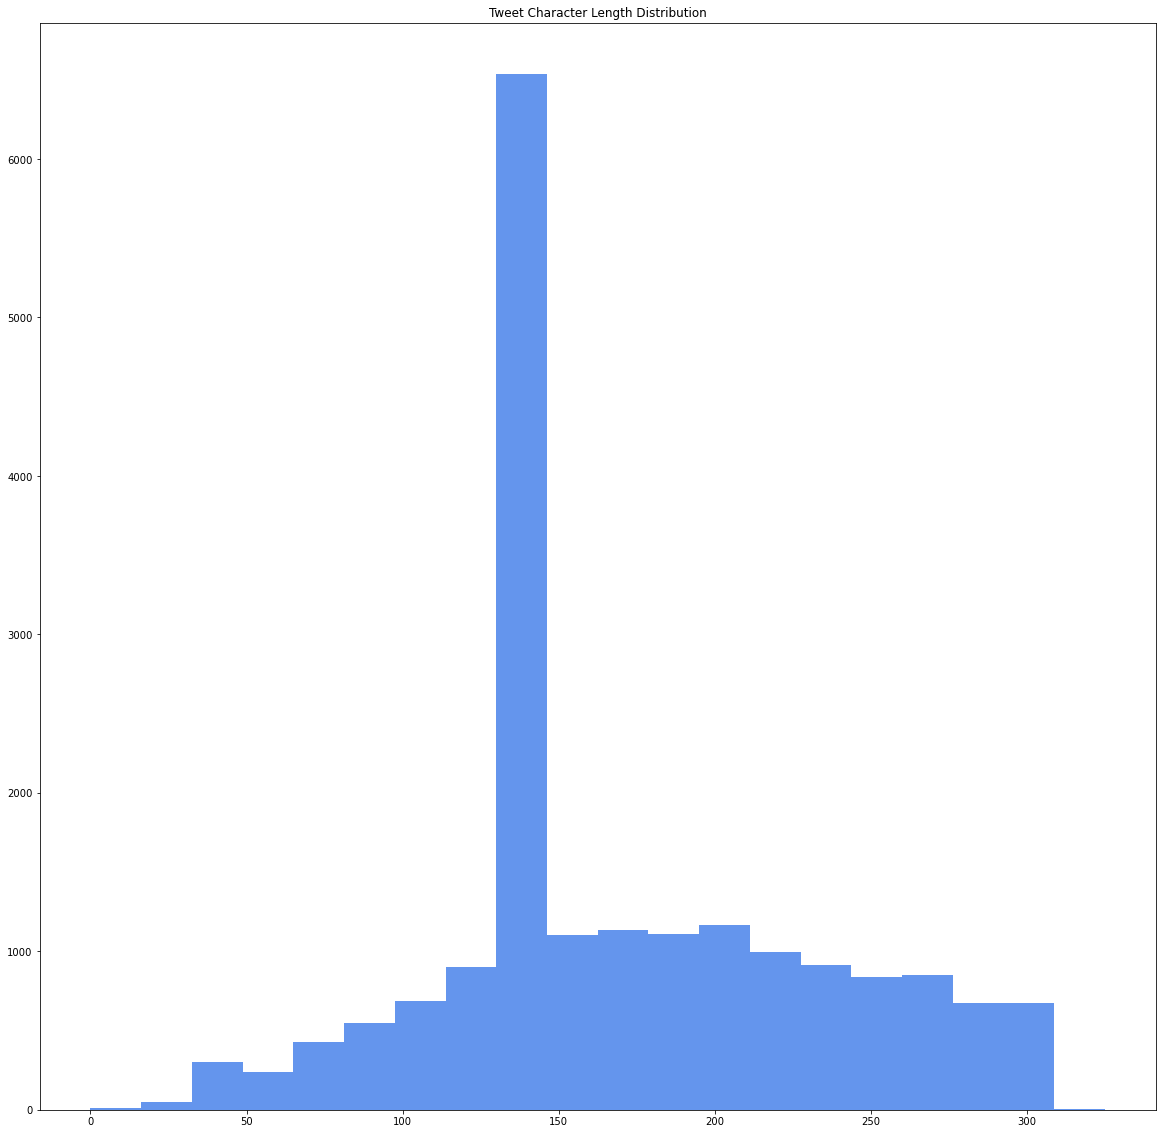

In [32]:
plt.figure(figsize=(20,20)) 

plt.title("Tweet Character Length Distribution", loc = 'center'), 
plt.hist(mx_political_eda['tweet_char_length'], range=(0,325), bins=20, color='cornflowerblue');

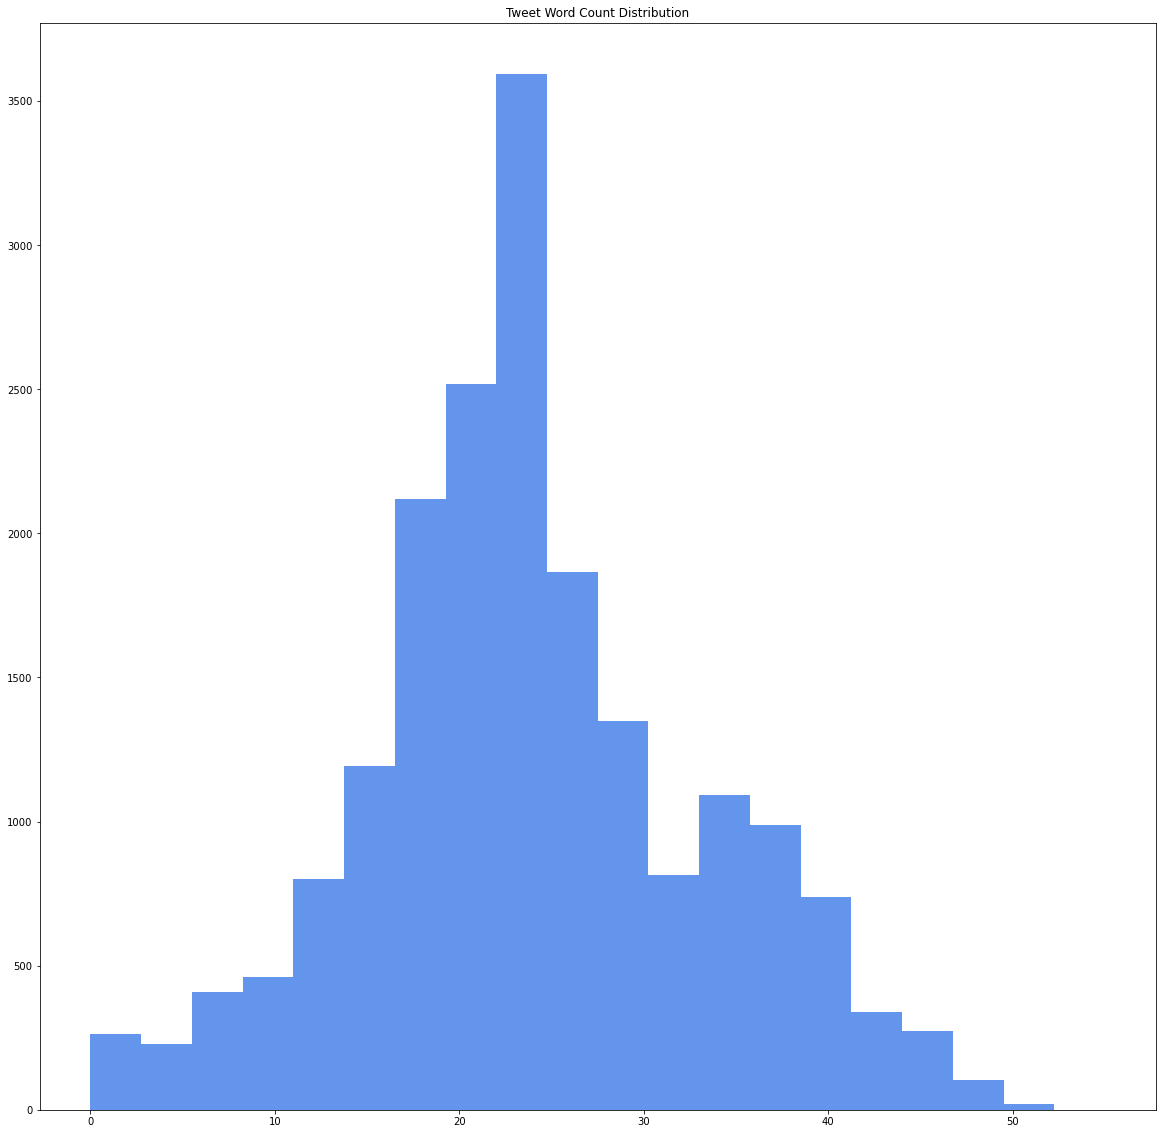

In [33]:
plt.figure(figsize=(20,20)) 

plt.title("Tweet Word Count Distribution", loc = 'center'), 
plt.hist(mx_political_eda['tweet_word_count'], range=(0,55), bins=20, color = 'cornflowerblue');

## N-grams

### 10 Most Common Unigrams

In [34]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into unigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common unigrams.
cvec_uni = CountVectorizer(ngram_range=(1, 1), stop_words=frozenset(spanish), lowercase=True)

pan_uni_tweets = cvec_uni.fit_transform(pan_df['tweet'])

pan_uni_tweets_df = pd.DataFrame(data=pan_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pan_most_common_unigrams = pan_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_unigrams

méxico            502
gobierno          399
familias          322
nacional          282
país              280
morena            250
presidente        230
markocortes       203
accionnacional    196
junio             190
dtype: int64

In [35]:
pan_unigram_plot = pan_most_common_unigrams.copy()
pan_unigram_plot.index = [
    'méxico', 
    'gobierno (government)',
    'familias (families)',
    'nacional (national)', 
    'país (country)', 
    'morena', 
    'presidente (president)',
    'markocortes', 
    'accionnacional', 
    'junio (june)'
]

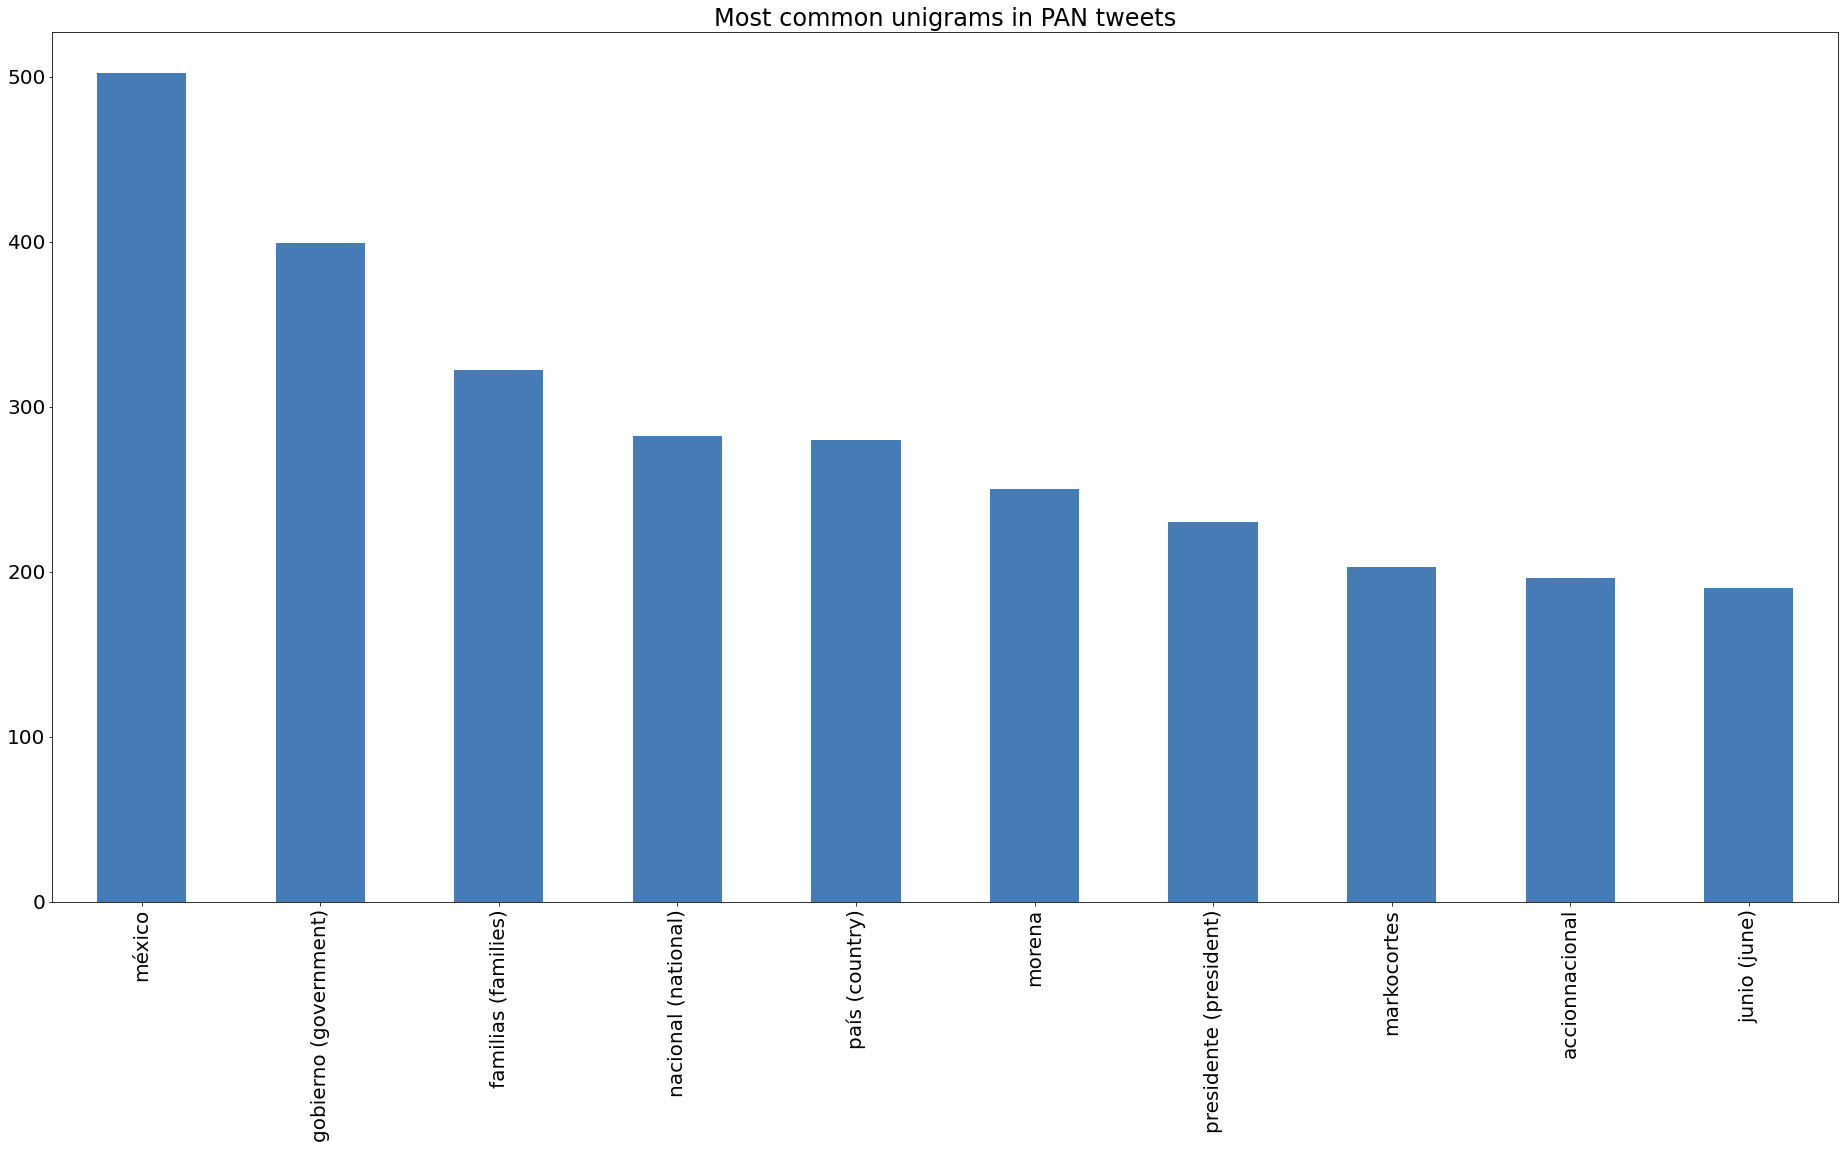

In [71]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PAN tweets")
pan_unigram_plot.plot.bar(color = '#467CB6');

In [58]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common unigrams.

pri_uni_tweets = cvec_uni.fit_transform(pri_df['tweet'])

pri_uni_tweets_df = pd.DataFrame(data=pri_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pri_most_common_unigrams = pri_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_unigrams

alitomorenoc    762
méxico          574
pri             555
presidente      467
morena          340
partido         303
familias        294
votapri         289
junio           286
mujeres         280
dtype: int64

In [59]:
pri_unigram_plot = pri_most_common_unigrams.copy()
pri_unigram_plot.index = [
    'alitomorenoc',
    'méxico',
    'pri',
    'presidente (president)',
    'morena',
    'partido (party)',
    'familias (families)',
    'votapri (votepri)',
    'junio (june)',
    'mujeres (women)'
]

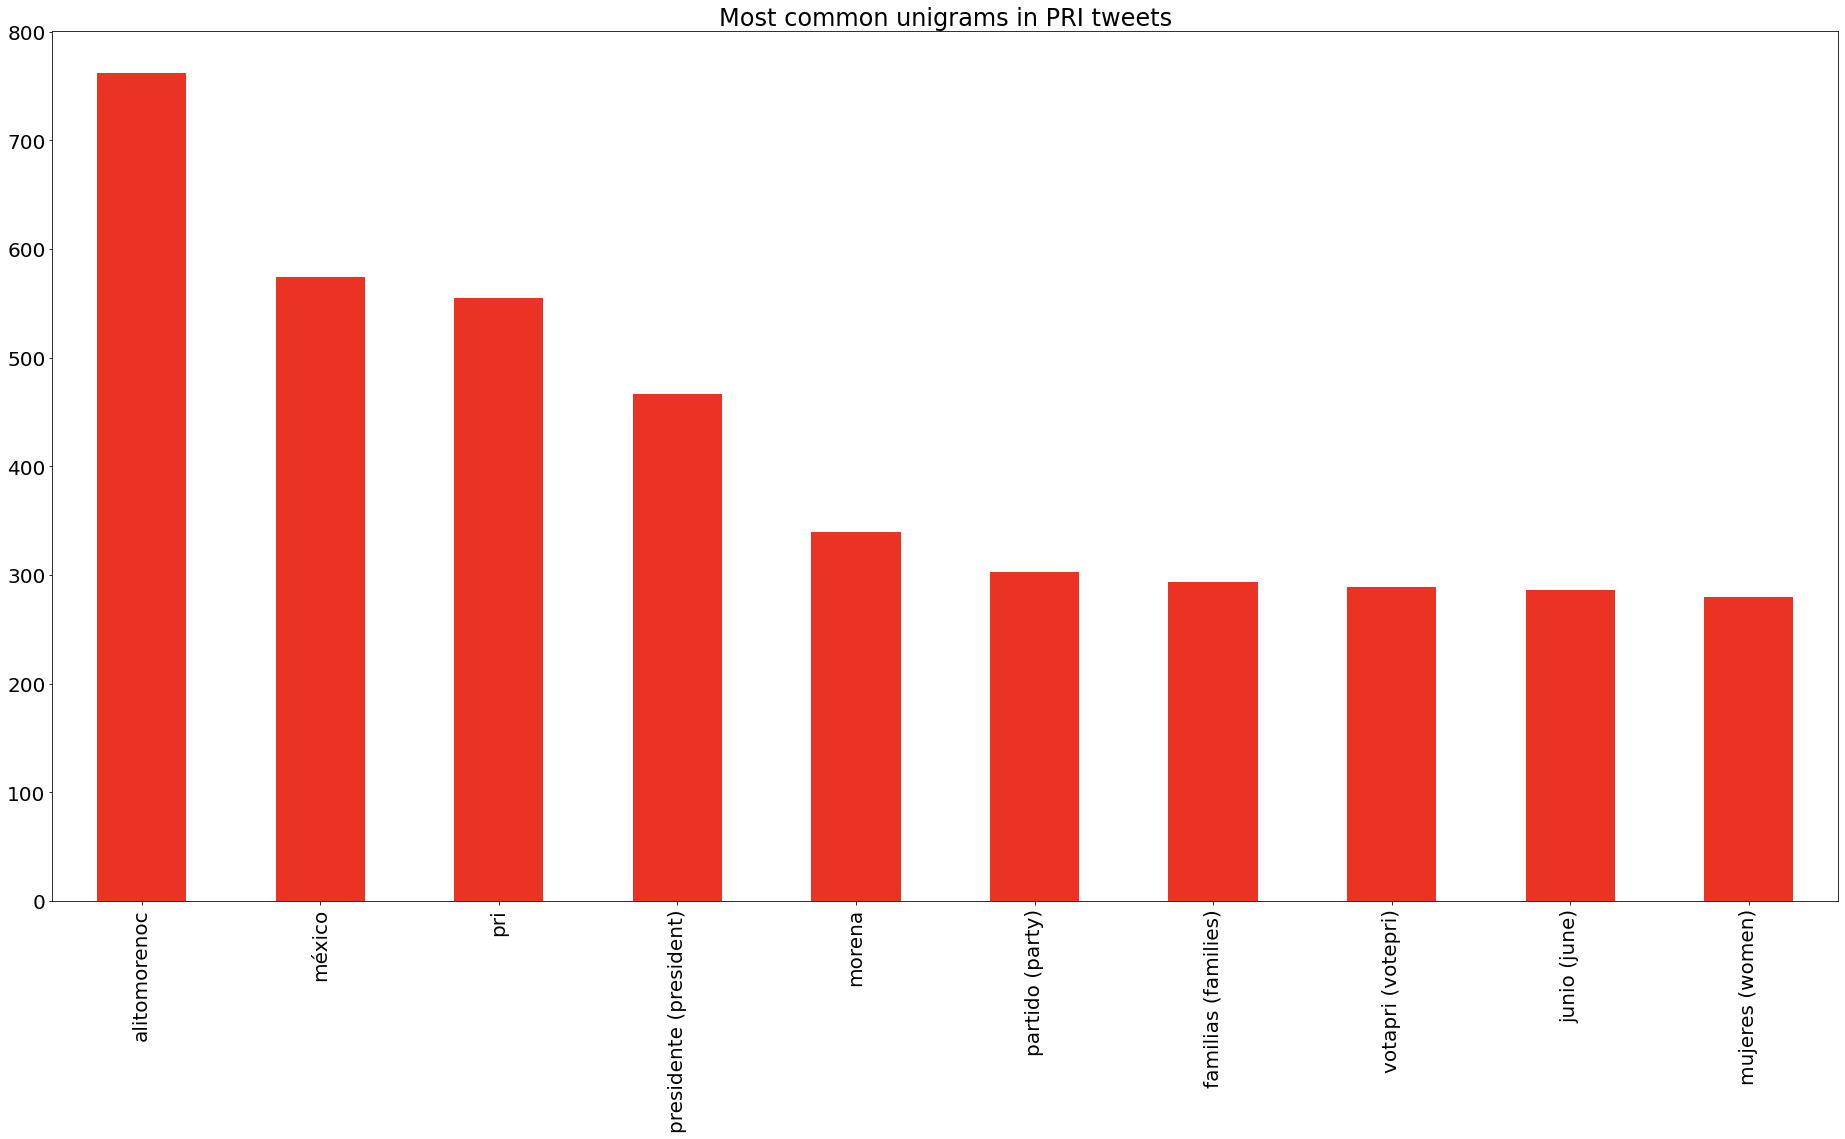

In [70]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PRI tweets")
pri_unigram_plot.plot.bar(color='#EA3323');

In [67]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common unigrams.

prd_uni_tweets = cvec_uni.fit_transform(prd_df['tweet'])

prd_uni_tweets_df = pd.DataFrame(data=prd_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

prd_most_common_unigrams = prd_uni_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_unigrams

prdmexico          848
méxico             397
prd                394
jesus_zambranog    370
laufdzoficial      220
gobierno           211
mujeres            183
votaprd            156
_avilesalvarez     143
caroviggiano       140
dtype: int64

In [72]:
prd_unigram_plot = prd_most_common_unigrams.copy()
prd_unigram_plot.index = [
    'prdmexico',
    'méxico',
    'prd',
    'jesus_zambranog',
    'laufdzoficial',
    'gobierno (government)',
    'mujeres (women)',
    'votaprd (voteprd)',
    '_avilesalvarez',
    'caroviggiano'
]

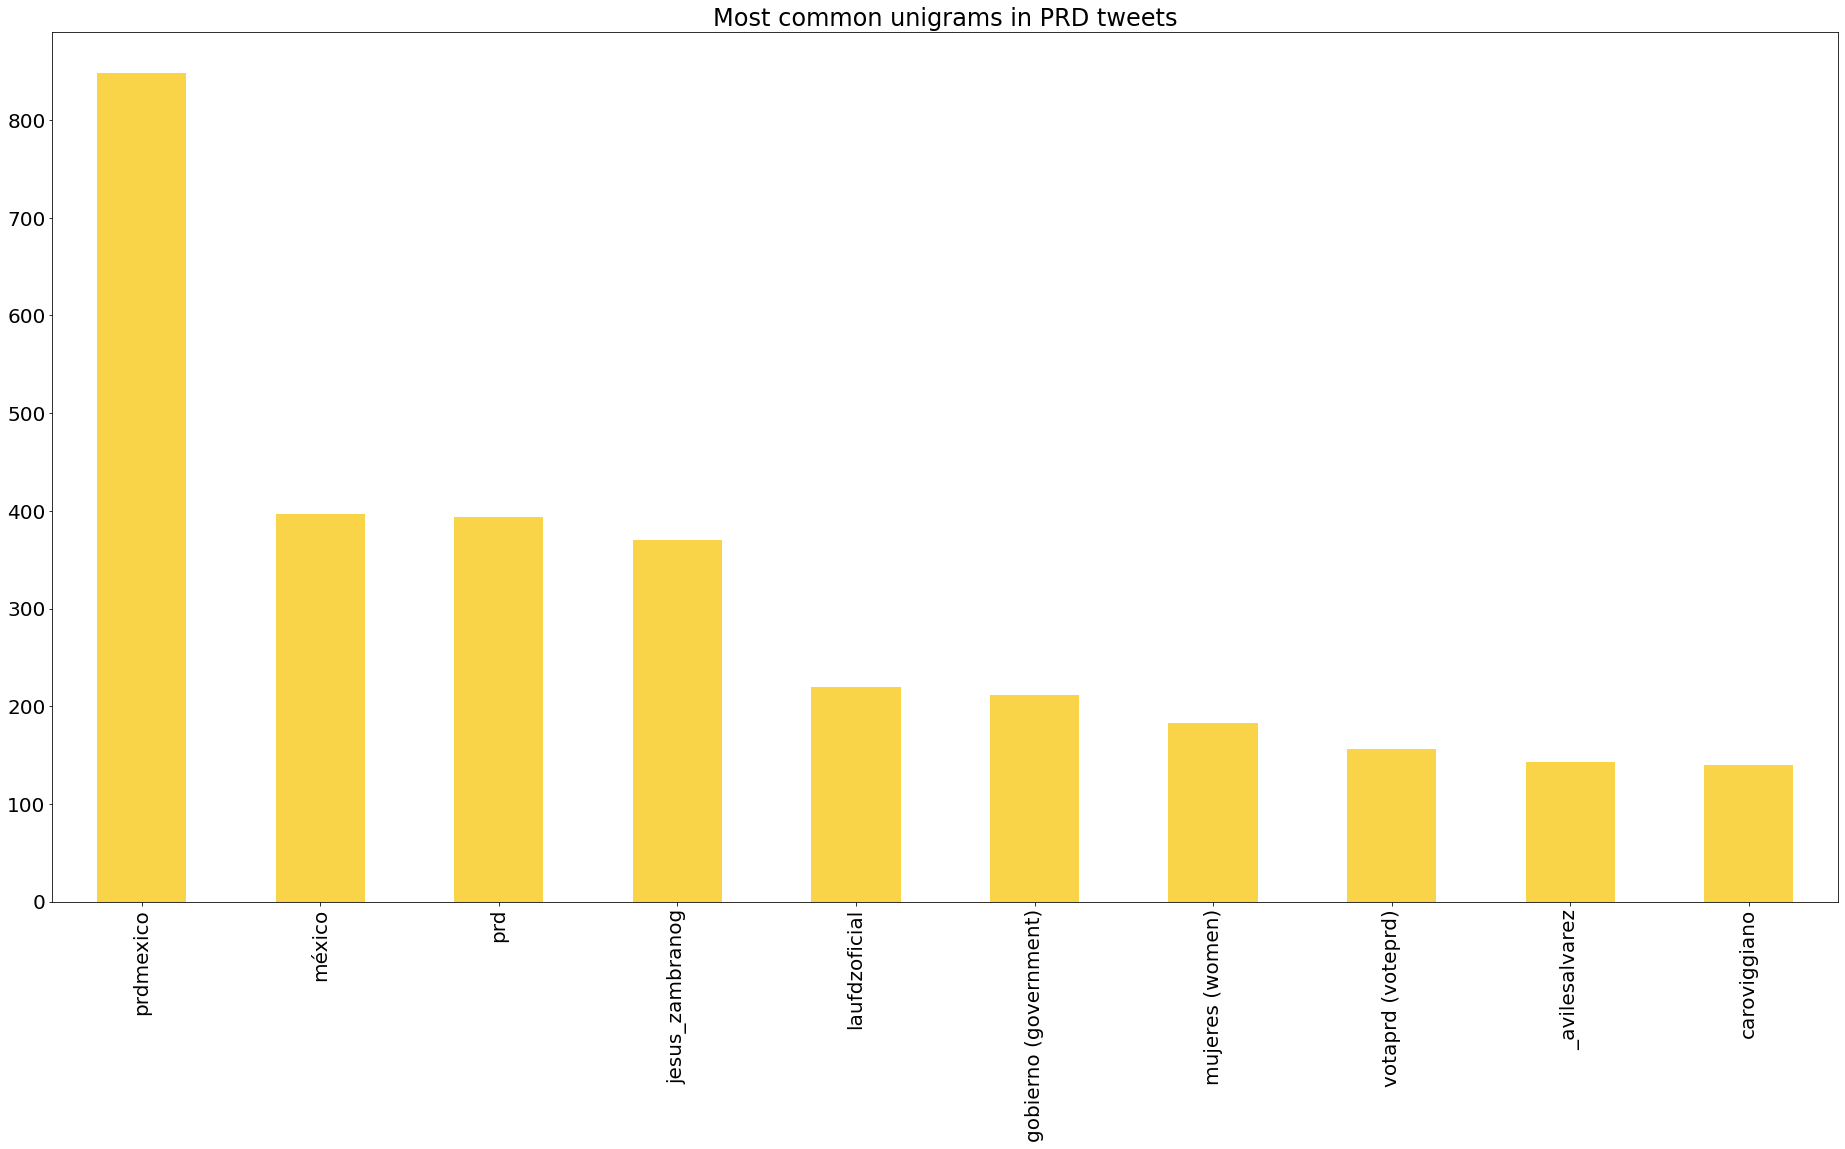

In [73]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PRD tweets")
prd_unigram_plot.plot.bar(color='#F9D448');

In [74]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common unigrams.

pv_uni_tweets = cvec_uni.fit_transform(pv_df['tweet'])

pv_uni_tweets_df = pd.DataFrame(data=pv_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pv_most_common_unigrams = pv_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_unigrams

país               311
verde              268
méxico             259
sen                253
dip                247
ambiente           245
karencastrejont    212
salud              182
méxicoverde        168
partido            155
dtype: int64

In [75]:
pv_unigram_plot = pv_most_common_unigrams.copy()
pv_unigram_plot.index = [
    'país (country)',
    'verde (green)',
    'méxico',
    'sen',
    'dip (representative)',
    'ambiente (environment)',
    'karencastrejont',
    'salud (health)',
    'méxicoverde (greenmexico)',
    'partido (party)'
]

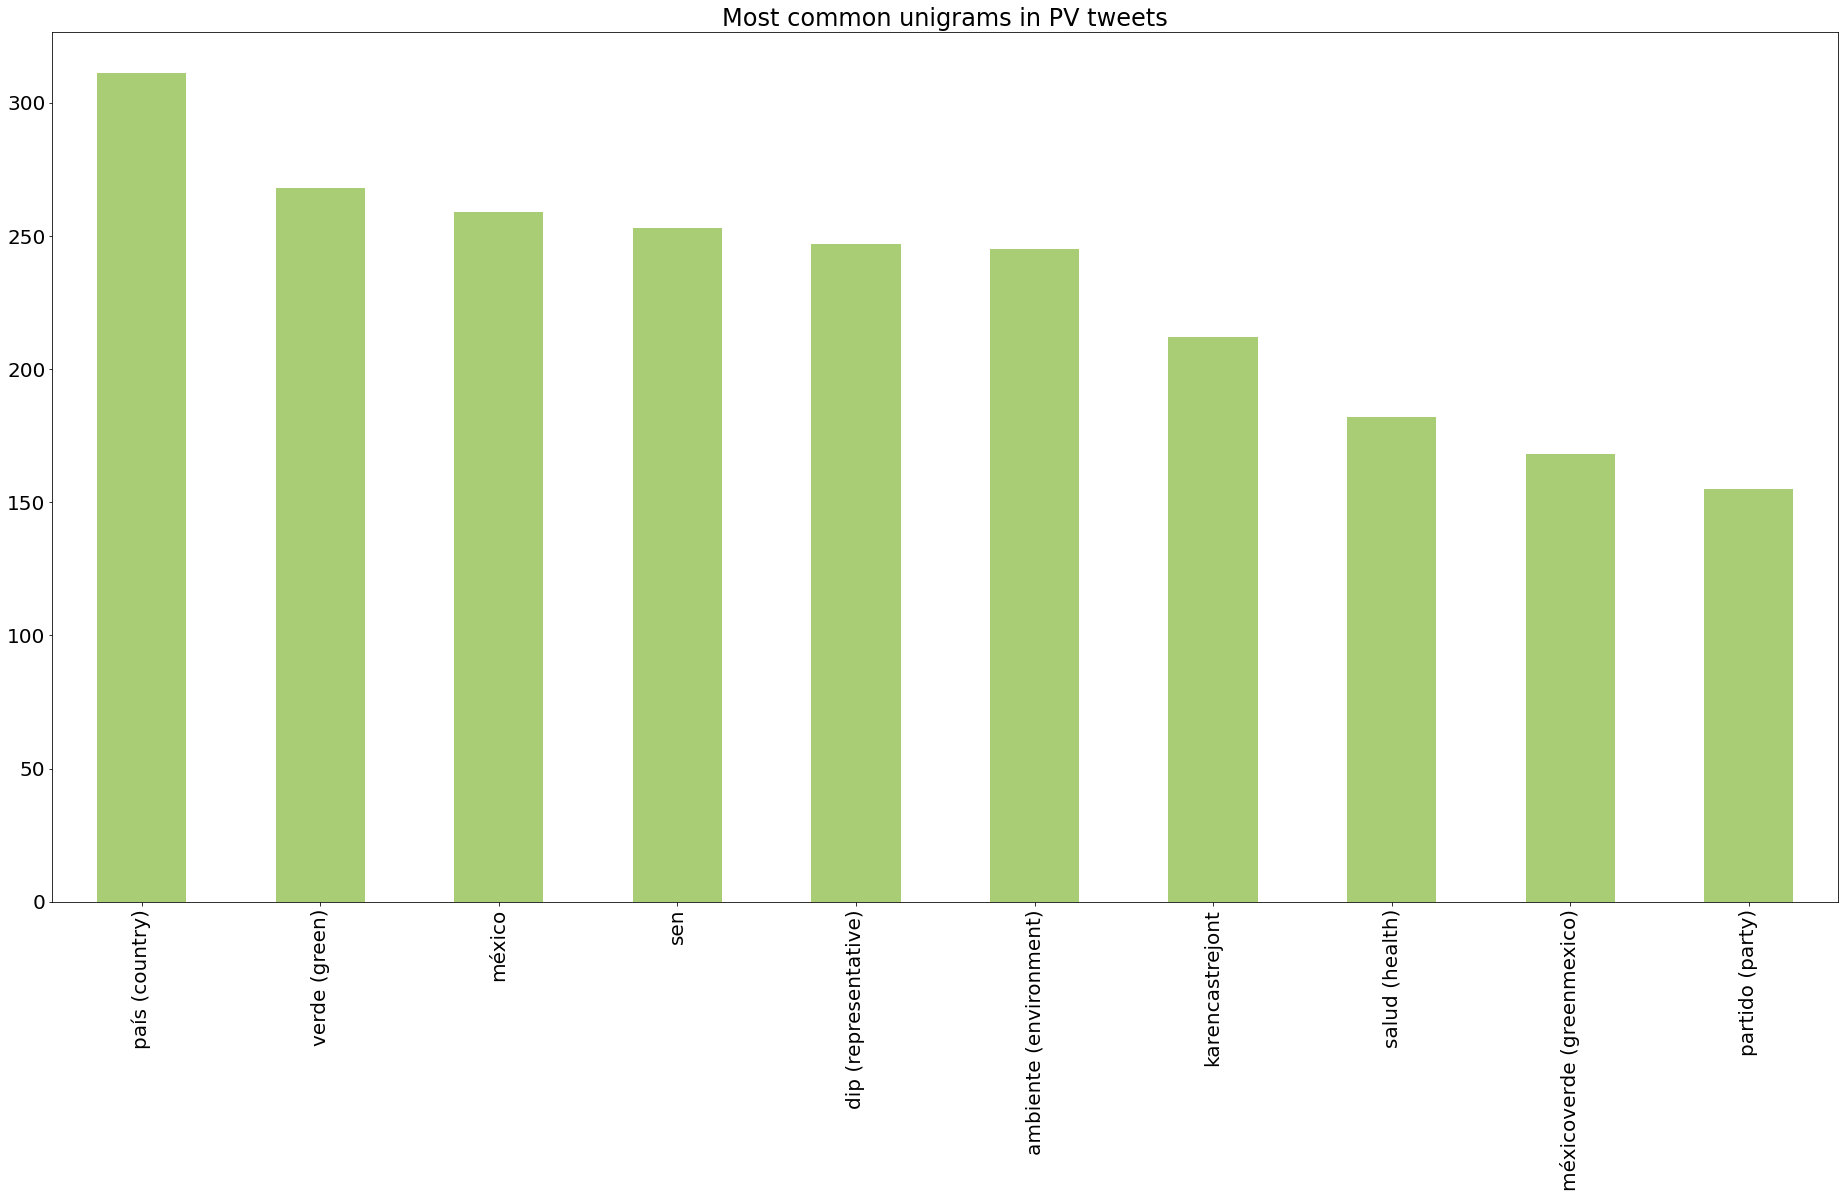

In [76]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PV tweets")
pv_unigram_plot.plot.bar(color='#A9CD74');

In [78]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common unigrams.

mc_uni_tweets = cvec_uni.fit_transform(mc_df['tweet'])

mc_uni_tweets_df = pd.DataFrame(data=mc_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mc_most_common_unigrams = mc_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_unigrams

futuro                 307
movimiento             294
elfuturoesnaranja      278
gobierno               227
méxico                 215
delríopresopolítico    175
bancadanaranja         171
pablo_vah              164
mujeres                159
clementech             156
dtype: int64

In [79]:
mc_unigram_plot = mc_most_common_unigrams.copy()
mc_unigram_plot.index = [
    'futuro (future)',
    'movimiento (movement)',
    'elfuturoesnaranja (thefutureisorange)',
    'gobierno (government)',
    'méxico',
    'delríopresopolítico (delriopoliticalprisoner)',
    'bancadanaranja (orangeseats)',
    'pablo_vah',
    'mujeres (women)',
    'clementech'
]

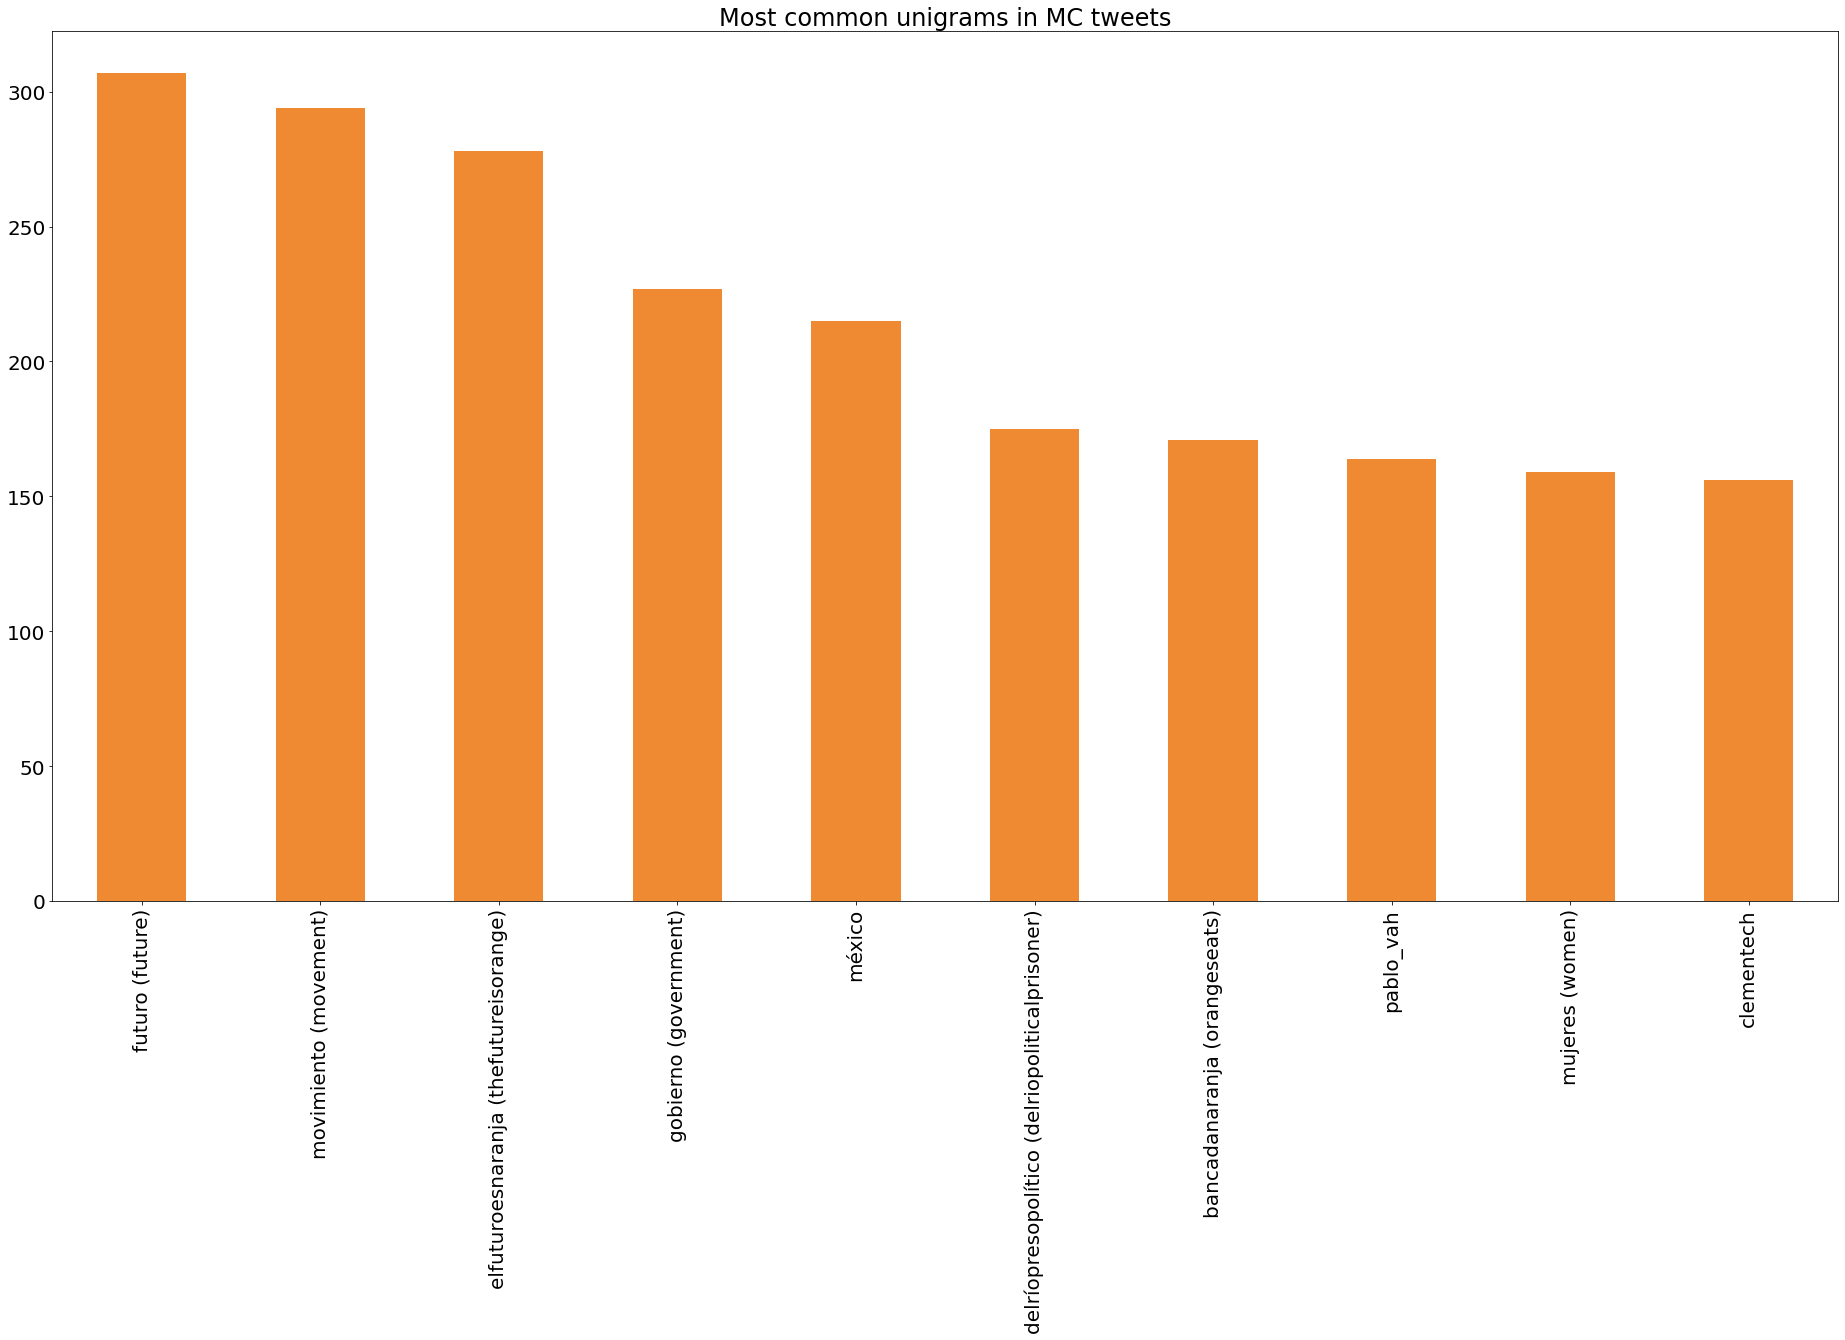

In [80]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in MC tweets")
mc_unigram_plot.plot.bar(color='#EF8A33');

In [82]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common unigrams.

mrn_uni_tweets = cvec_uni.fit_transform(mrn_df['tweet'])

mrn_uni_tweets_df = pd.DataFrame(data=mrn_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mrn_most_common_unigrams = mrn_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_unigrams

presidente               815
pueblo                   749
méxico                   748
lopezobrador_            698
conferenciapresidente    647
4t                       411
22                       324
transformación           267
democracia               240
país                     218
dtype: int64

In [83]:
mrn_unigram_plot = mrn_most_common_unigrams.copy()
mrn_unigram_plot.index = [
    'presidente (president)',
    'pueblo (people)',
    'méxico',
    'lopezobrador_',
    'conferenciapresidente (presidentialconference)',
    '4t (4thtransformation)',
    '22',
    'transformación (transformation)',
    'democracia (democracy)',
    'país (country)'
]

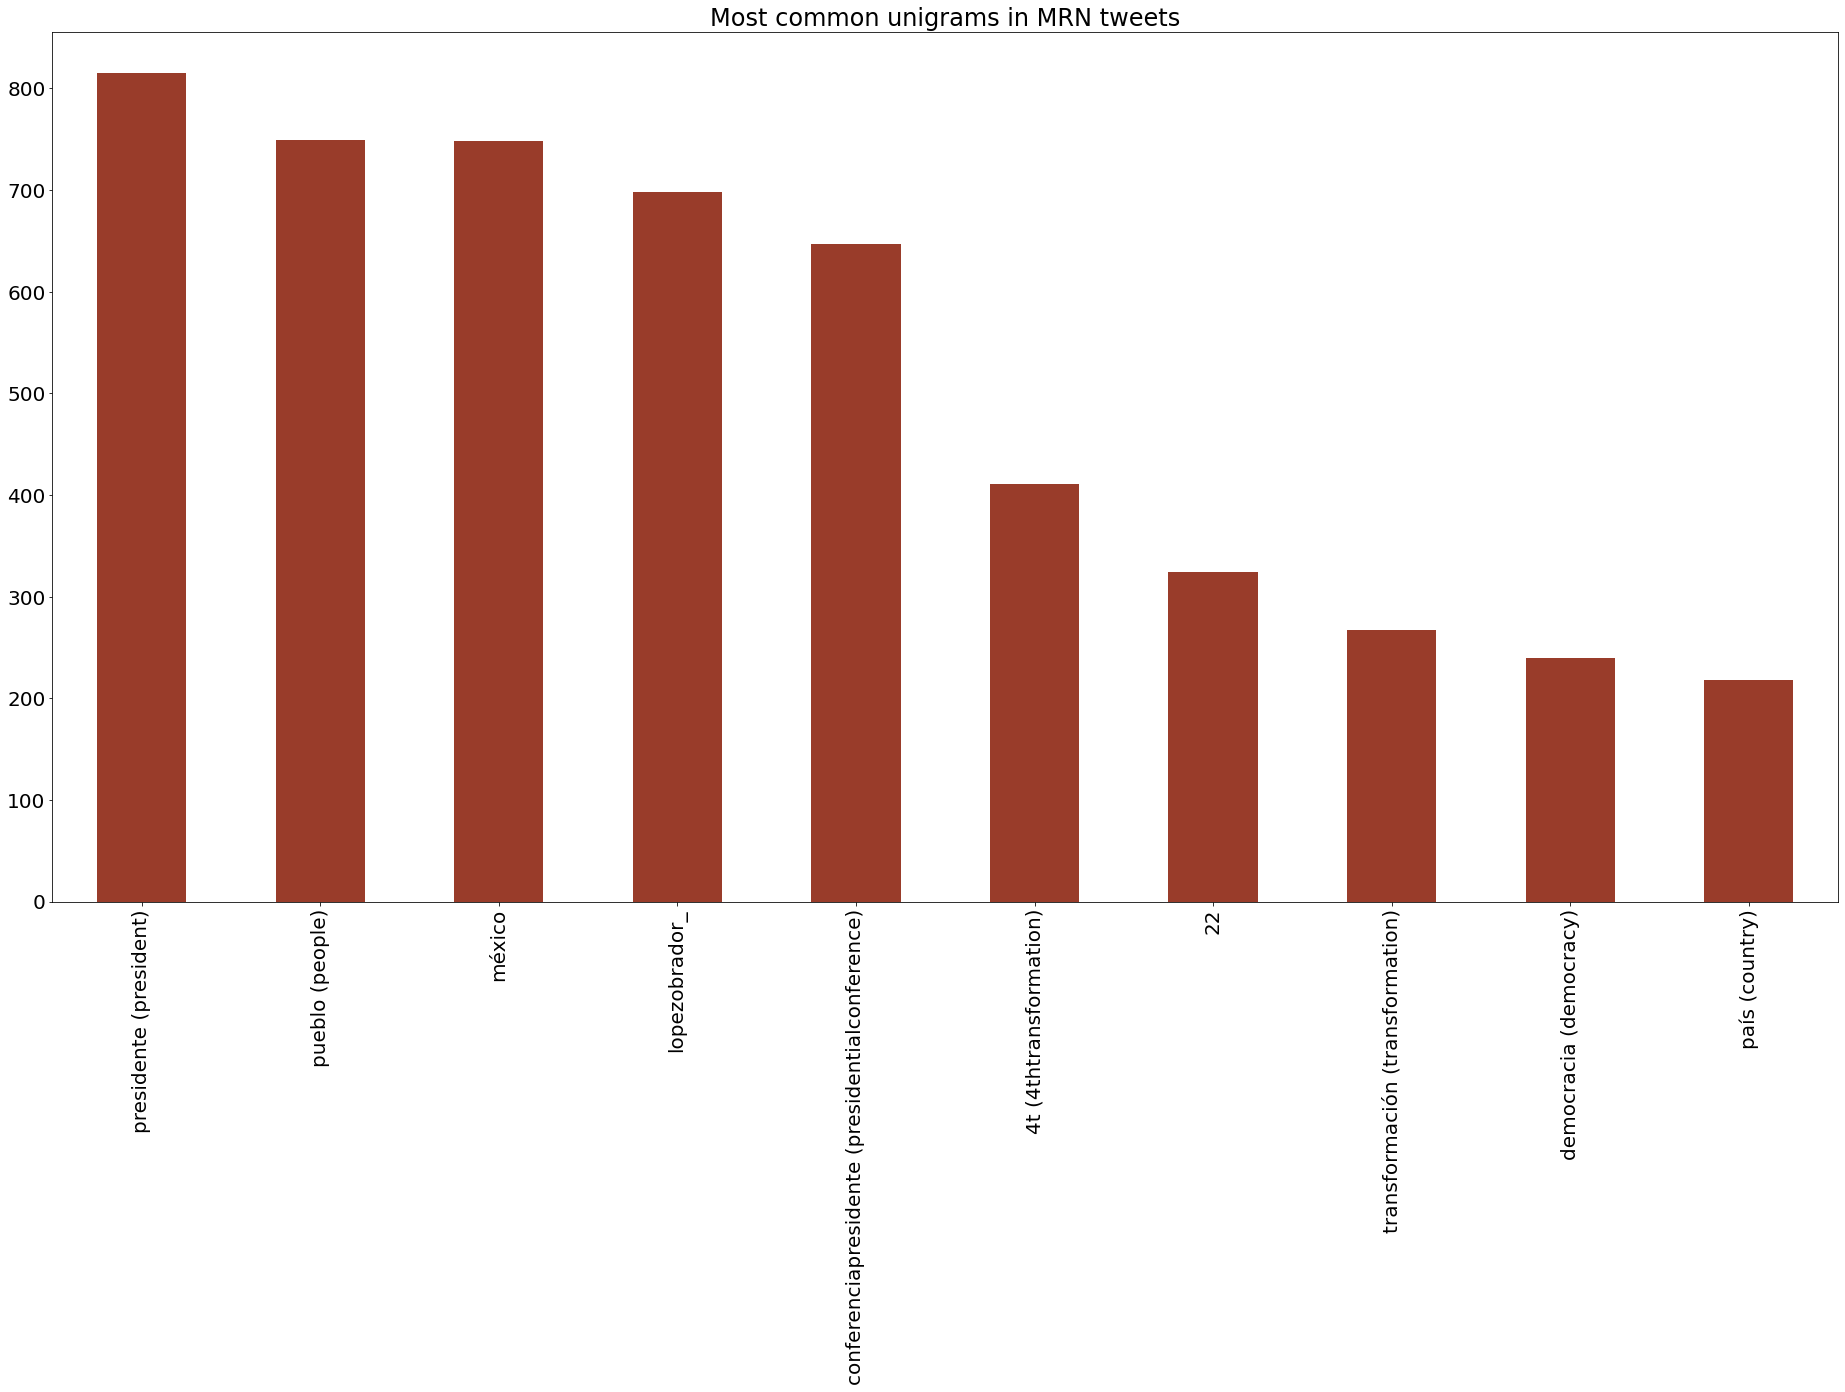

In [84]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in MRN tweets")
mrn_unigram_plot.plot.bar(color='#993C2A');

### 10 Most Common Bigrams

In [85]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into bigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common bigrams.
cvec_bi = CountVectorizer(ngram_range=(2, 2), stop_words=frozenset(spanish), lowercase=True)

pan_bi_tweets = cvec_bi.fit_transform(pan_df['tweet'])

pan_bi_tweets_df = pd.DataFrame(data=pan_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pan_most_common_bigrams = pan_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_bigrams

acción nacional       162
gobierno federal       82
familias mexicanas     72
energías limpias       70
descanse paz           53
junio votapan          48
cambiar rumbo          43
cámara diputados       42
seres queridos         42
rumbo méxico           40
dtype: int64

In [86]:
pan_bigram_plot = pan_most_common_bigrams.copy()
pan_bigram_plot.index = [
    'acción nacional (national action)',
    'gobierno federal (federal government)',
    'familias mexicanas (mexican families)',
    'energías limpias (clean energies)',
    'descanse paz (rest peace)',
    'junio votapan (june votepan)',
    'cambiar rumbo (change course)',
    'cámara diputados (representatives chamber)',
    'seres queridos (loved ones)',
    'rumbo méxico (mexico course)'
]

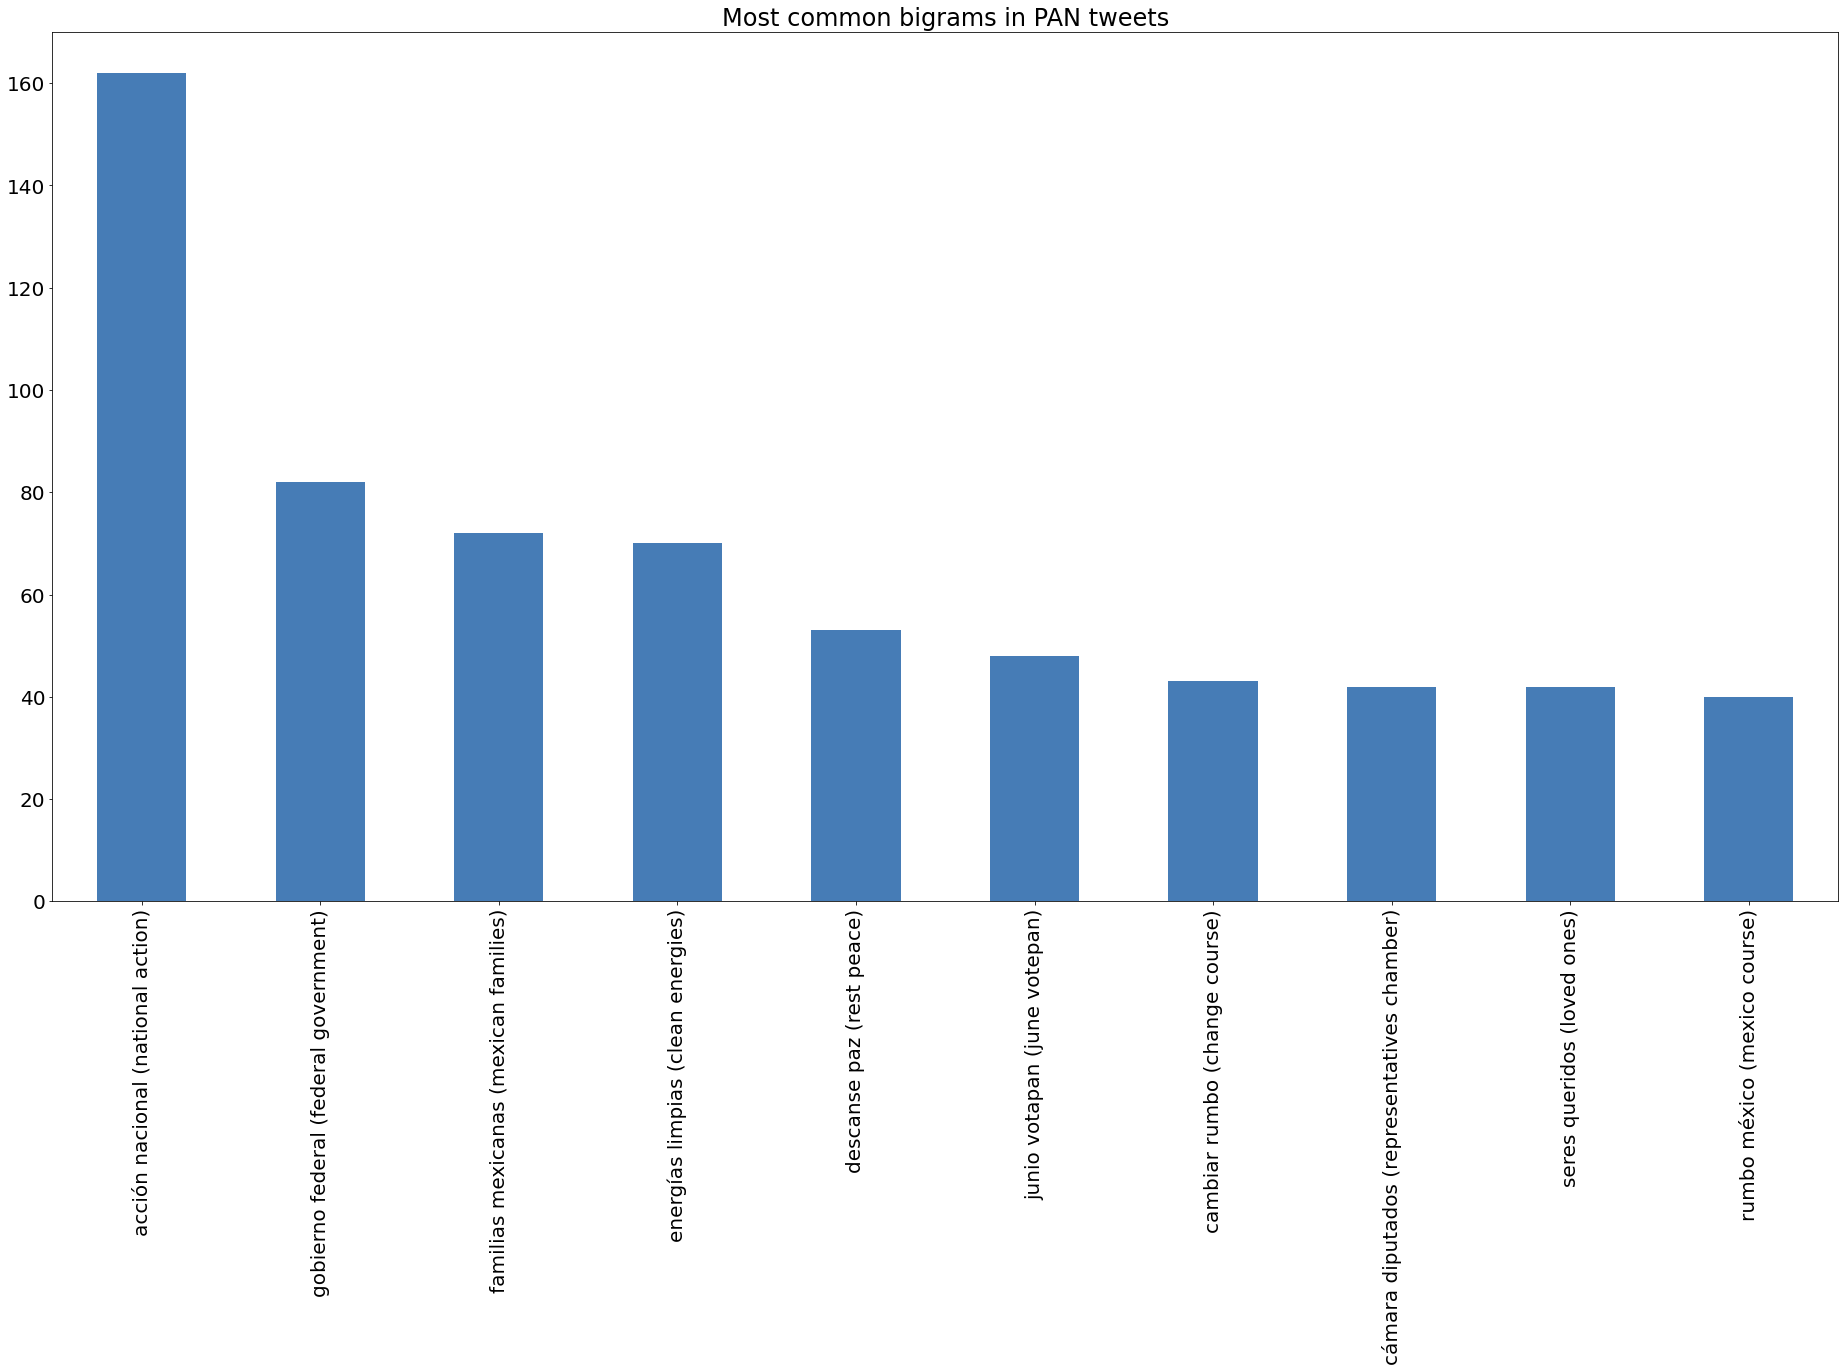

In [87]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PAN tweets")
pan_bigram_plot.plot.bar(color='#467CB6');

In [88]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common bigrams.

pri_bi_tweets = cvec_bi.fit_transform(pri_df['tweet'])

pri_bi_tweets_df = pd.DataFrame(data=pri_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pri_most_common_bigrams = pri_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_bigrams

presidente alitomorenoc    376
cámara diputados            59
diputados federales         55
mujeres hombres             52
candidatas candidatos       51
junio votapri               51
familias mexicanas          51
ganar junio                 48
diputadas diputados         39
invitamos seguir            39
dtype: int64

In [89]:
pri_bigram_plot = pri_most_common_bigrams.copy()
pri_bigram_plot.index = [
    'presidente alitomorenoc (PRI party president)',
    'cámara diputados (representatitves chamber)',
    'diputados federales (federal representatives)',
    'mujeres hombres (women men)',
    'candidatas candidatos (female and male candidates)',
    'junio votapri (june votepri)',
    'familias mexicanas (mexican families)',
    'ganar junio (win june)',
    'diputadas diputados (female and male representatives)',
    'invitamos seguir (we invite follow)'
]

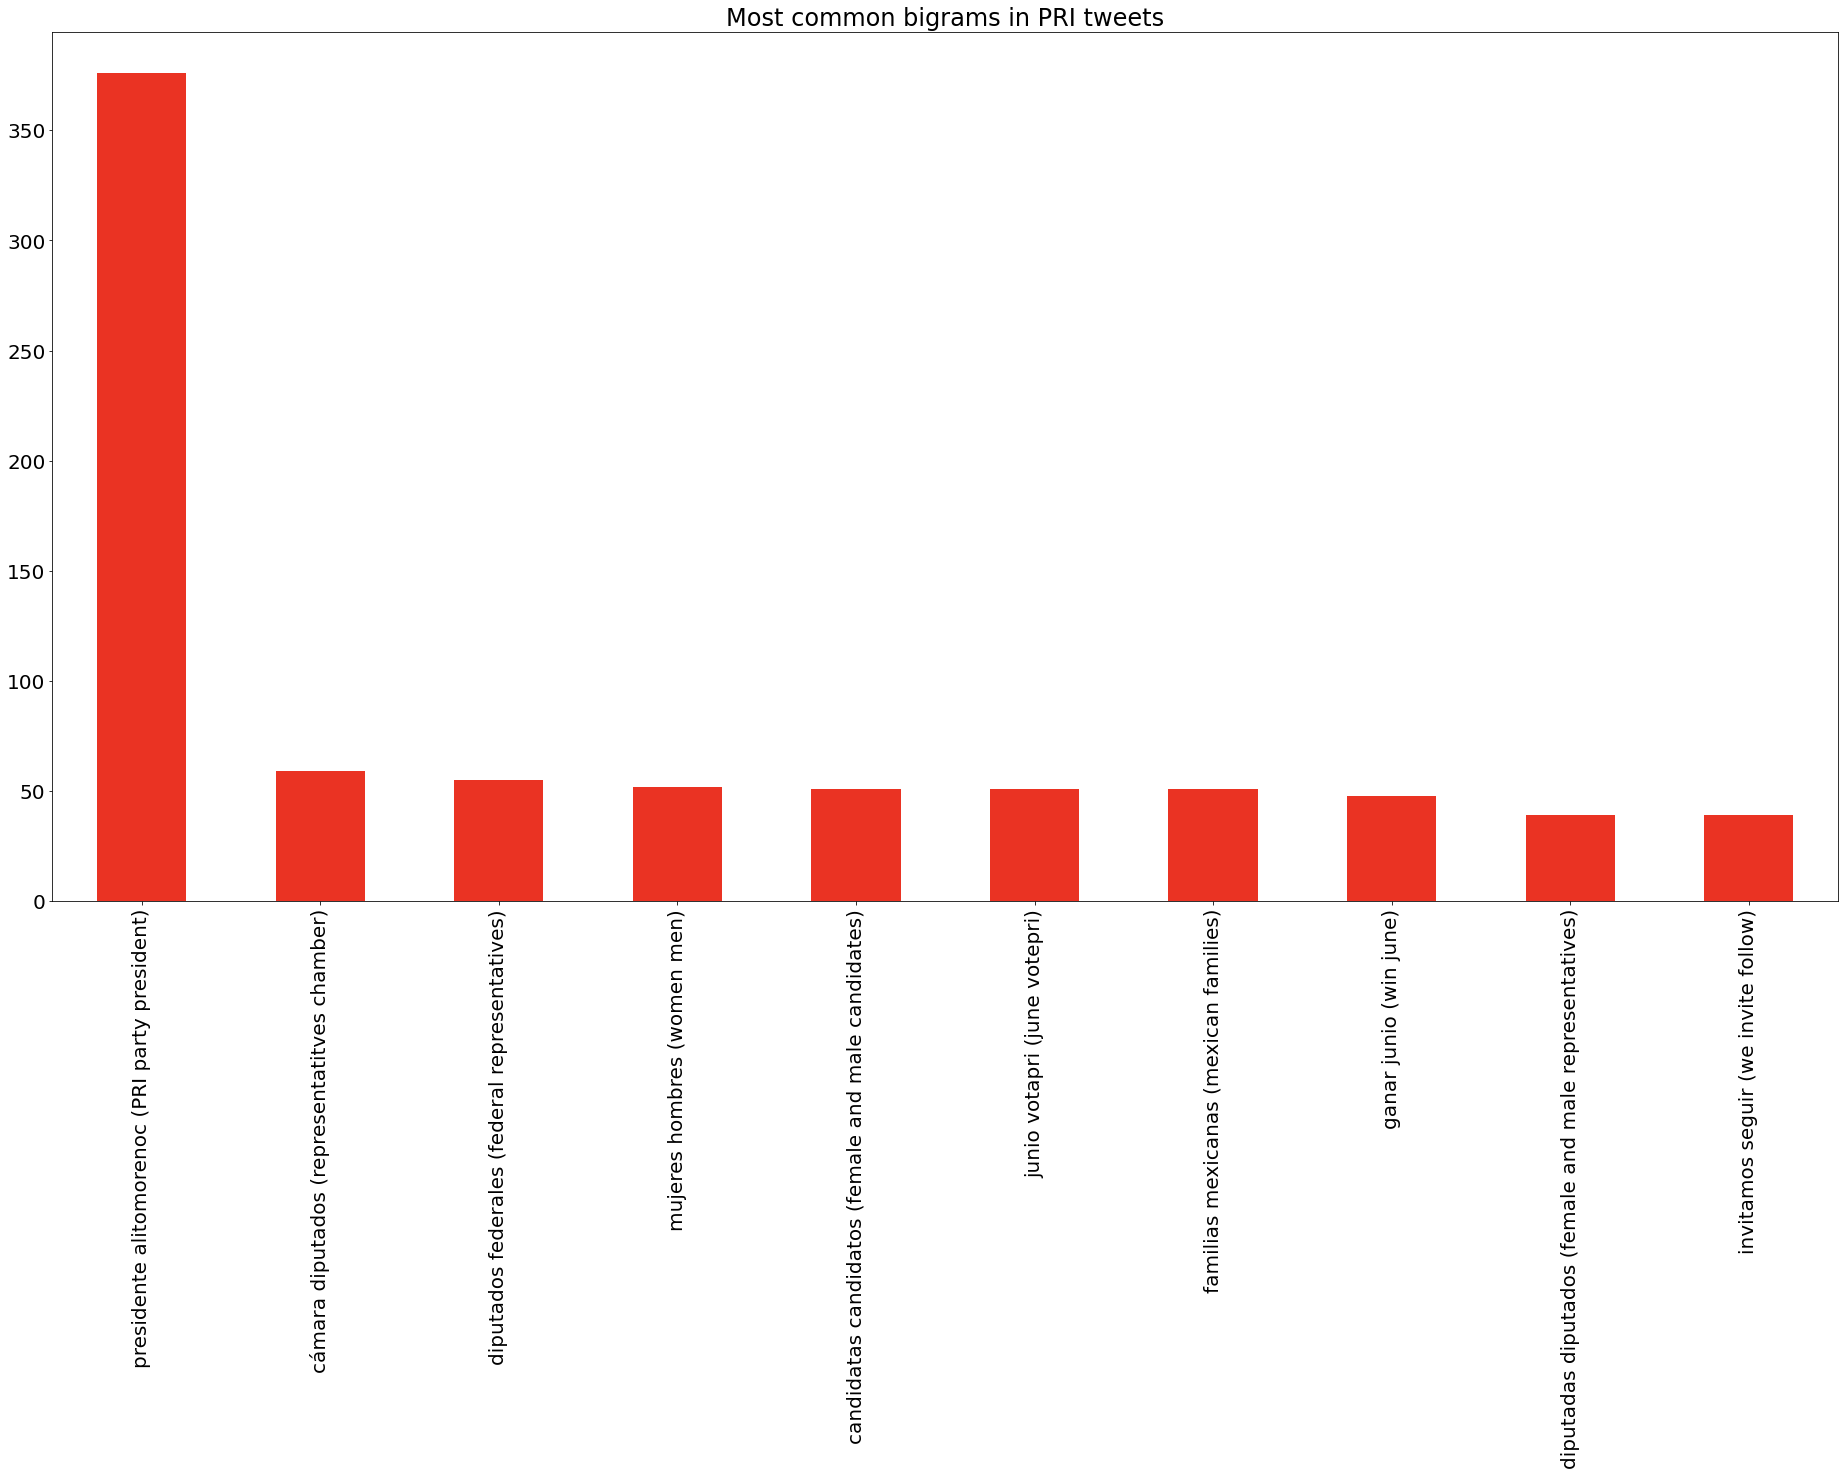

In [90]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PRI tweets")
pri_bigram_plot.plot.bar(color='#EA3323');

In [91]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common bigrams.

prd_bi_tweets = cvec_bi.fit_transform(prd_df['tweet'])

prd_bi_tweets_df = pd.DataFrame(data=prd_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

prd_most_common_bigrams = prd_bi_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_bigrams

gobierno federal        75
link boletín            60
prdmexico prd           56
niñas niños             53
delfina gómez           52
juntas juntos           42
33 años                 37
jesus_zambranog link    36
palacio nacional        35
millones estudiantes    34
dtype: int64

In [92]:
prd_bigram_plot = prd_most_common_bigrams.copy()
prd_bigram_plot.index = [
    'gobierno federal (federal government)',
    'link boletín (bulletin link)',
    'prdmexico prd',
    'niñas niños (girls boys)',
    'delfina gómez',
    'juntas juntos (together)',
    '33 años (33 years)',
    'jesus_zambranog link',
    'palacio nacional (national palace)',
    'millones estudiantes (millions students)'
]

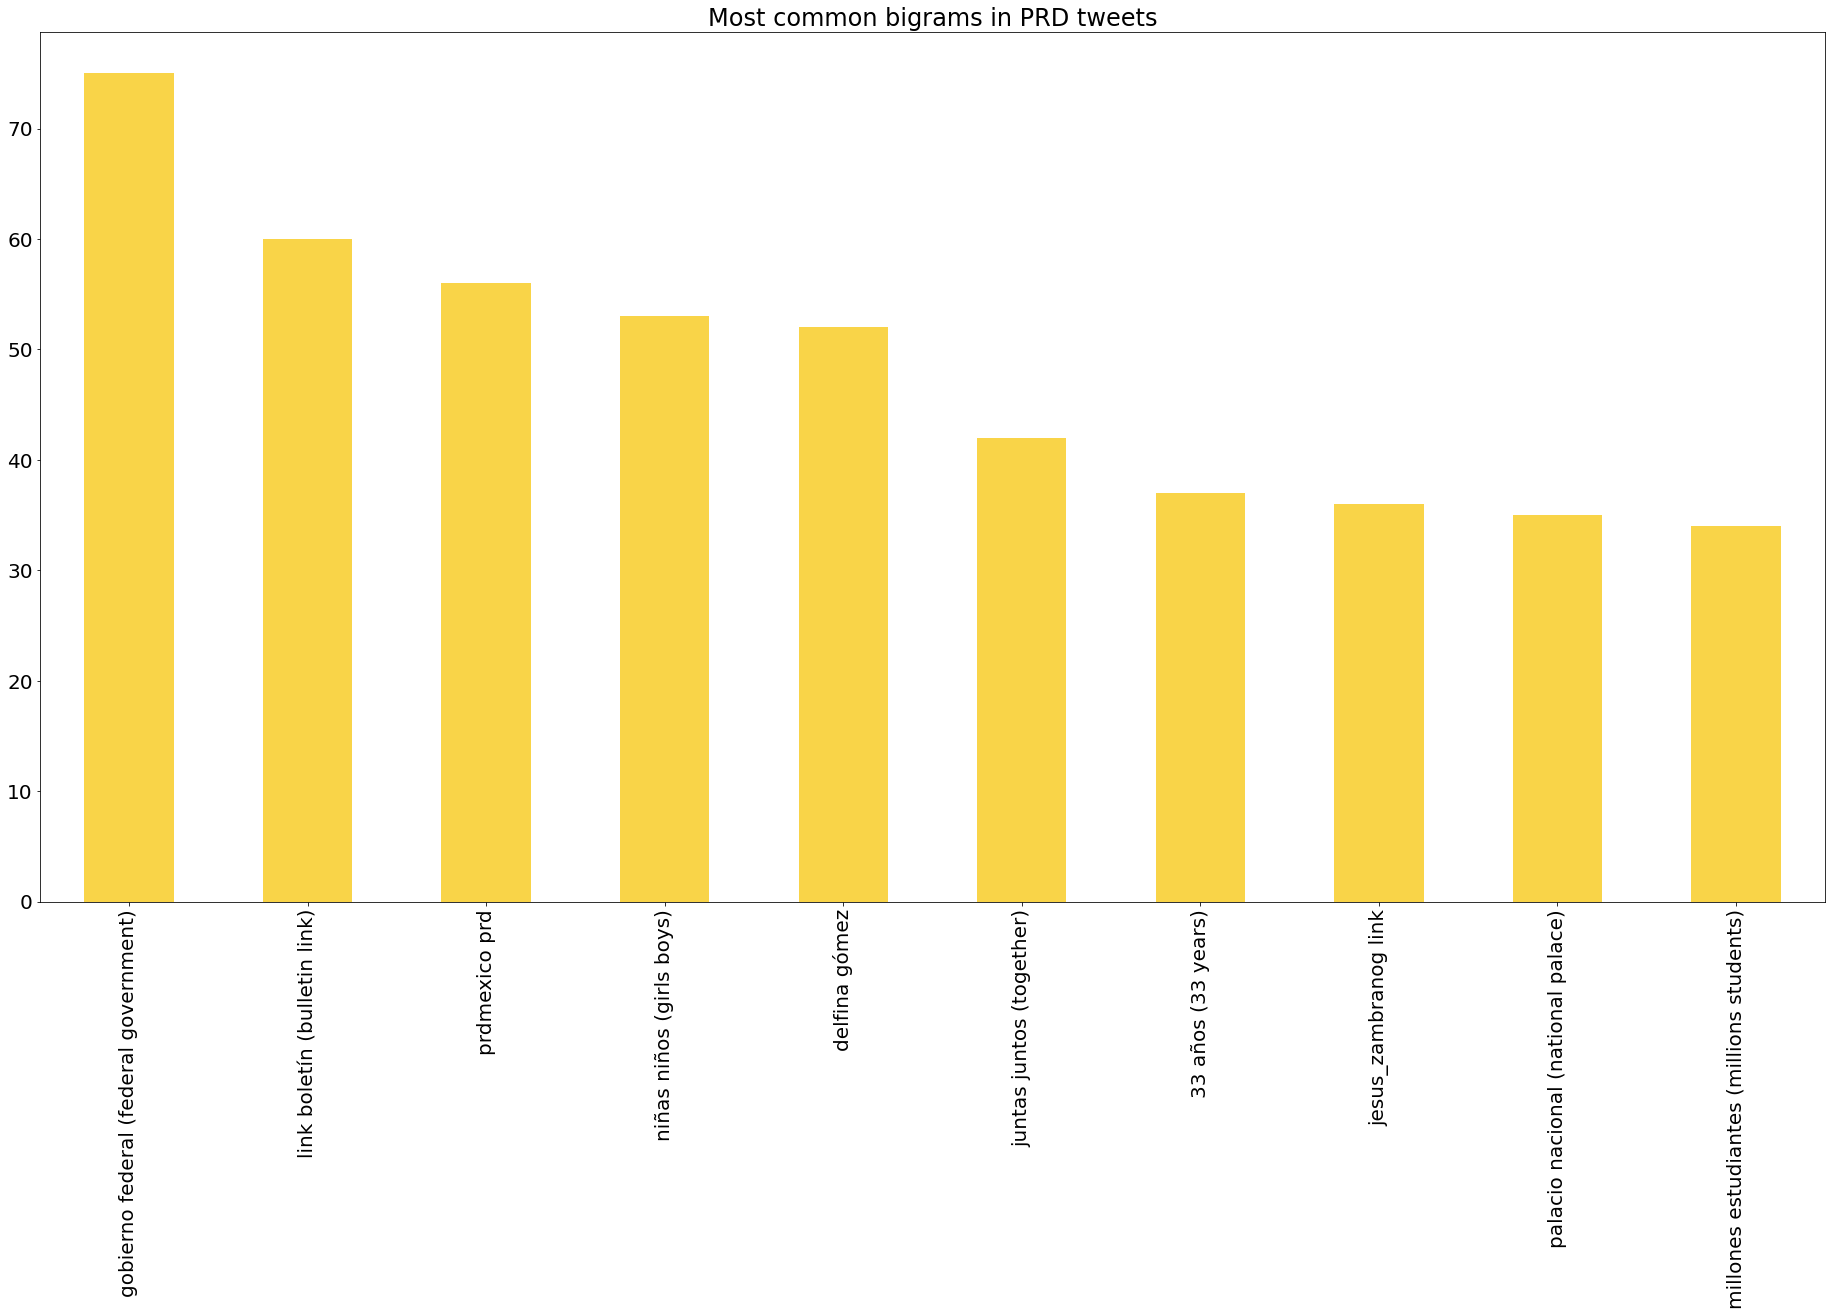

In [93]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PRD tweets")
prd_bigram_plot.plot.bar(color='#F9D448');

In [94]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common bigrams.

pv_bi_tweets = cvec_bi.fit_transform(pv_df['tweet'])

pv_bi_tweets_df = pd.DataFrame(data=pv_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pv_most_common_bigrams = pv_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_bigrams

partido verde            112
sen raulbccue             77
covid 19                  75
dip arturoesc             53
dip betymanrique          45
enviamos felicitación     43
motivo cumpleaños         42
sen veronicacamino        37
pequeñas acciones         36
cumpleaños sigamos        35
dtype: int64

In [95]:
pv_bigram_plot = pv_most_common_bigrams.copy()
pv_bigram_plot.index = [
    'partido verde (green party)',
    'sen raulbccue',
    'covid 19',
    'dip arturoesc (rep.)',
    'dip betymanrique (rep.)',
    'enviamos felicitación (we congratulate)',
    'motivo cumpleaños (birthday motive)',
    'sen veronicacamino',
    'pequeñas acciones (small actions)',
    'cumpleaños sigamos (birthday let\'s continue)'
]

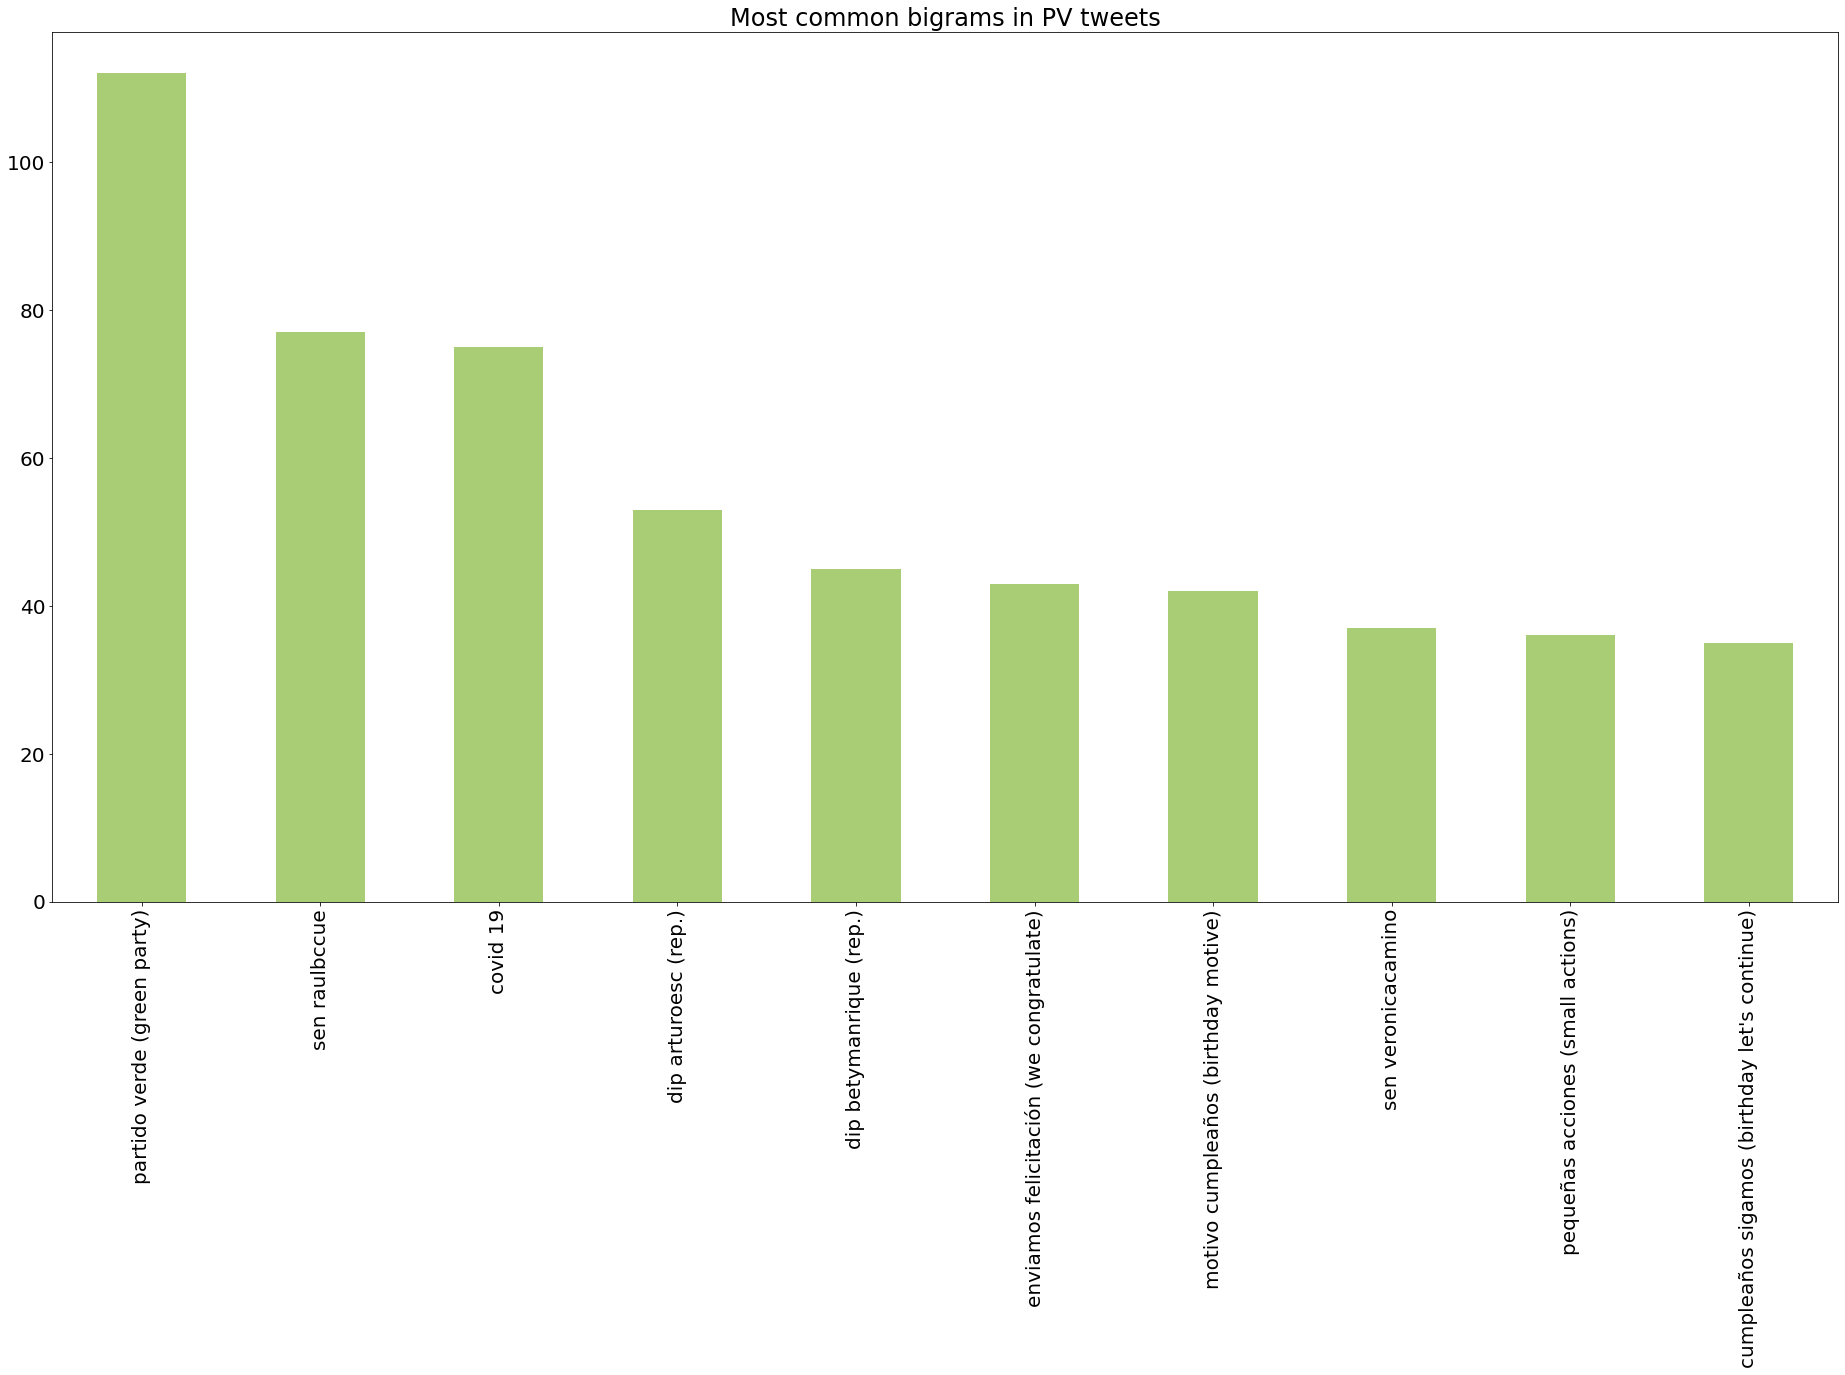

In [96]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PV tweets")
pv_bigram_plot.plot.bar(color='#A9CD74');

In [99]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common bigrams.

mc_bi_tweets = cvec_bi.fit_transform(mc_df['tweet'])

mc_bi_tweets_df = pd.DataFrame(data=mc_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mc_most_common_bigrams = mc_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_bigrams

movimiento ciudadano       86
plataforma favorita        80
energías limpias           78
niñas niños                65
escúchanos plataforma      63
favorita spotify           55
gobierno federal           52
reformaeléctrica tóxica    49
trato ambiente             46
nuevotrato verde           40
dtype: int64

In [100]:
mc_bigram_plot = mc_most_common_bigrams.copy()
mc_bigram_plot.index = [
    'movimiento ciudadano (citizens\' movement)',
    'plataforma favorita (favorite platform)',
    'energías limpias (clean energies)',
    'niñas niños (girls boys)',
    'escúchanos plataforma (listen to us platform)',
    'favorita spotify (favorite spotify)',
    'gobierno federal (federal government)',
    'reformaeléctrica tóxica (toxic electricreform)',
    'trato ambiente (behavior towards environment)',
    'nuevotrato verde (green newbehavior)'
]

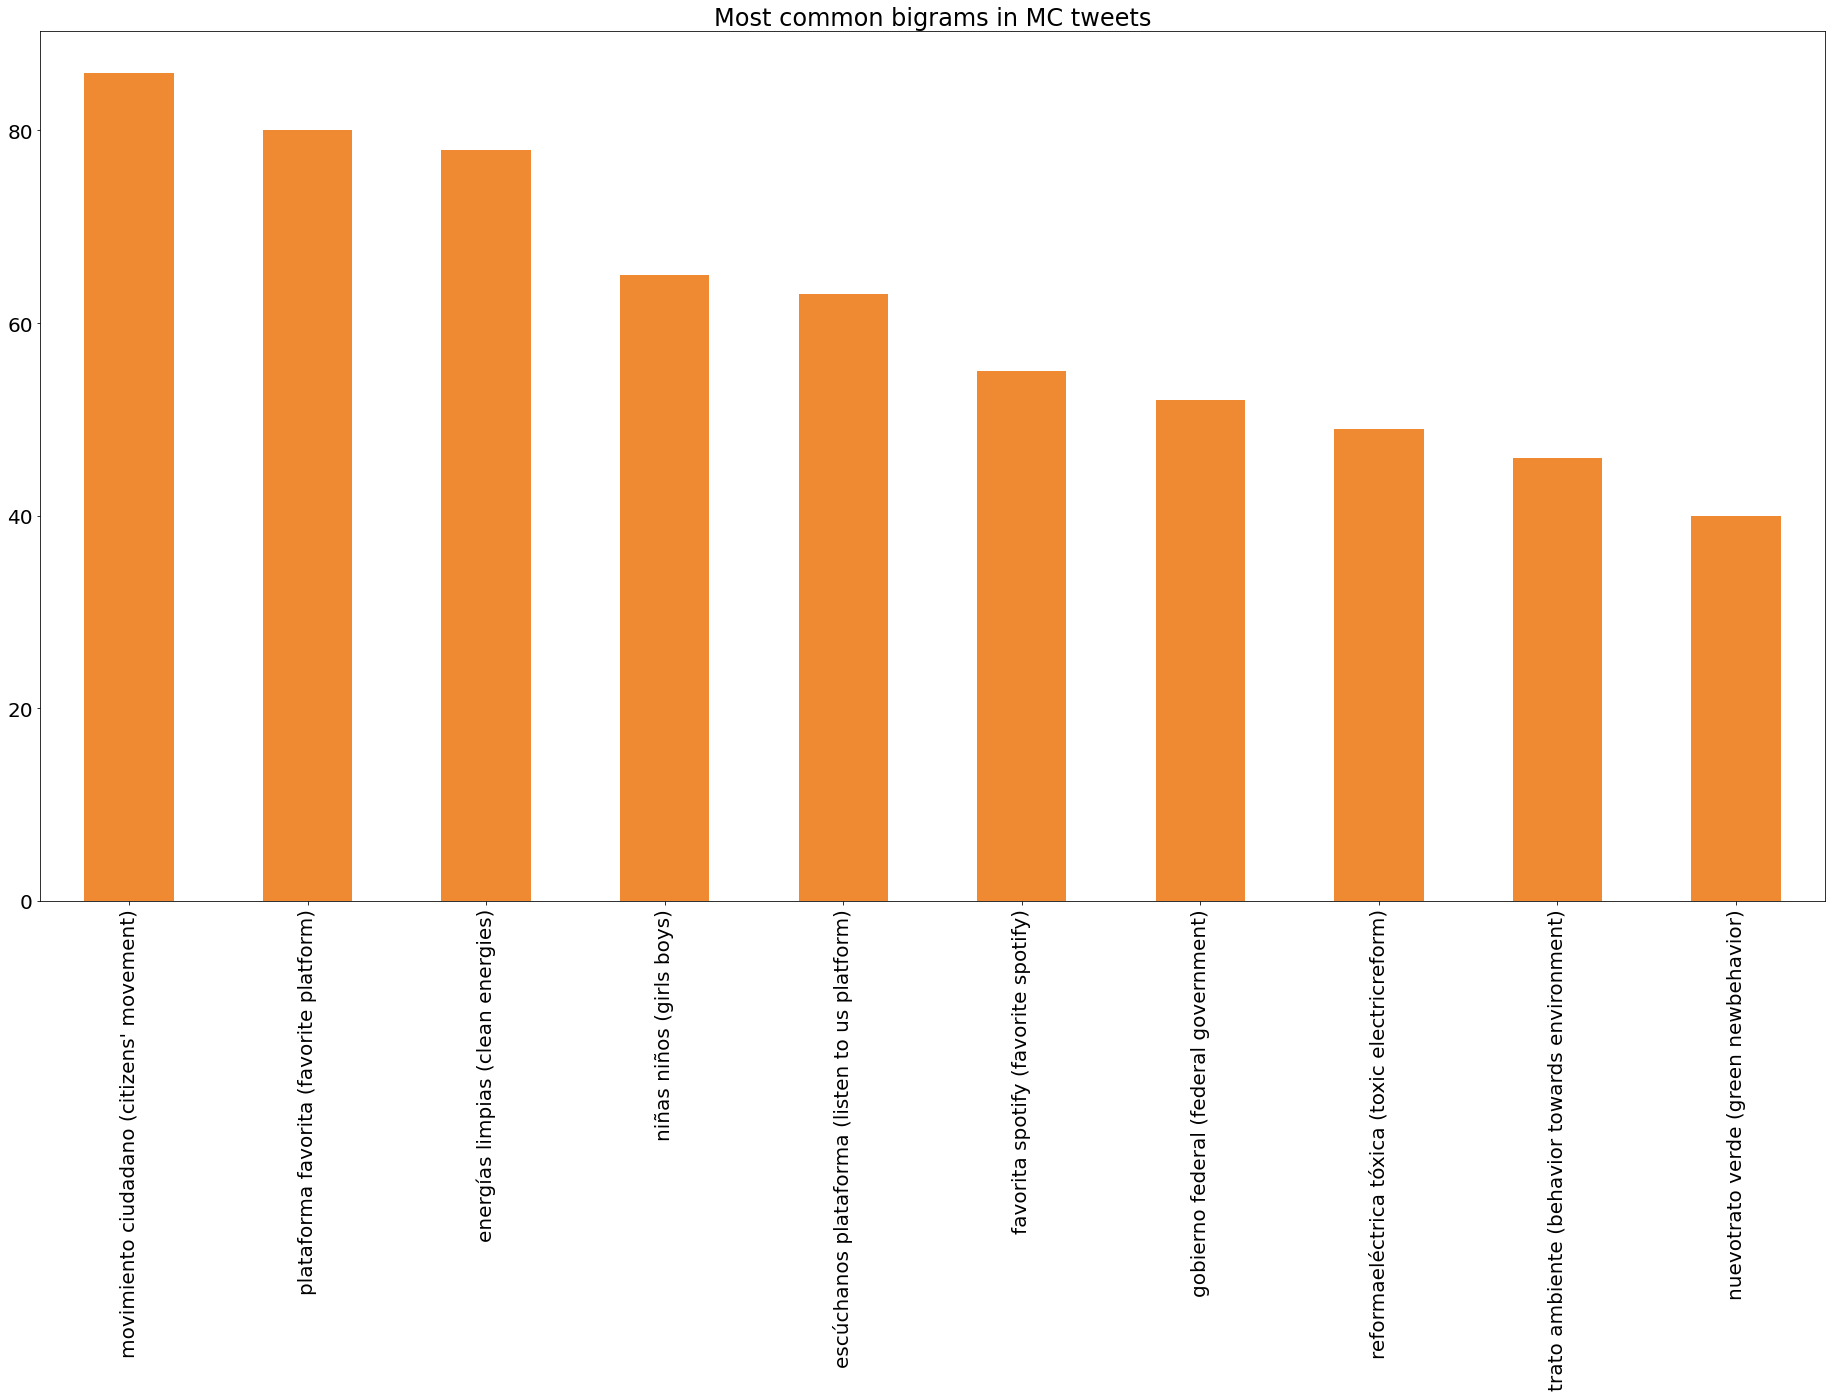

In [101]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in MC tweets")
mc_bigram_plot.plot.bar(color='#EF8A33');

In [102]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common bigrams.

mrn_bi_tweets = cvec_bi.fit_transform(mrn_df['tweet'])

mrn_bi_tweets_df = pd.DataFrame(data=mrn_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mrn_most_common_bigrams = mrn_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_bigrams

presidente méxico                345
lopezobrador_ presidente         336
22 conferenciapresidente         255
presidente lopezobrador_         243
pueblo democracia                117
compartimos resumen              116
información pueblo               116
resumen conferenciapresidente    116
4t información                   115
democracia transparencia         114
dtype: int64

In [103]:
mrn_bigram_plot = mrn_most_common_bigrams.copy()
mrn_bigram_plot.index = [
    'presidente méxico (mexico president)',
    'lopezobrador_ presidente (current president)',
    '22 conferenciapresidente (22 presidentialconference)',
    'presidente lopezobrador_',
    'pueblo democracia (people democracy)',
    'compartimos resumen (we share summary)',
    'información pueblo (information people)',
    'resumen conferenciapresidente (presidentialconference summary)',
    '4t información (4th transformation info.)',
    'democracia transparencia (transparent democracy)'
]

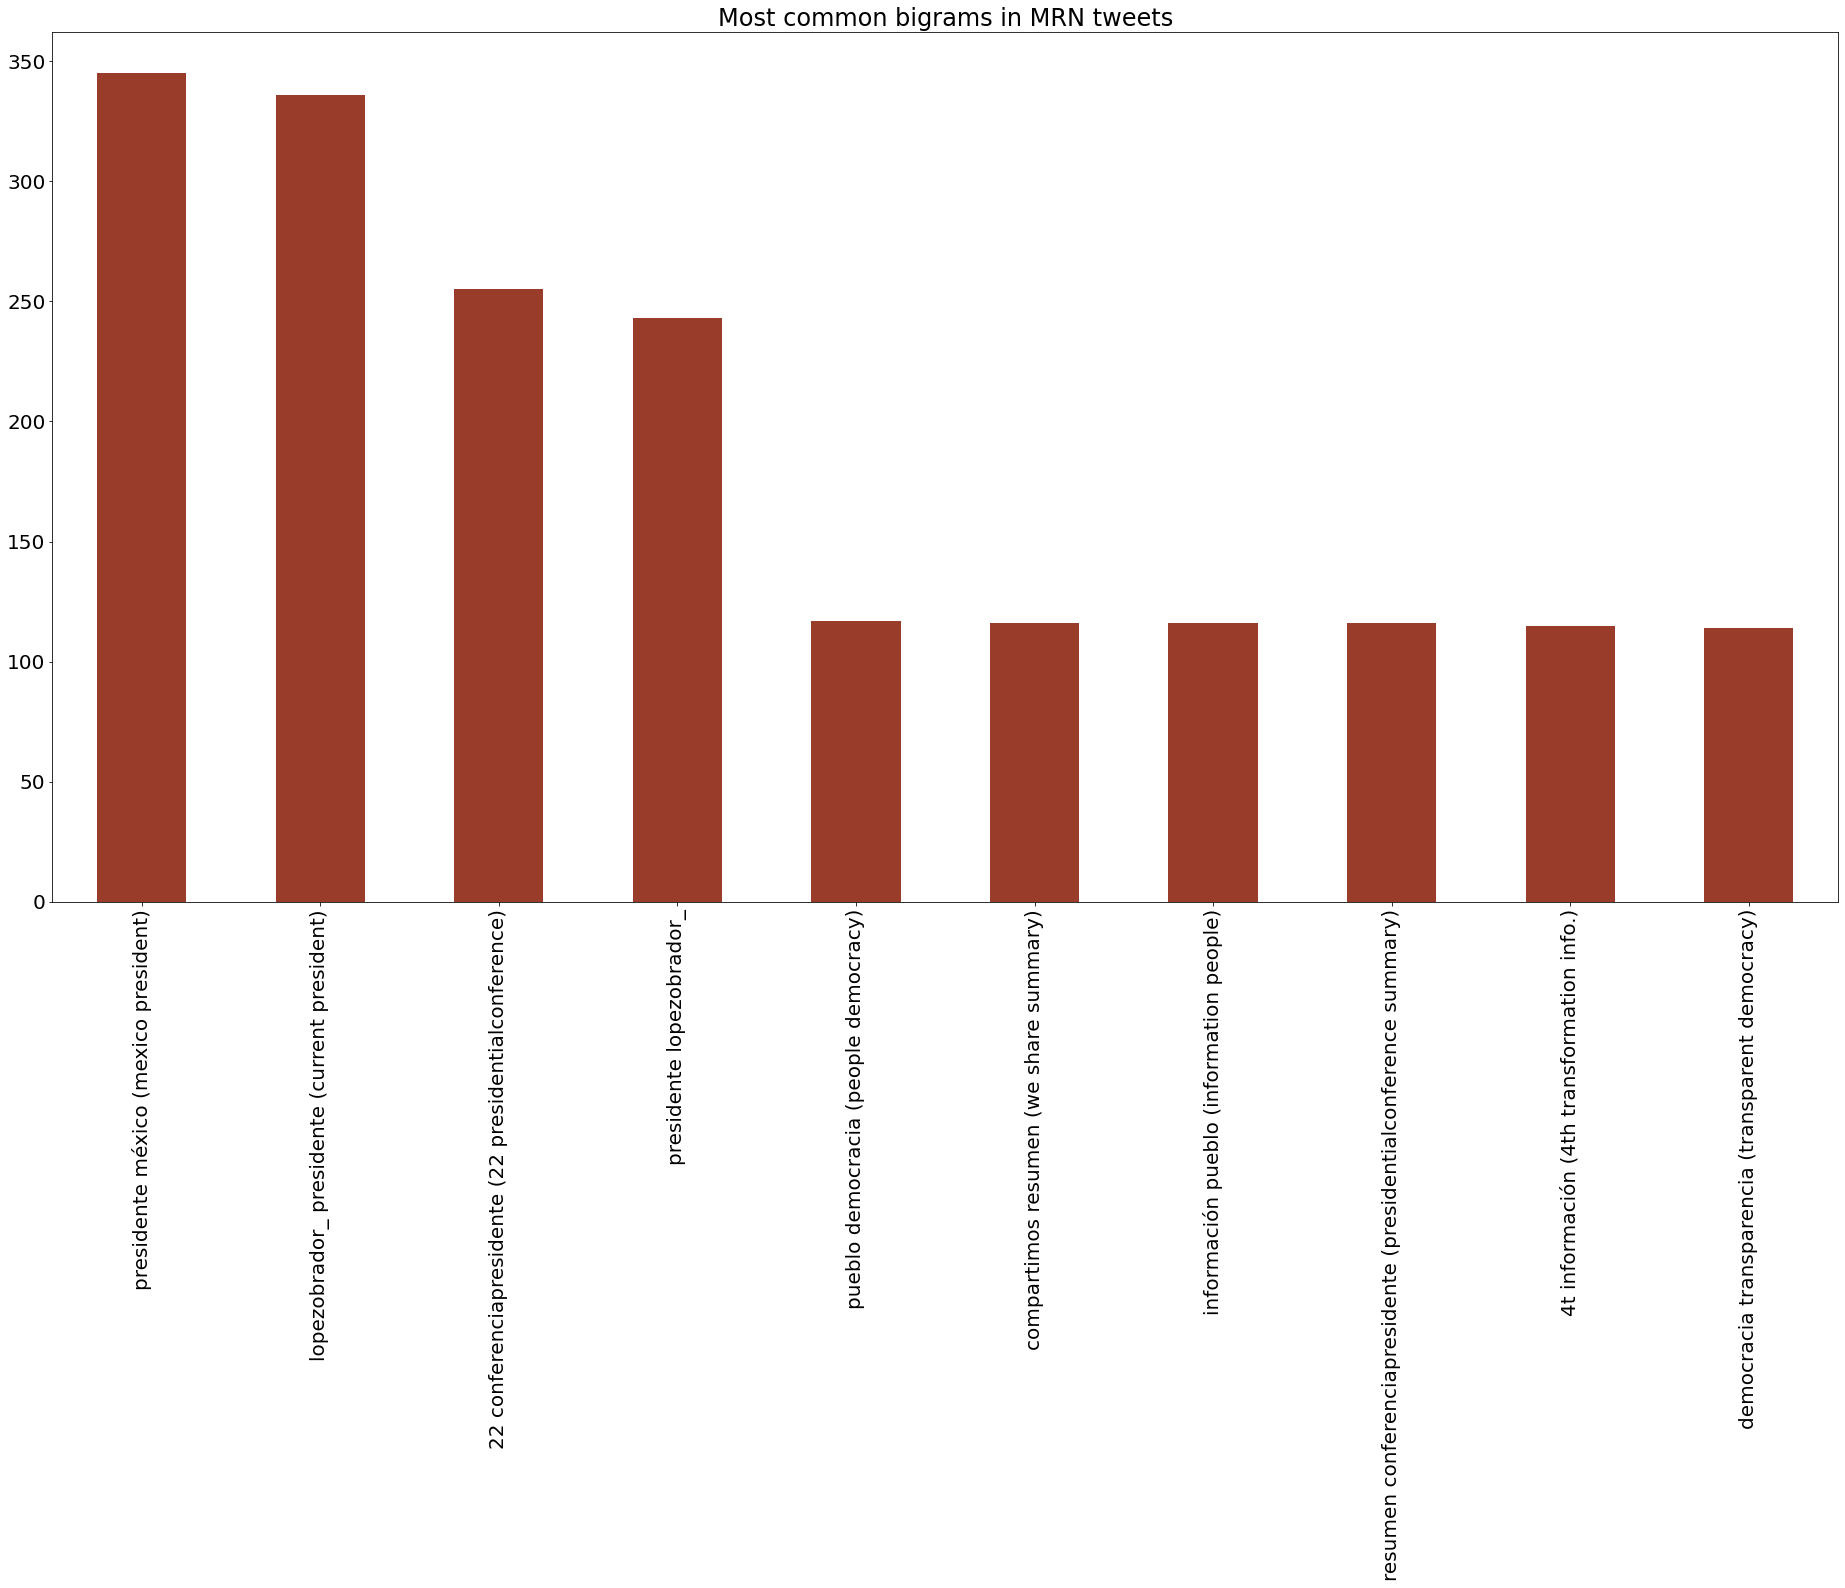

In [105]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in MRN tweets")
mrn_bigram_plot.plot.bar(color='#993C2A');

### 10 Most Common Trigrams

In [106]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into trigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common trigrams.
cvec_tri = CountVectorizer(ngram_range=(3, 3), stop_words=frozenset(spanish), lowercase=True)

pan_tri_tweets = cvec_tri.fit_transform(pan_df['tweet'])

pan_tri_tweets_df = pd.DataFrame(data=pan_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pan_most_common_trigrams = pan_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_trigrams

familiares seres queridos                 33
lamentamos profundamente fallecimiento    25
queridos descanse paz                     25
seres queridos descanse                   25
san luis potosí                           22
energías limpias renovables               22
cambiar rumbo méxico                      18
sentido pésame familiares                 17
pésame familiares seres                   16
cambiar rumbo país                        16
dtype: int64

In [107]:
pan_trigram_plot = pan_most_common_trigrams.copy()
pan_trigram_plot.index = [
    'familiares seres queridos (family members loved ones)',
    'lamentamos profundamente fallecimiento (we deeply regret passing)',
    'queridos descanse paz (loved ones RIP)',
    'seres queridos descanse (loved ones rest)',
    'san luis potosí',
    'energías limpias renovables (renewable clean energies)',
    'cambiar rumbo méxico (change Mexico course)',
    'sentido pésame familiares (deepest sympathy family members)',
    'pésame familiares seres (sympathy family members beings)', 
    'cambiar rumbo país (change course country)'
]

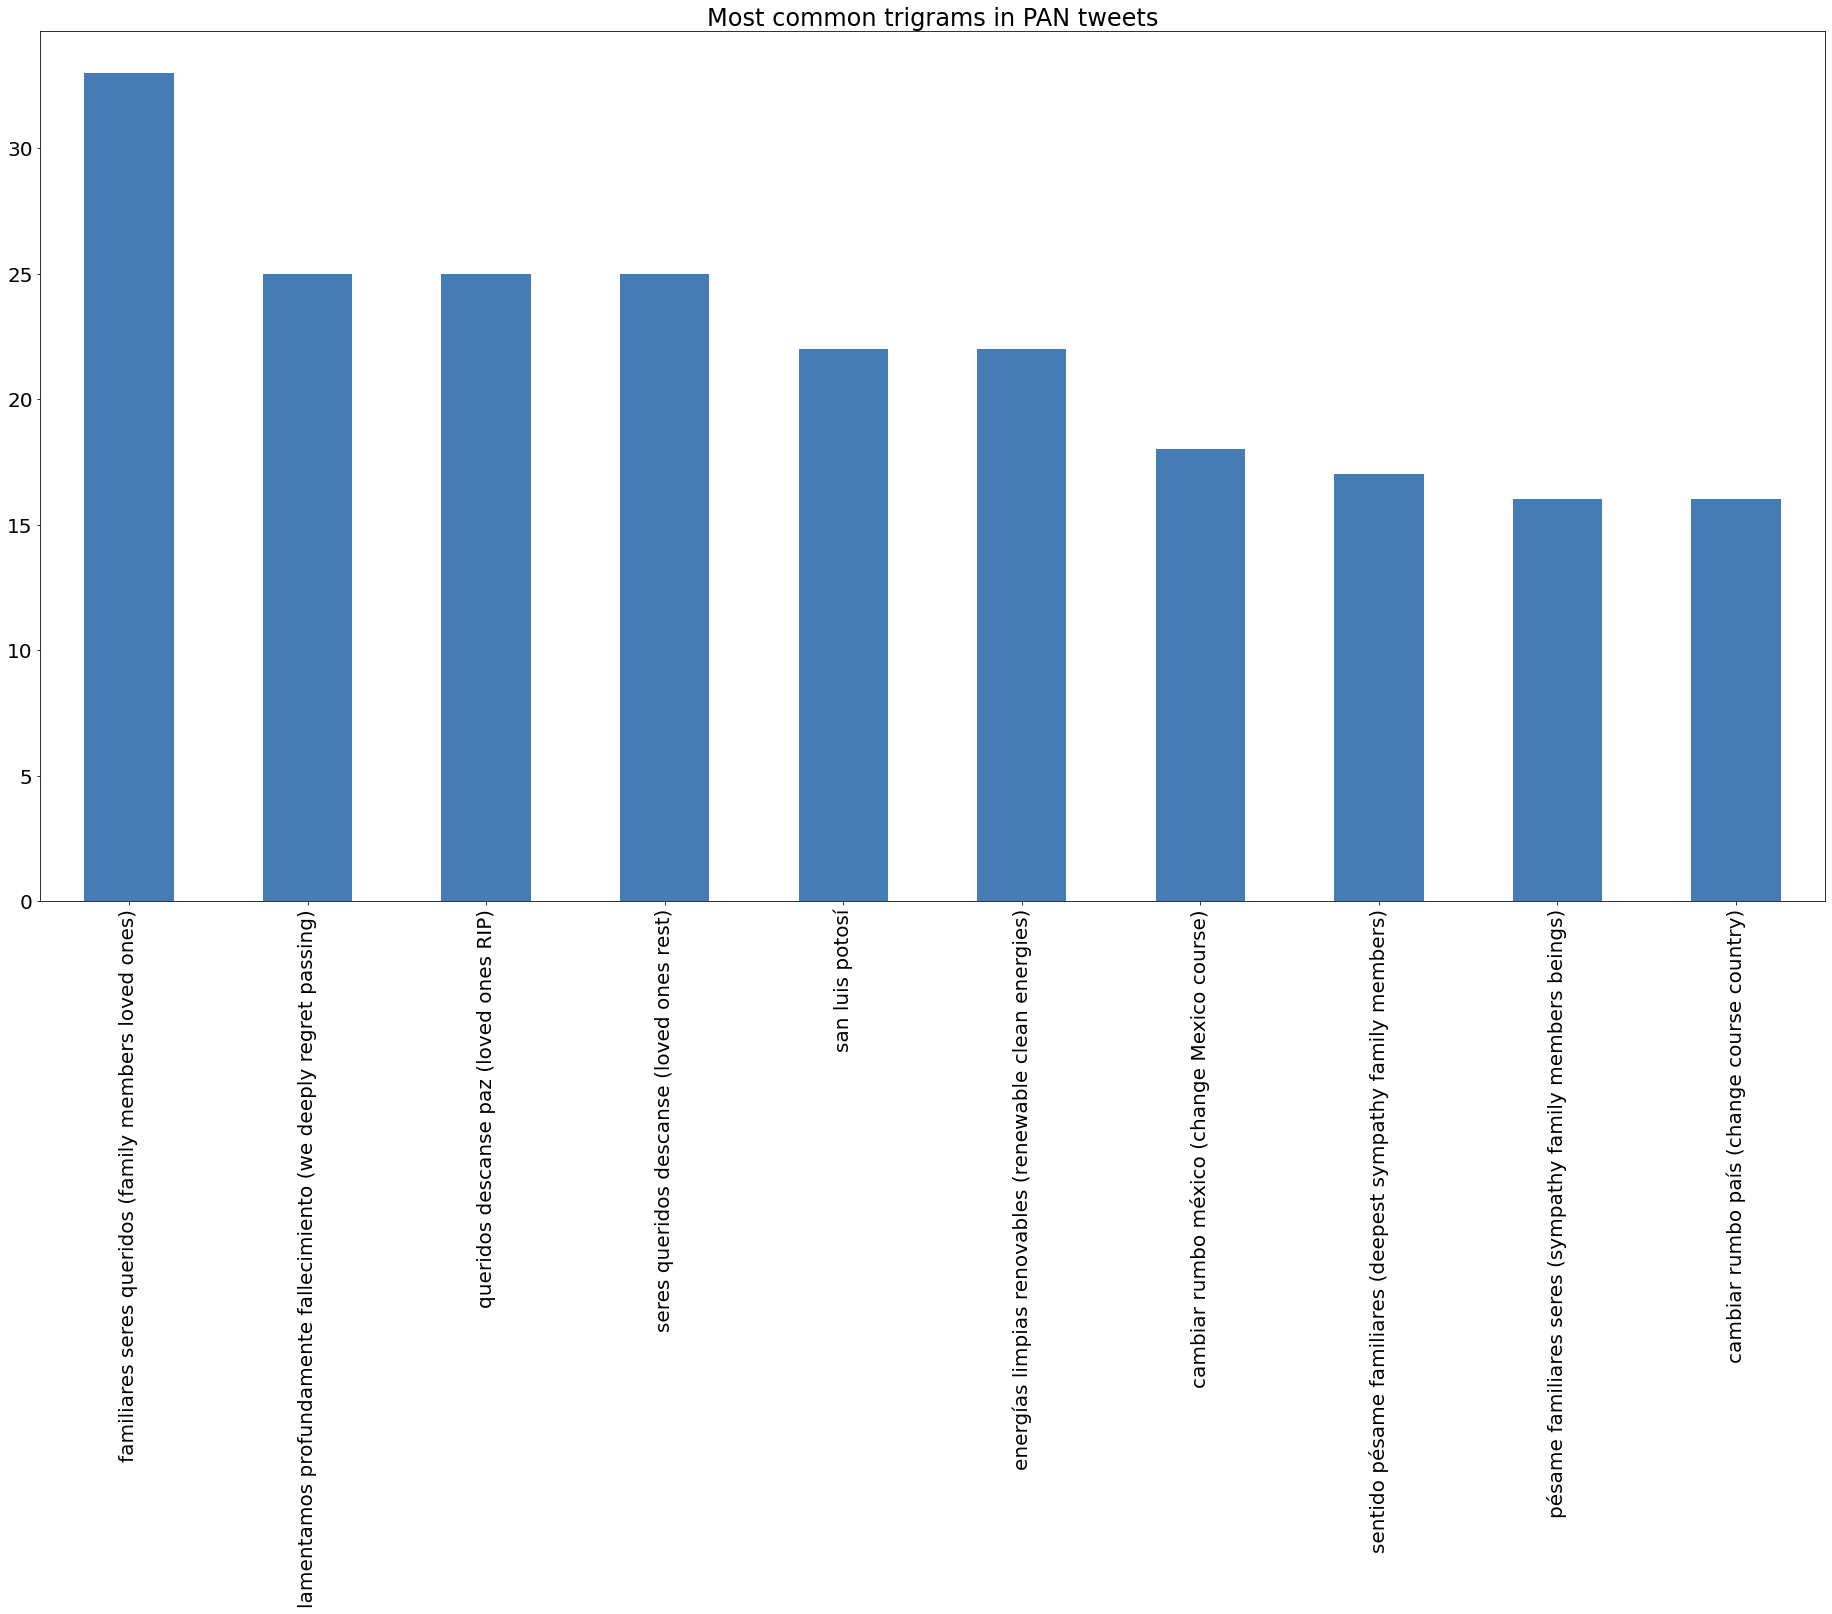

In [108]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PAN tweets")
pan_trigram_plot.plot.bar(color='#467CB6');

In [109]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common trigrams.

pri_tri_tweets = cvec_tri.fit_transform(pri_df['tweet'])

pri_tri_tweets_df = pd.DataFrame(data=pri_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pri_most_common_trigrams = pri_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_trigrams

presidente alitomorenoc reúne           34
alitomorenoc tomó protesta              30
presidente alitomorenoc tomó            29
presidente nacional alitomorenoc        22
presidente alitomorenoc secretaria      20
presidente alitomorenoc sostiene        20
alitomorenoc secretaria caroviggiano    18
presidente alitomorenoc candidato       17
san luis potosí                         16
candidato presidencia municipal         15
dtype: int64

In [110]:
pri_trigram_plot = pri_most_common_trigrams.copy()
pri_trigram_plot.index = [
    'presidente alitomorenoc reúne (PRI party president gathers)',
    'alitomorenoc tomó protesta (PRI party president took oath)',
    'presidente alitomorenoc tomó (PRI president took)',
    'presidente nacional alitomorenoc (PRI national president)',
    'presidente alitomorenoc secretaria (PRI president ministry)',
    'presidente alitomorenoc sostiene (PRI president maintains)',
    'alitomorenoc secretaria caroviggiano',
    'presidente alitomorenoc candidato (PRI president candidate)',
    'san luis potosí', 
    'candidato presidencia municipal (municipal presidential candidate)'
]

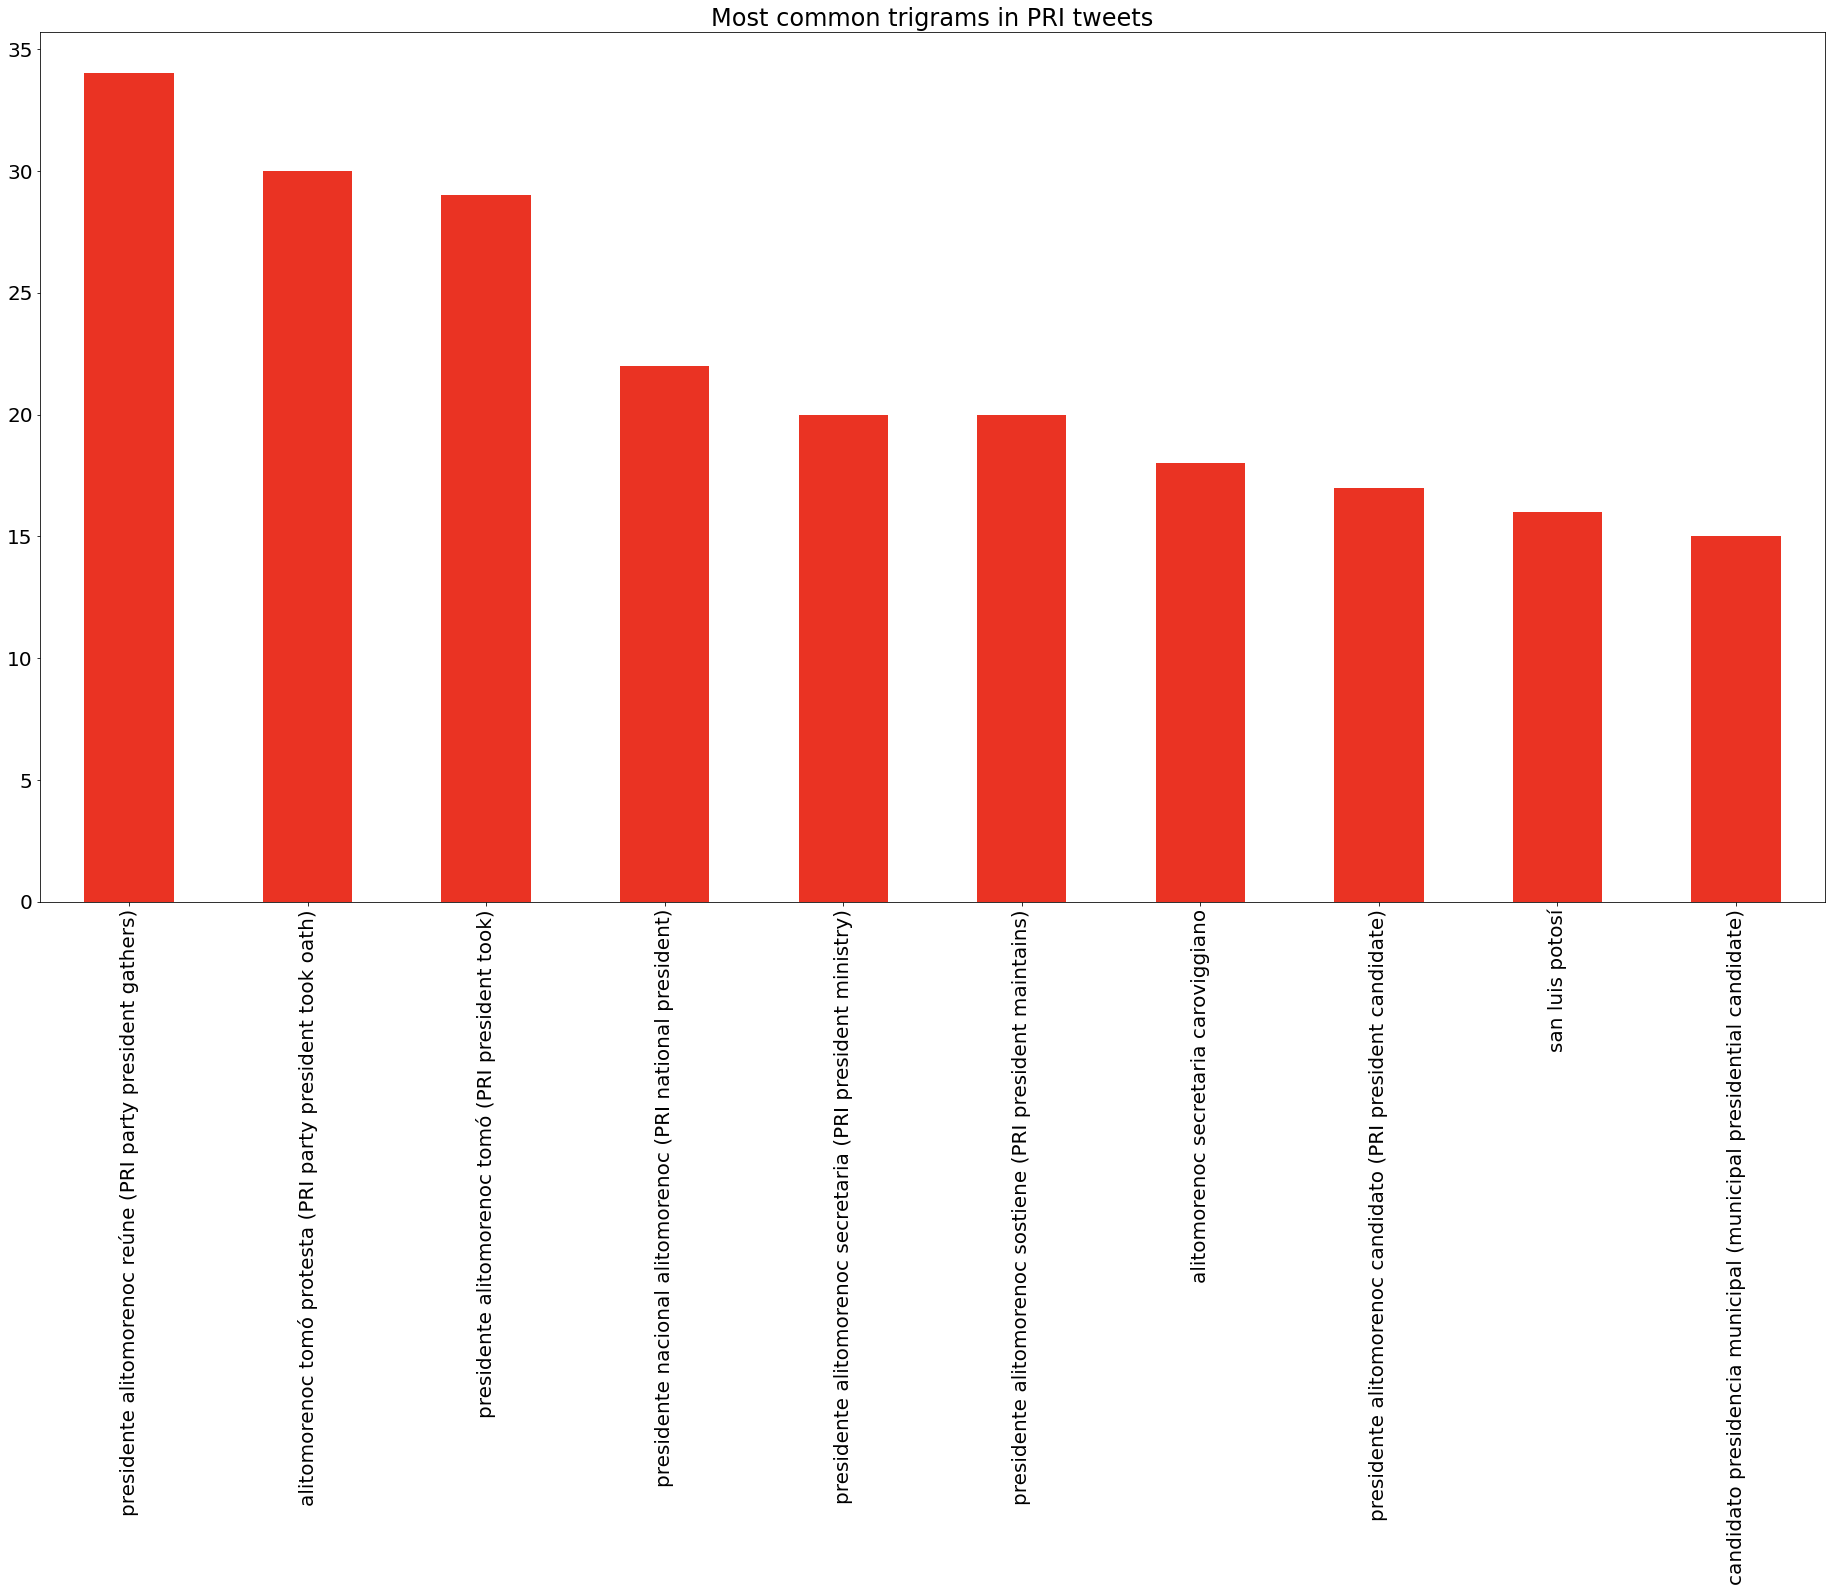

In [111]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PRI tweets")
pri_trigram_plot.plot.bar(color='#EA3323');

In [112]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common trigrams.

prd_tri_tweets = cvec_tri.fit_transform(prd_df['tweet'])

prd_tri_tweets_df = pd.DataFrame(data=prd_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

prd_most_common_trigrams = prd_tri_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_trigrams

jesus_zambranog link boletín                    36
cara millones estudiantes                       33
delfina gómez dé                                33
dé cara millones                                33
estudiantes niega educación                     33
gómez dé cara                                   33
millones estudiantes niega                      33
niega educación completo                        20
educación completo alimentación                 19
evitar comparezca escuelasdetiempocompletosí    19
dtype: int64

In [113]:
prd_trigram_plot = prd_most_common_trigrams.copy()
prd_trigram_plot.index = [
    'jesus_zambranog link boletín (PRD party president bulletin link)',
    'cara millones estudiantes (face millions students)',
    'delfina gómez dé (Public Education Minister give)',
    'dé cara millones (face millions)',
    'estudiantes niega educación (students deny education)',
    'gómez dé cara (Public Education Minister face)',
    'millones estudiantes niega (millions students deny)',
    'niega educación completo (deny complete education)',
    'educación completo alimentación (complete education nutrition)', 
    'evitar comparezca escuelasdetiempocompletosí (avoid appear fulltimeschoolsyes)'
]

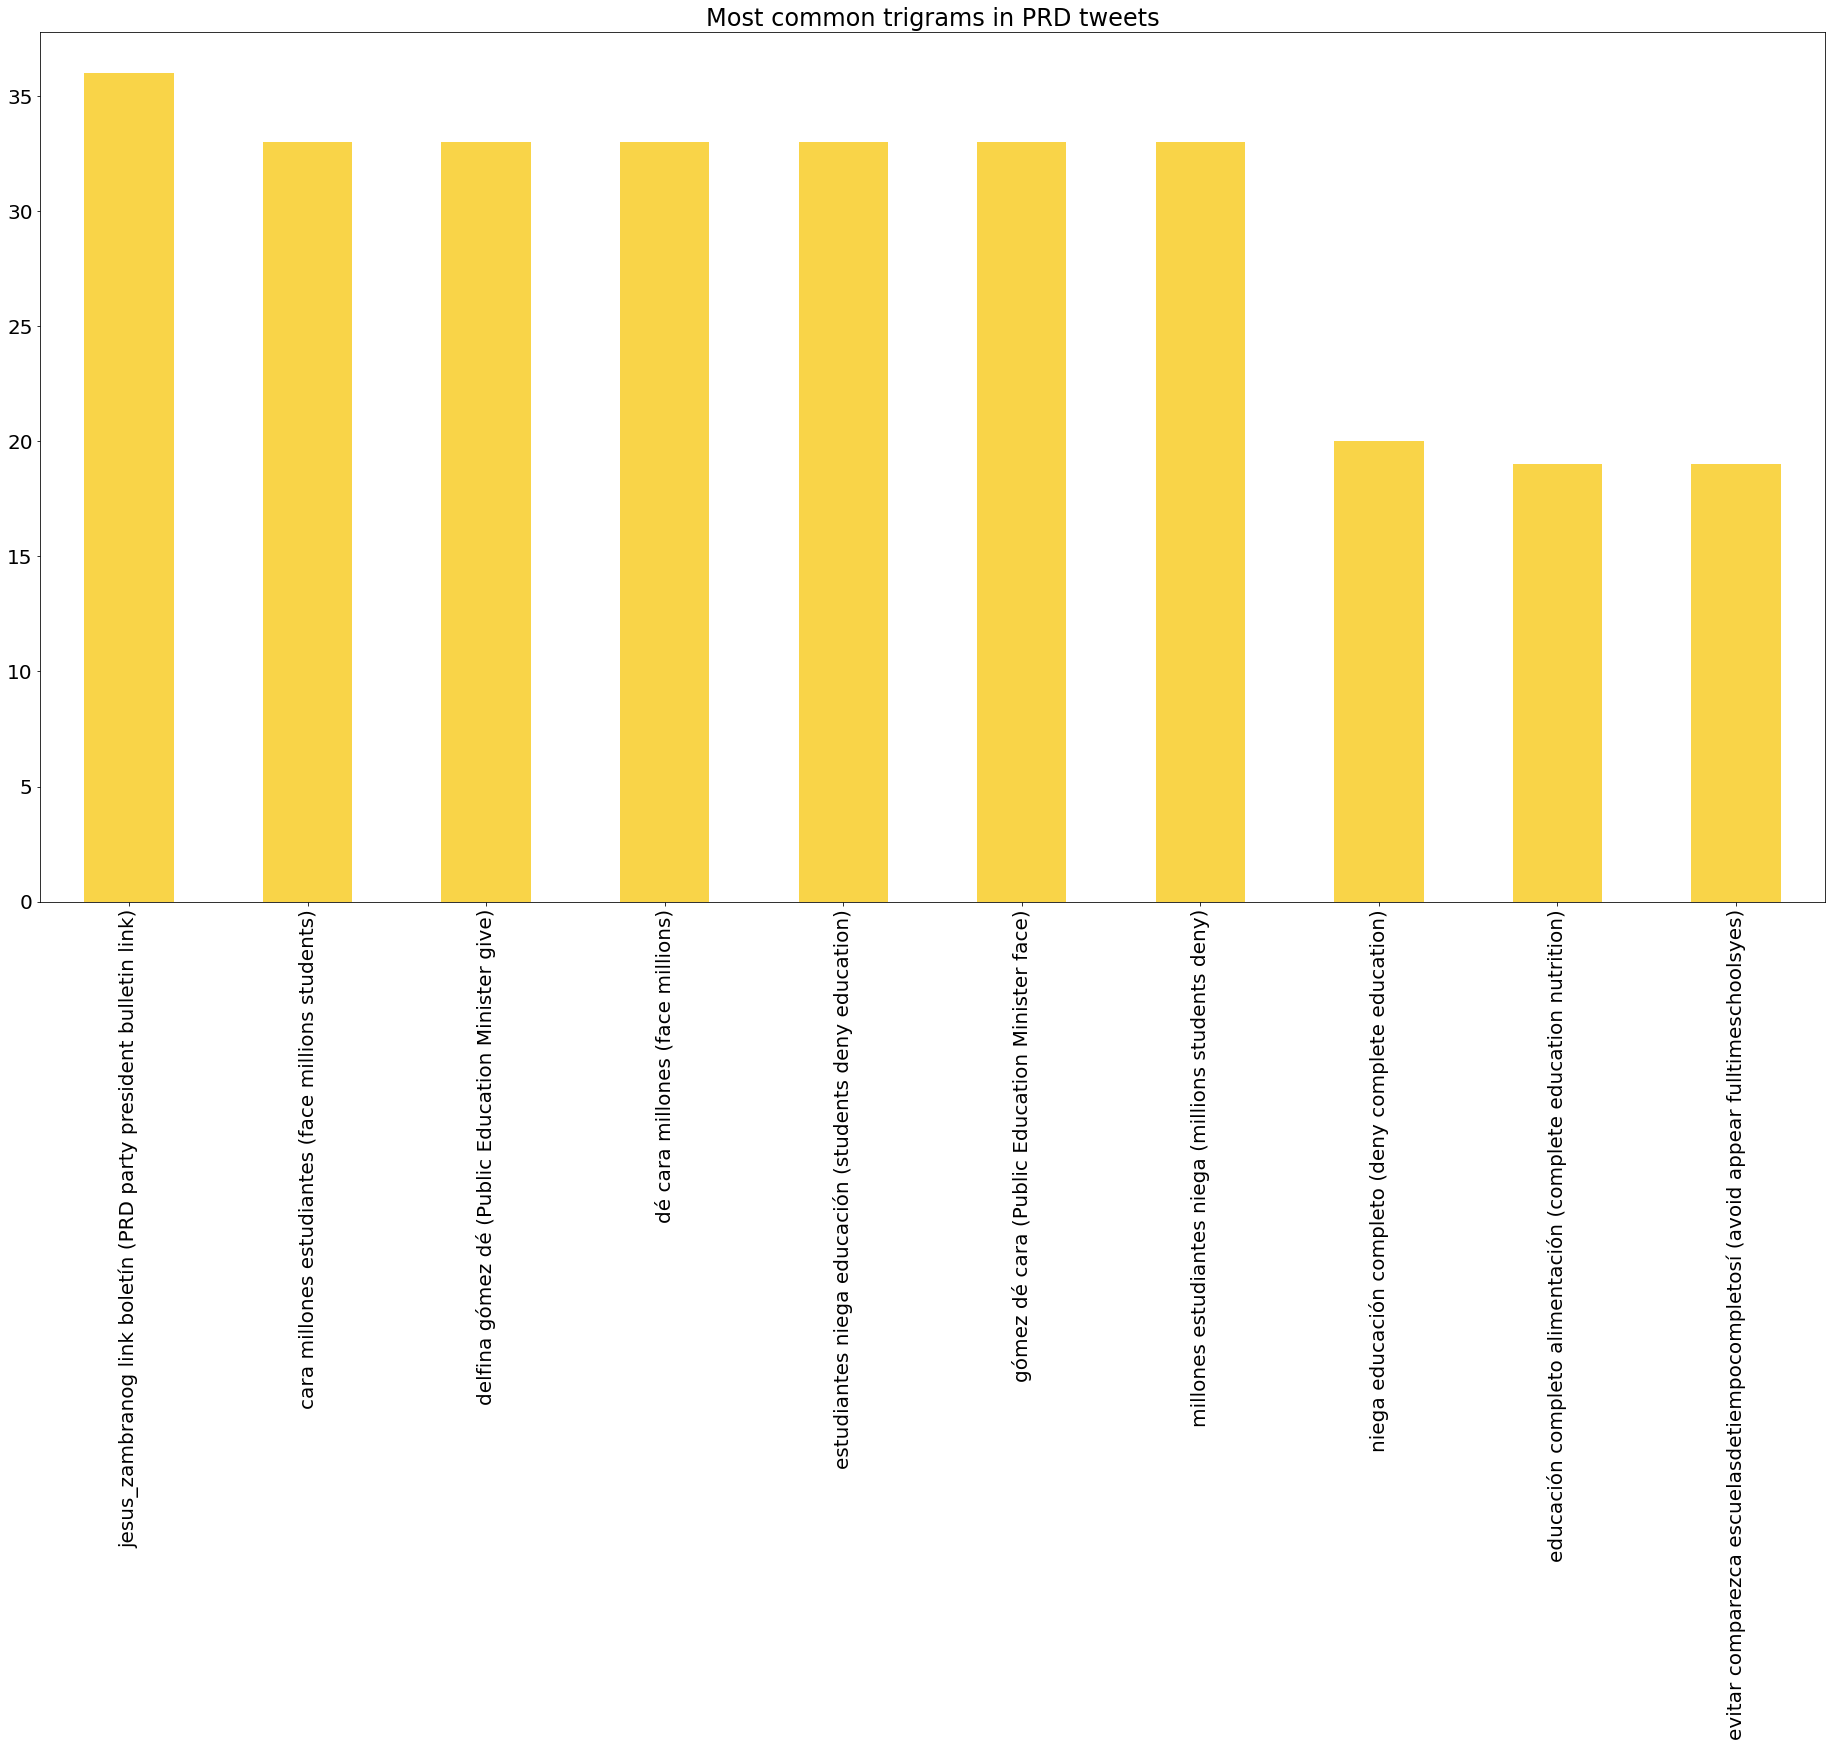

In [114]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PRD tweets")
prd_trigram_plot.plot.bar(color='#F9D448');

In [115]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common trigrams.

pv_tri_tweets = cvec_tri.fit_transform(pv_df['tweet'])

pv_tri_tweets_df = pd.DataFrame(data=pv_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pv_most_common_trigrams = pv_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_trigrams

motivo cumpleaños sigamos             35
san luis potosí                       33
cumpleaños sigamos trabajando         32
felicitación fuerte abrazo            32
enviamos felicitación fuerte          32
sigamos trabajando méxicoverde        29
trabajando méxicoverde enhorabuena    27
abrazo amigo compañero                21
fuerte abrazo amigo                   21
3delverde cámara diputados            18
dtype: int64

In [117]:
pv_trigram_plot = pv_most_common_trigrams.copy()
pv_trigram_plot.index = [
    'motivo cumpleaños sigamos (birthday reasons let\'s continue)',
    'san luis potosí',
    'cumpleaños sigamos trabajando (birthday let\'s keep working)',
    'felicitación fuerte abrazo (congratulation big hug)',
    'enviamos felicitación fuerte (we send big congratulation)',
    'sigamos trabajando méxicoverde (let\'s keep working green mexico)',
    'trabajando méxicoverde enhorabuena (working greenmexico congratulations)',
    'abrazo amigo compañero (hug friend companion)',
    'fuerte abrazo amigo (big hug friend)', 
    '3delverde cámara diputados (3ofgreen representatives chamber)'
]

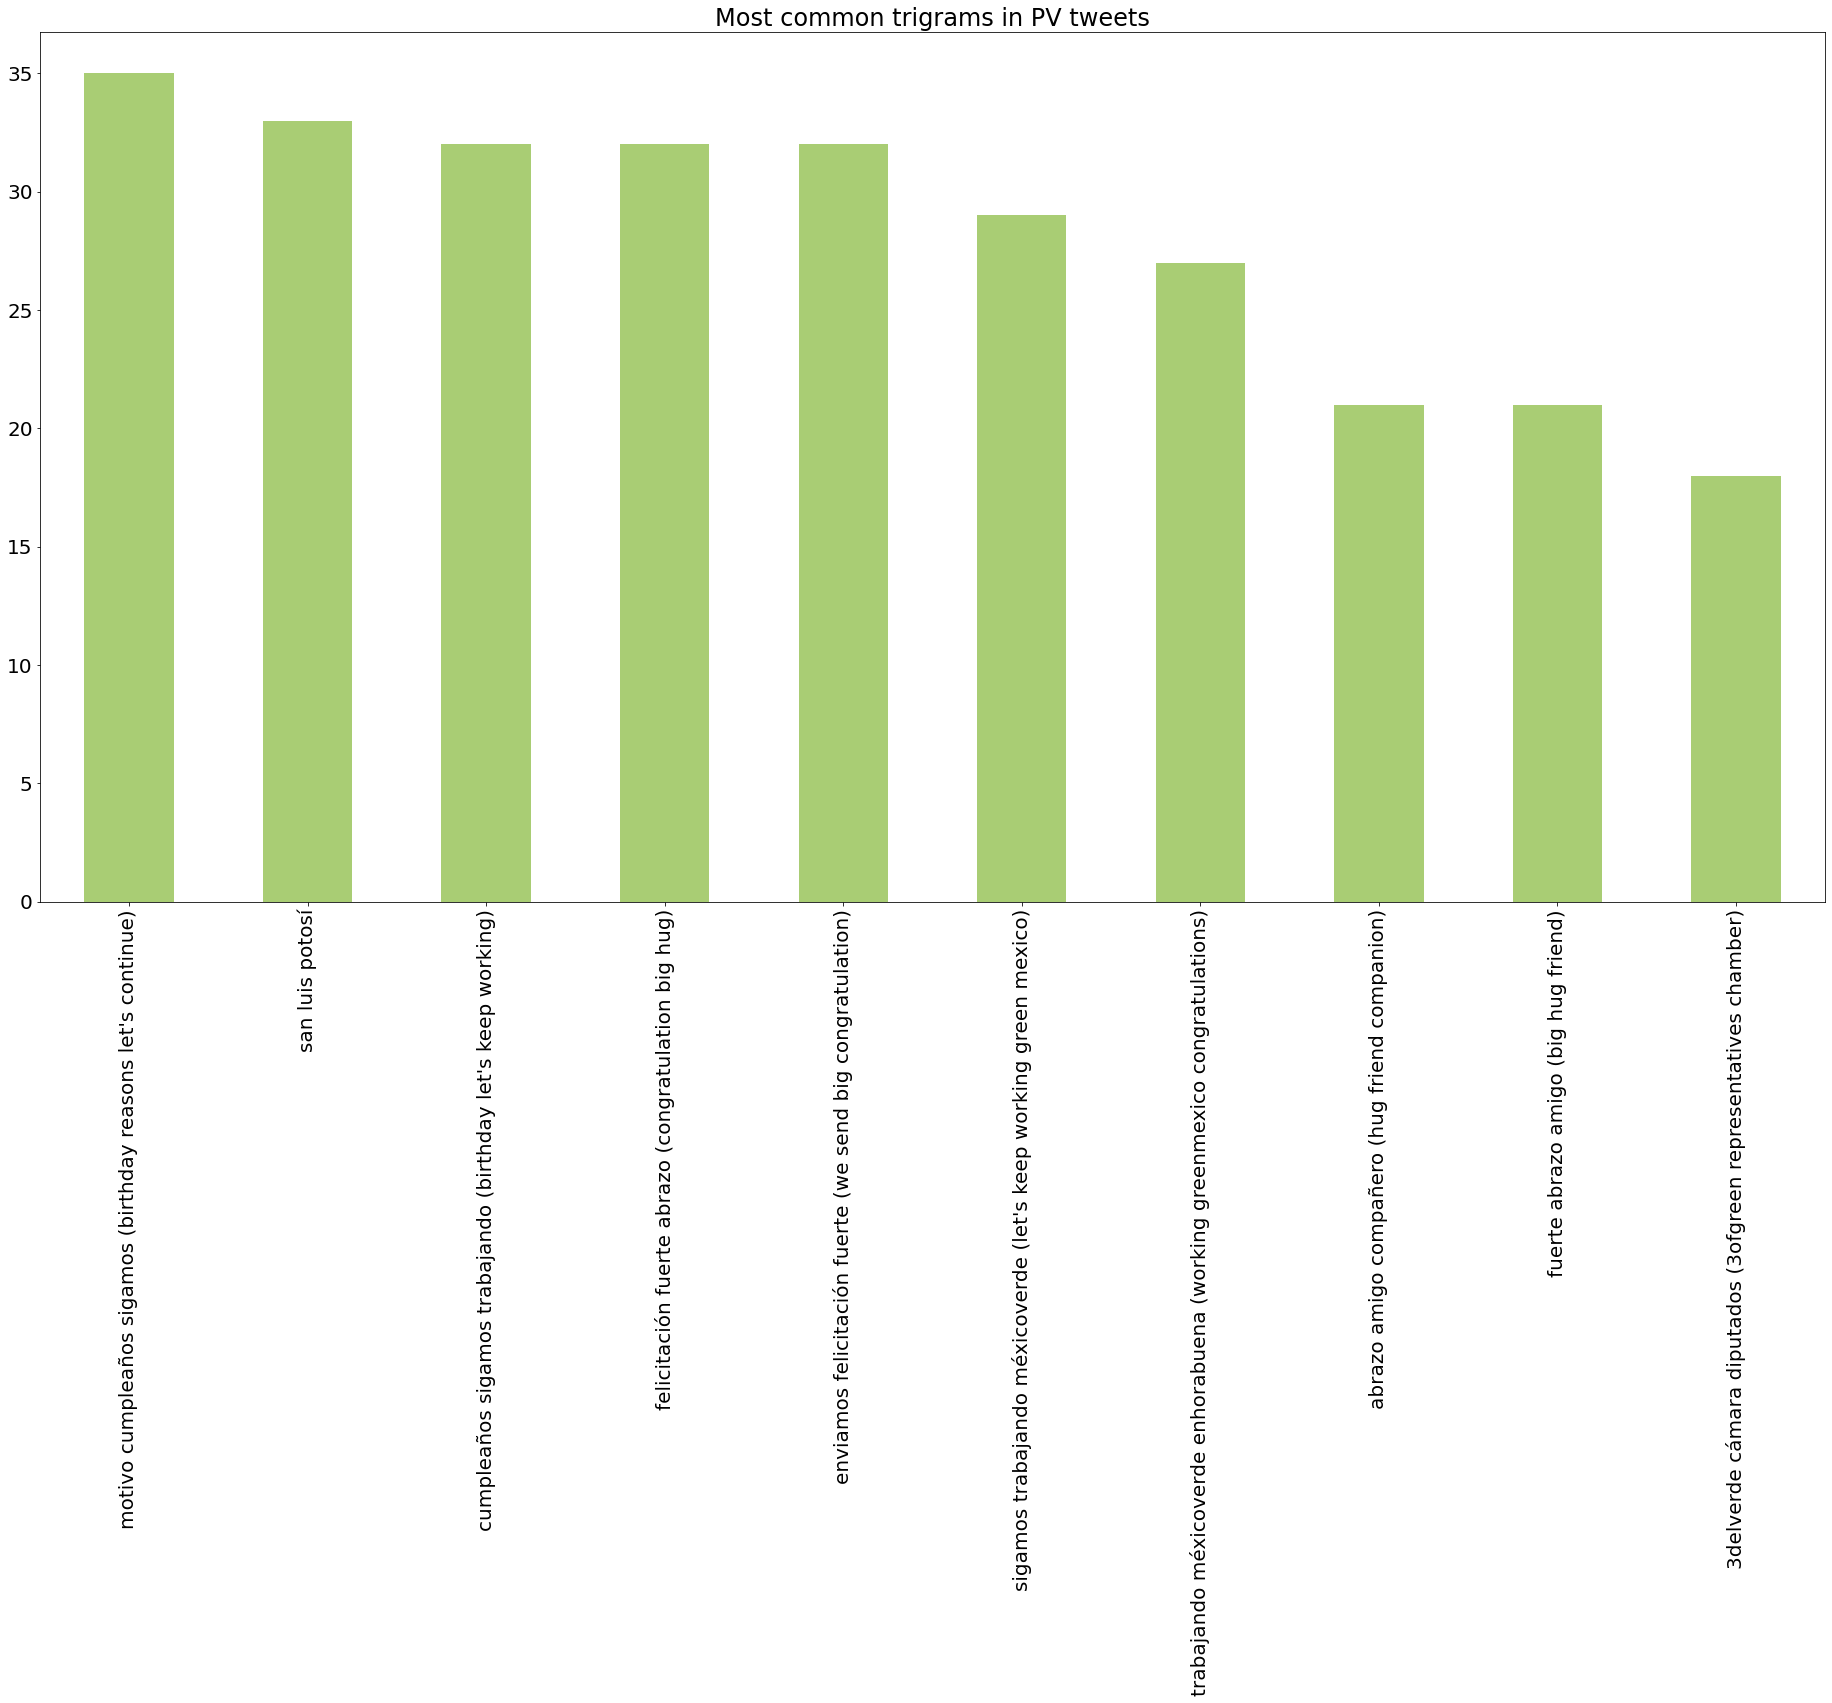

In [118]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PV tweets")
pv_trigram_plot.plot.bar(color='#A9CD74');

In [119]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common trigrams.

mc_tri_tweets = cvec_tri.fit_transform(mc_df['tweet'])

mc_tri_tweets_df = pd.DataFrame(data=mc_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mc_most_common_trigrams = mc_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_trigrams

escúchanos plataforma favorita        63
plataforma favorita spotify           55
energías limpias baratas              26
na na na                              22
evoluciónmexicana nuevotrato verde    17
darle trato ambiente                  17
centro causas frente                  17
personas centro causas                16
foro evoluciónmexicana nuevotrato     15
transitar energías limpias            14
dtype: int64

In [120]:
mc_trigram_plot = mc_most_common_trigrams.copy()
mc_trigram_plot.index = [
    'escúchanos plataforma favorita (listen to us favorite platform)',
    'plataforma favorita spotify (spotify favorite platform)',
    'energías limpias baratas (cheap clean energies)',
    'na na na',
    'evoluciónmexicana nuevotrato verde (mexicanevolution newbehaviortowards green)',
    'darle trato ambiente (give behavior towards green)',
    'centro causas frente (center causes front)',
    'personas centro causas (persons center causes',
    'foro evoluciónmexicana nuevotrato (mexicanevolution forum newbehaviortowards)', 
    'transitar energías limpias (circulate clean energies)'
]

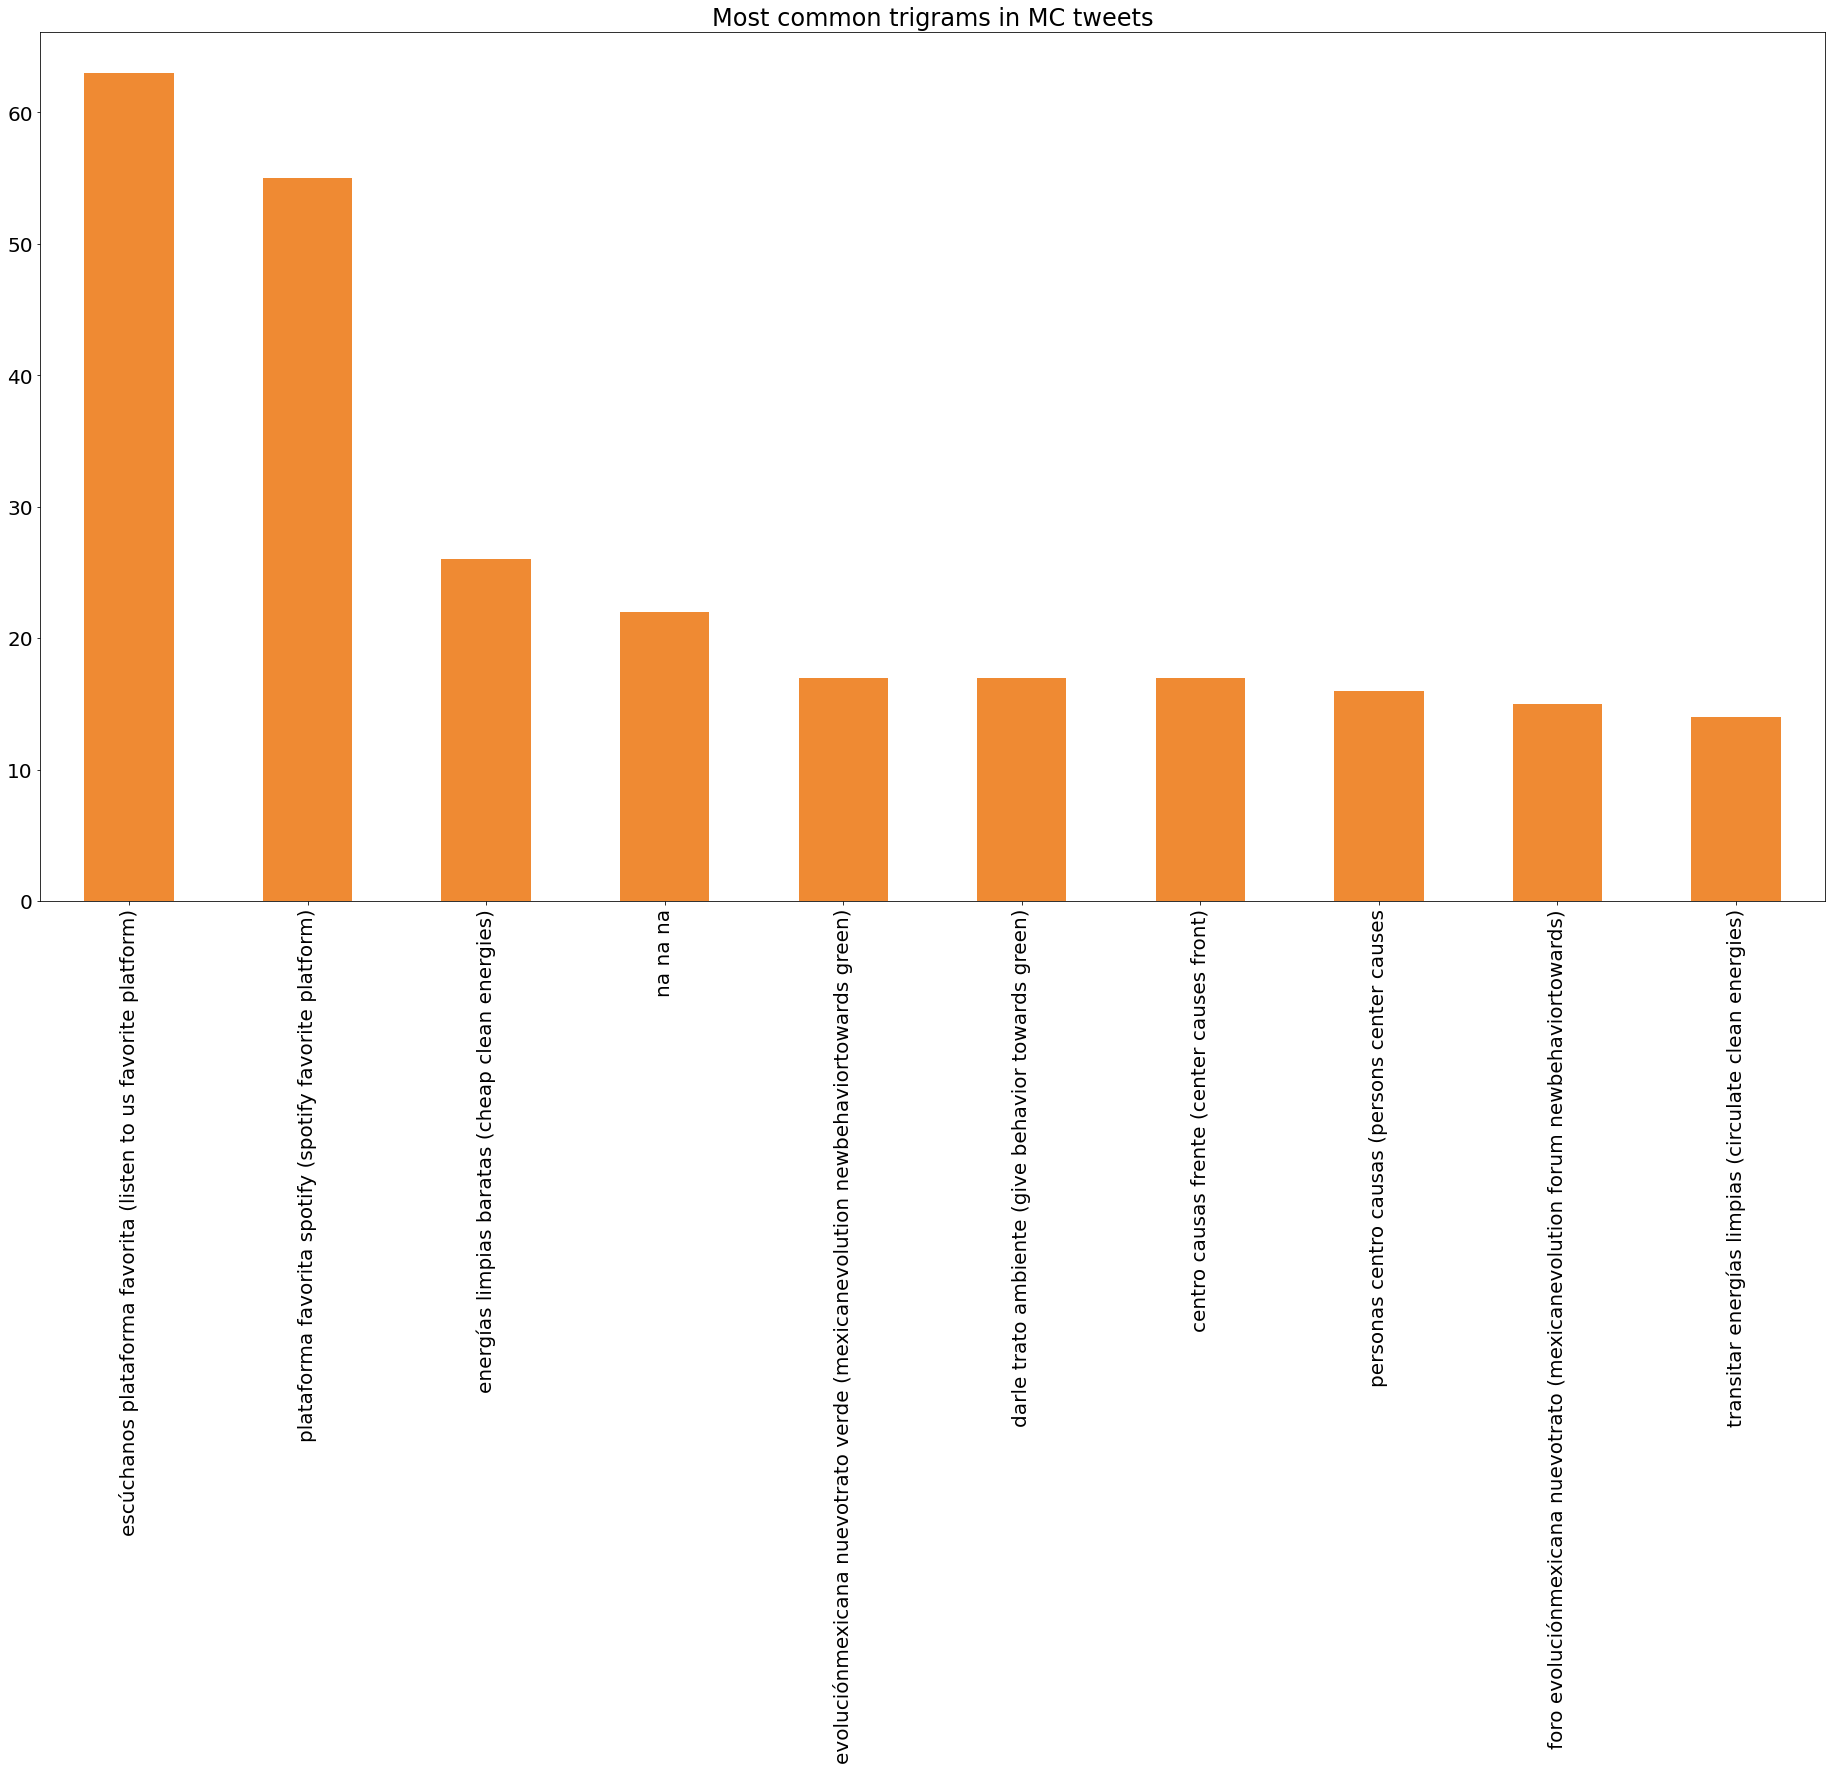

In [121]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in MC tweets")
mc_trigram_plot.plot.bar(color='#EF8A33');

In [122]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common trigrams.

mrn_tri_tweets = cvec_tri.fit_transform(mrn_df['tweet'])

mrn_tri_tweets_df = pd.DataFrame(data=mrn_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mrn_most_common_trigrams = mrn_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_trigrams

lopezobrador_ presidente méxico              335
compartimos resumen conferenciapresidente    116
4t información pueblo                        115
pueblo democracia transparencia              113
información pueblo democracia                113
conferenciapresidente 4t información         106
resumen conferenciapresidente 4t             106
02 22 conferenciapresidente                   85
03 22 conferenciapresidente                   81
01 22 conferenciapresidente                   70
dtype: int64

In [123]:
mrn_trigram_plot = mrn_most_common_trigrams.copy()
mrn_trigram_plot.index = [
    'lopezobrador_ presidente méxico (current Mexican president)',
    'compartimos resumen conferenciapresidente (we share summary presidential conference)',
    '4t información pueblo (4thtransformation information people)',
    'pueblo democracia transparencia (people democracy transparency)',
    'información pueblo democracia (information people democracy)',
    'conferenciapresidente 4t información (4thtransformation presidentialconference information)',
    'resumen conferenciapresidente 4t (4thtransformation presidentialconference summary)',
    '02 22 conferenciapresidente (02 22 presidentialconference',
    '03 22 conferenciapresidente (03 22 presidentialconference', 
    '01 22 conferenciapresidente (01 22 presidentialconference)'
]

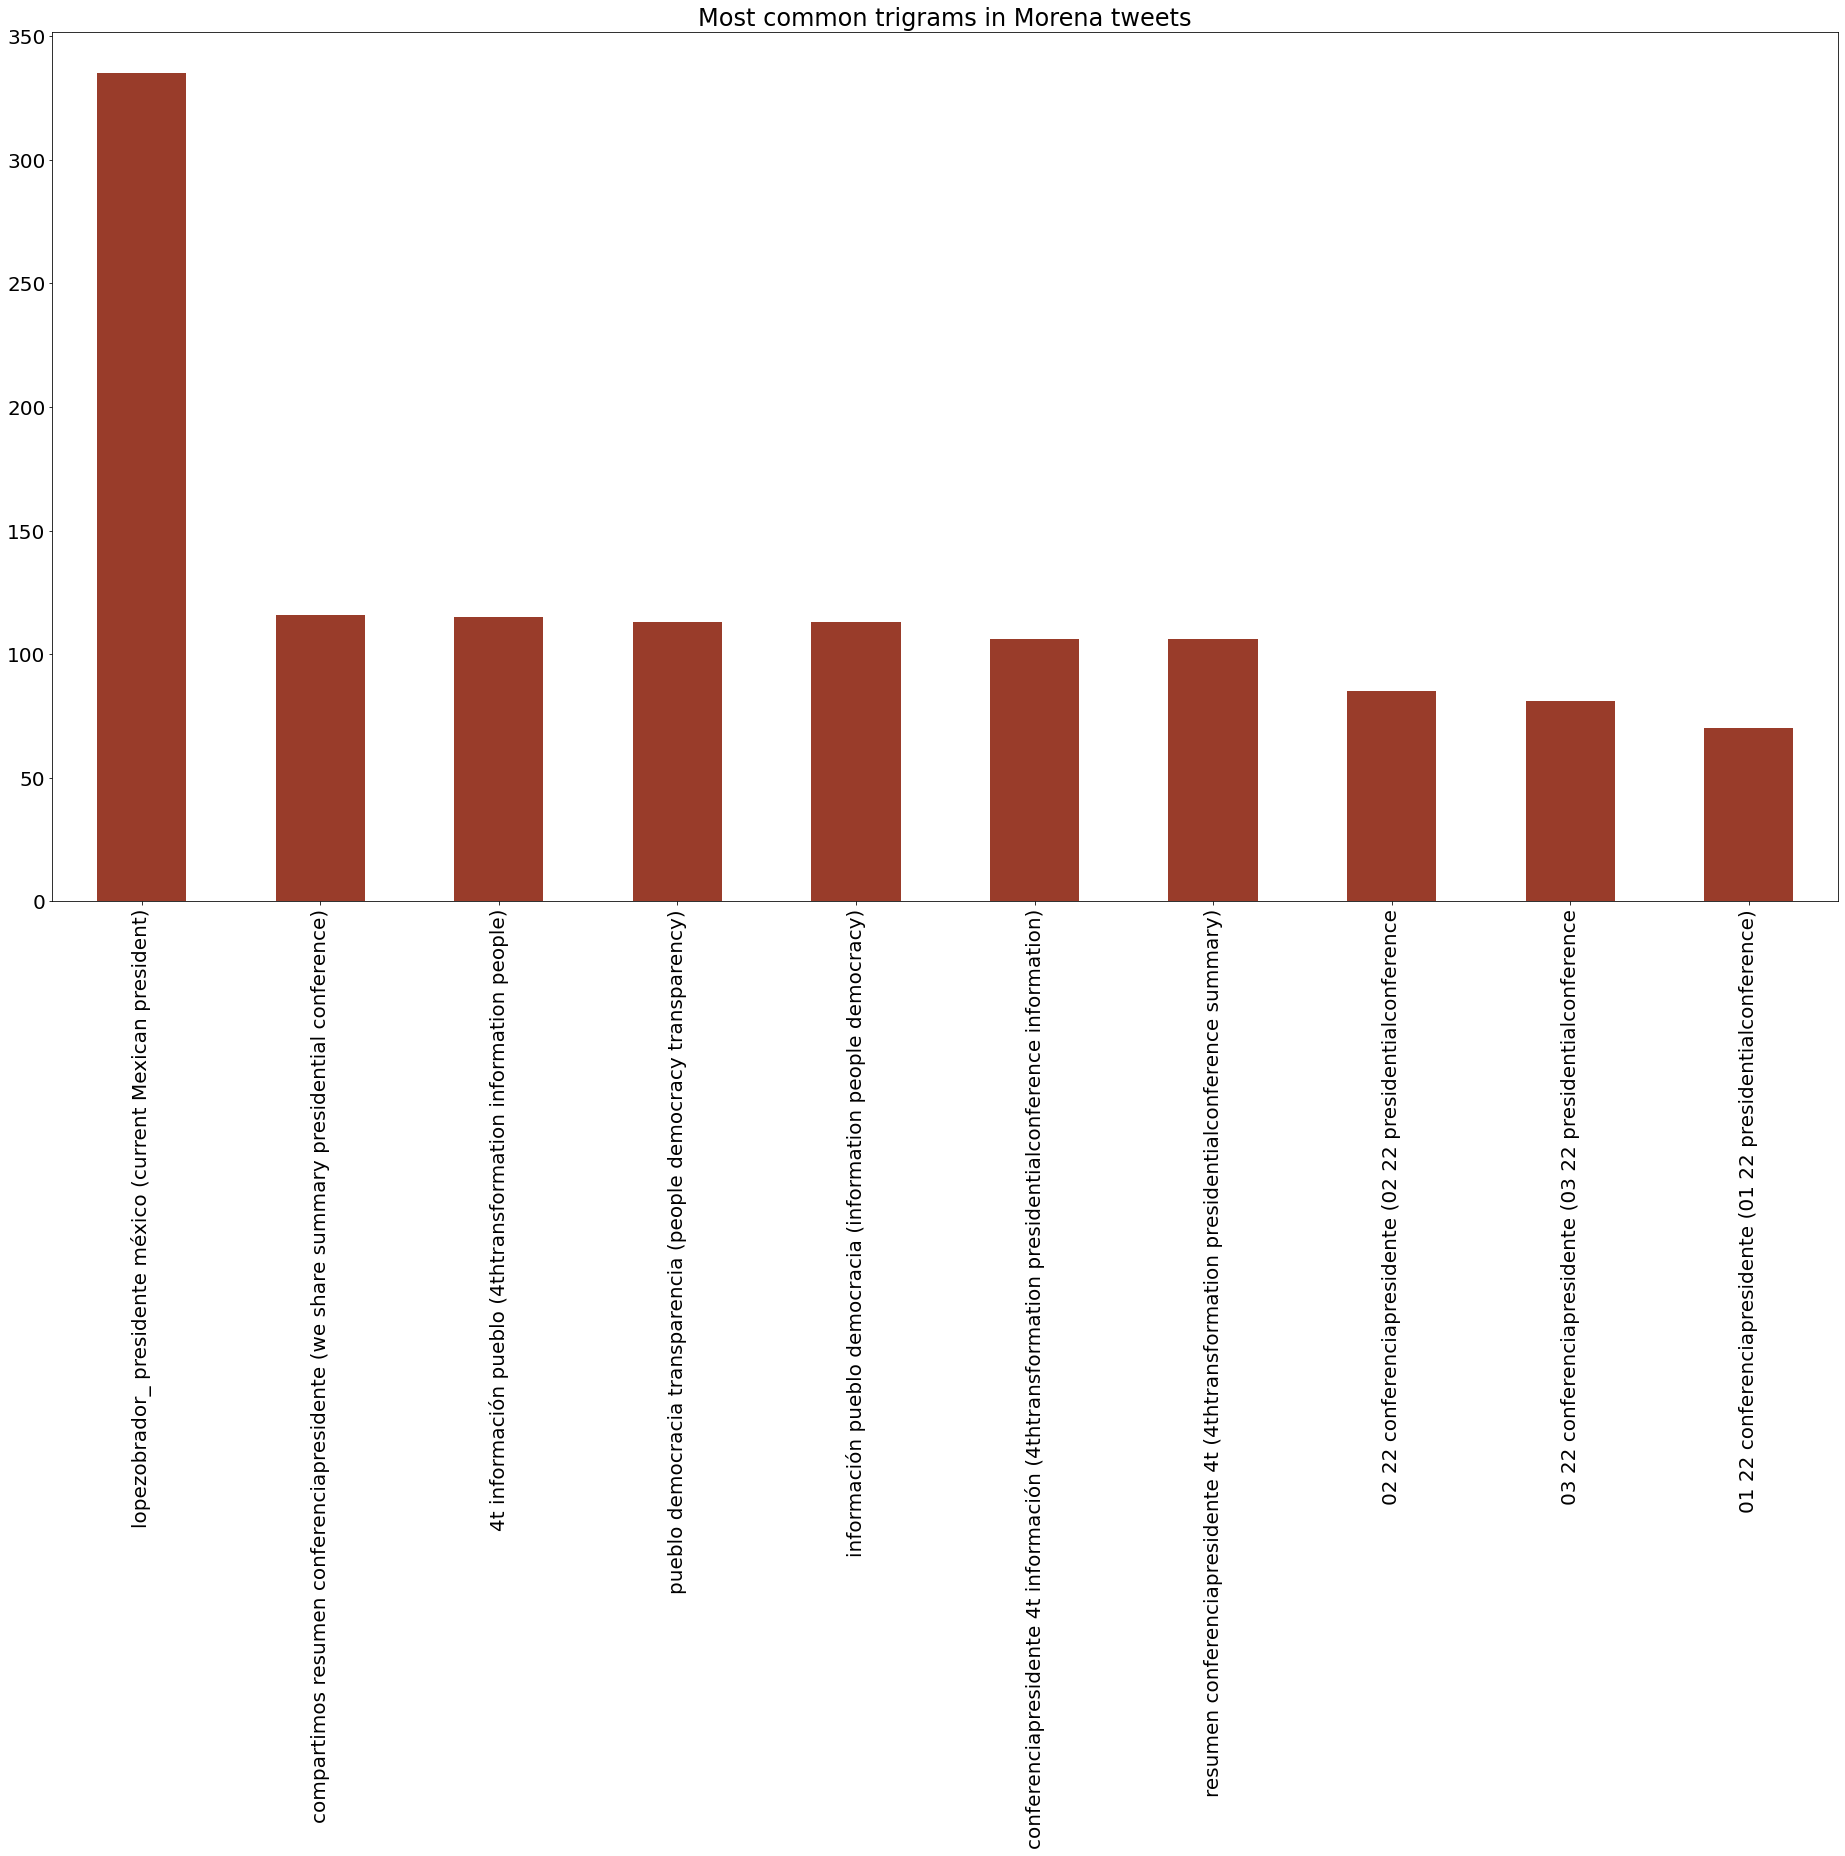

In [ ]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in Morena tweets")
mrn_trigram_plot.plot.bar(color='#993C2A');

## N-grams Without Party and Politican Names

### 10 Most Common Unigrams Without Party and Politician Names

In [127]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into unigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common unigrams.
cvec_uni = CountVectorizer(ngram_range=(1, 1), stop_words=frozenset(spanish_politics), lowercase=True)

pan_uni_tweets = cvec_uni.fit_transform(pan_df['tweet'])

pan_uni_tweets_df = pd.DataFrame(data=pan_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pan_most_common_unigrams = pan_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_unigrams

méxico          502
gobierno        399
familias        322
país            280
junio           190
salud           160
diputadospan    159
resultados      156
mexicanos       146
rumbo           142
dtype: int64

In [128]:
pan_unigram_plot_sw = pan_most_common_unigrams.copy()
pan_unigram_plot_sw.index = [
    'méxico', 
    'gobierno (government)',
    'familias (families)',
    'país (country)', 
    'junio (june)', 
    'salud (health)', 
    'diputadospan (PAN representatives)',
    'resultados (results)', 
    'mexicanos (Mexicans)', 
    'rumbo (course)'
]

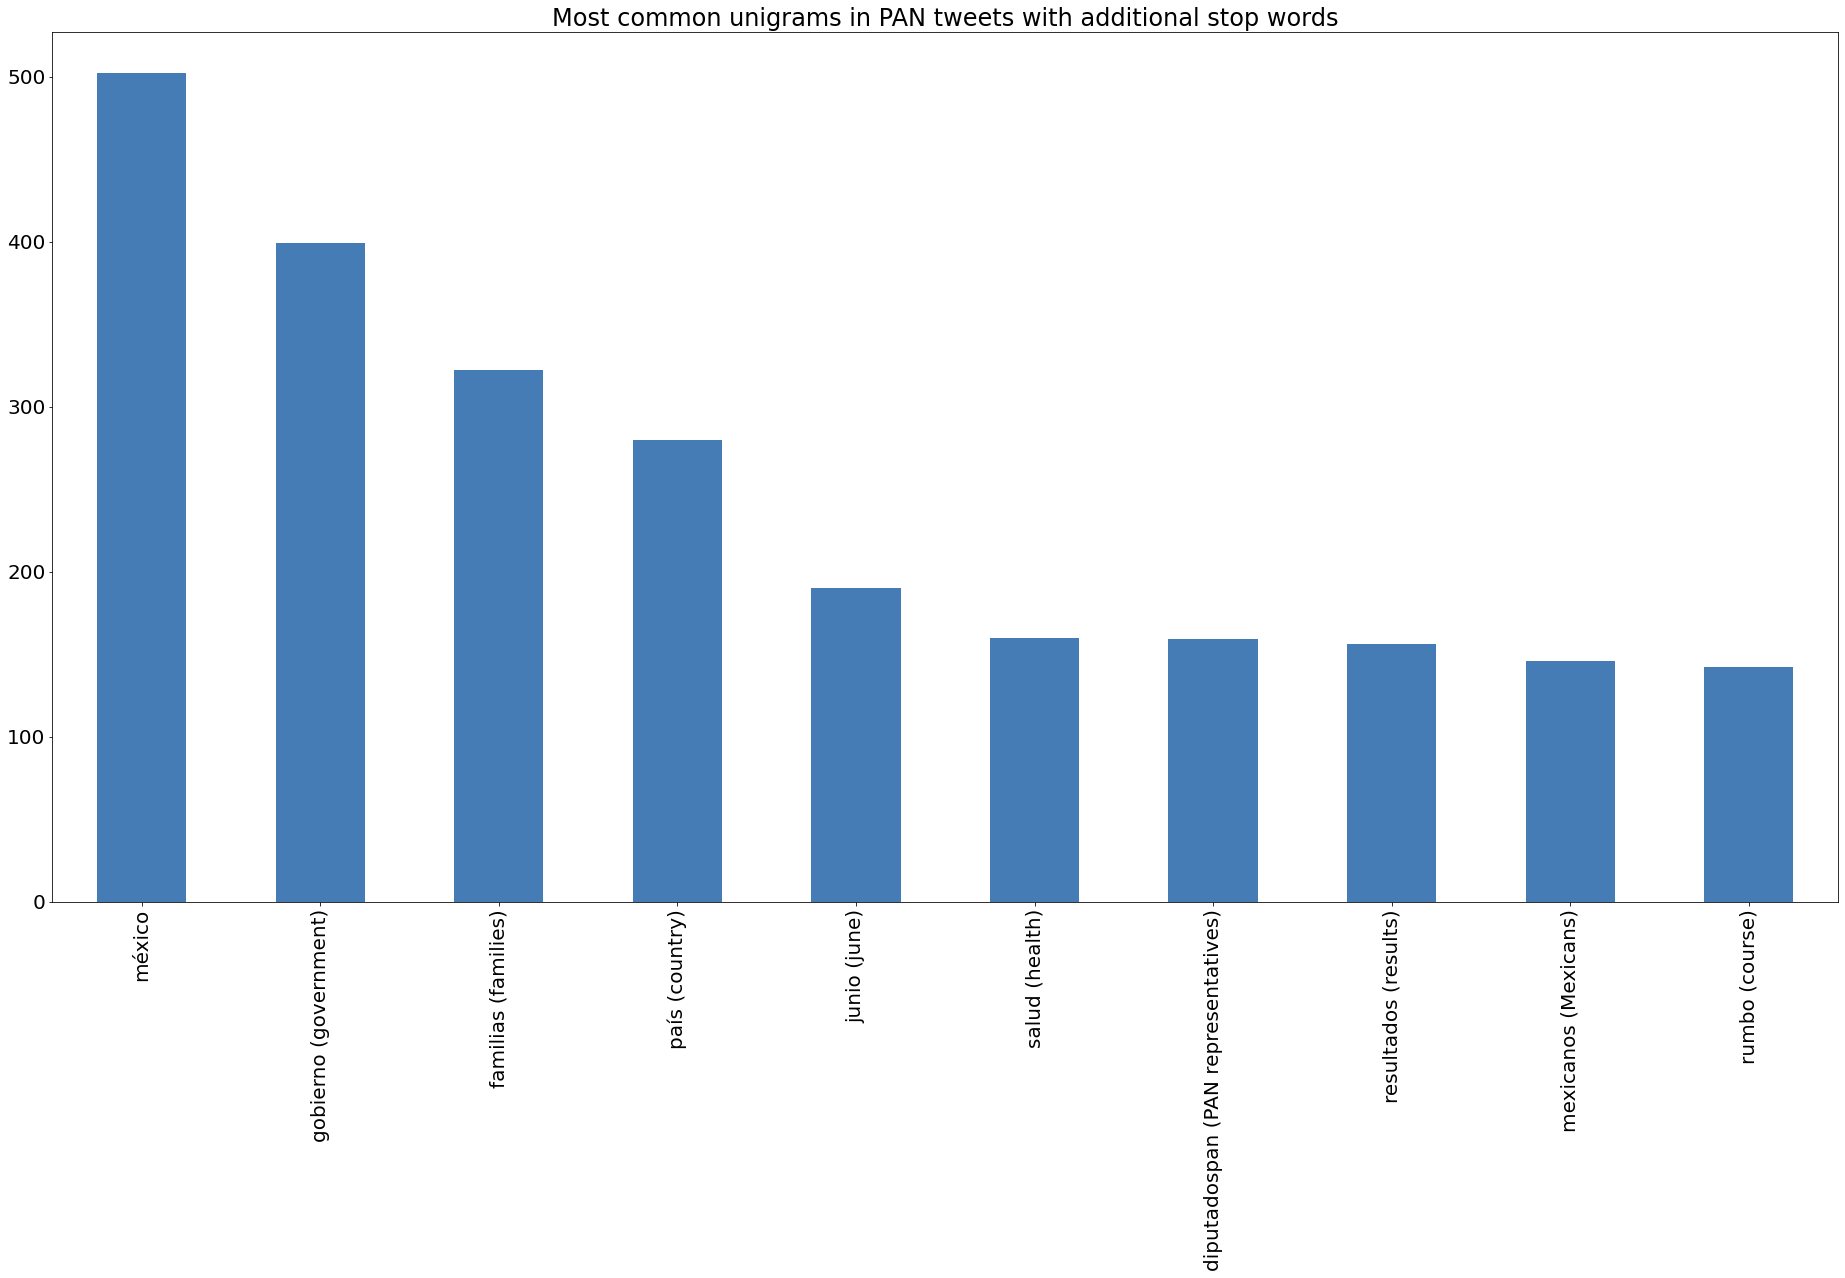

In [129]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PAN tweets with additional stop words")
pan_unigram_plot_sw.plot.bar(color = '#467CB6');

In [130]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common unigrams.

pri_uni_tweets = cvec_uni.fit_transform(pri_df['tweet'])

pri_uni_tweets_df = pd.DataFrame(data=pri_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pri_most_common_unigrams = pri_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_unigrams

méxico        574
familias      294
junio         286
mujeres       280
ganar         235
mexicanos     221
gobierno      216
país          213
resultados    194
propuestas    178
dtype: int64

In [131]:
pri_unigram_plot_sw = pri_most_common_unigrams.copy()
pri_unigram_plot_sw.index = [
    'méxico', 
    'familias (families)',
    'junio (june)',
    'mujeres (women)', 
    'ganar (win)', 
    'mexicanos (Mexicans)', 
    'gobierno (government)',
    'país (country)', 
    'resultados (results)', 
    'propuestas (proposals)'
]

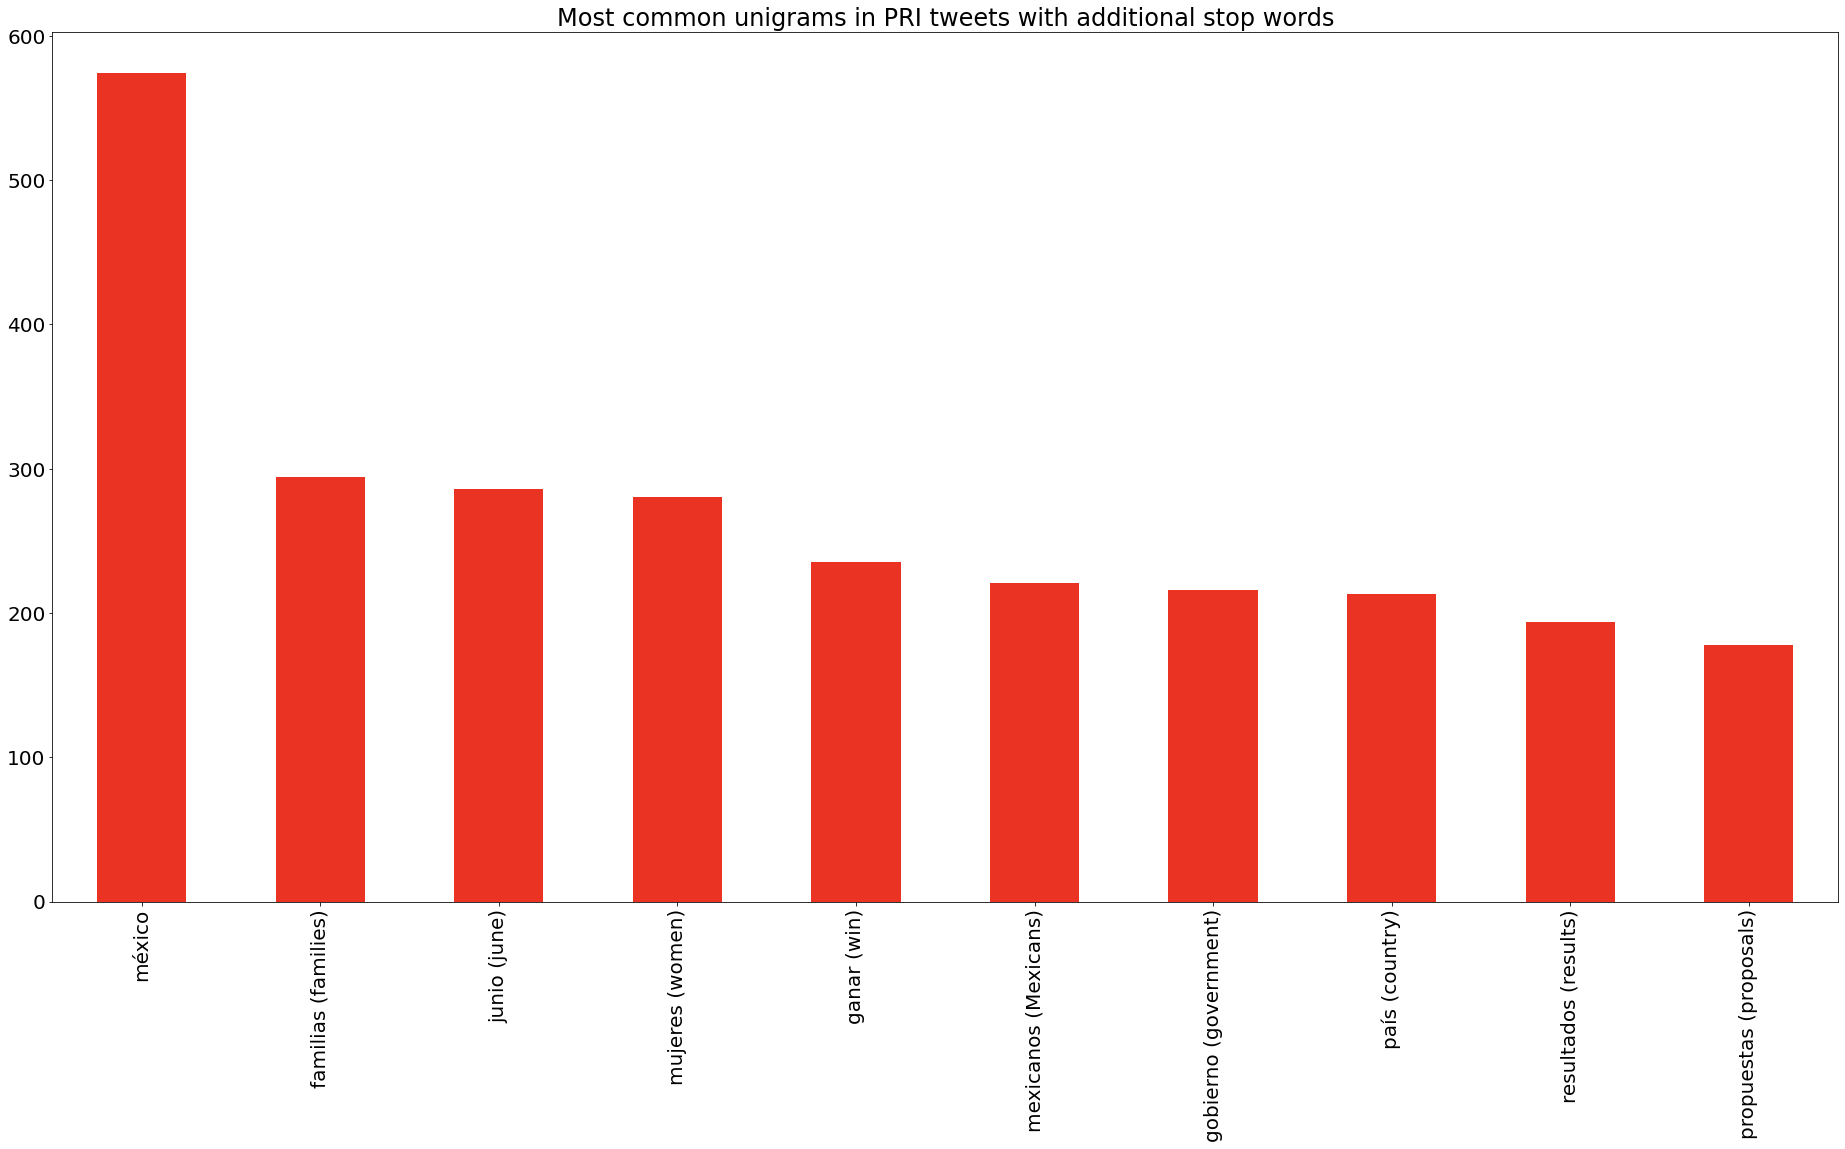

In [132]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PRI tweets with additional stop words")
pri_unigram_plot_sw.plot.bar(color = '#EA3323');

In [133]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common unigrams.

prd_uni_tweets = cvec_uni.fit_transform(prd_df['tweet'])

prd_uni_tweets_df = pd.DataFrame(data=prd_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

prd_most_common_unigrams = prd_uni_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_unigrams

méxico                      397
gobierno                    211
mujeres                     183
evillegasv                  130
junio                       130
somosprd                    129
educación                   129
escuelasdetiempocompleto    127
futuro                      127
violencia                   117
dtype: int64

In [134]:
prd_unigram_plot_sw = prd_most_common_unigrams.copy()
prd_unigram_plot_sw.index = [
    'méxico', 
    'gobierno (government)',
    'mujeres (women)',
    'evillegasv', 
    'junio (June)', 
    'somosprd (weareprd)', 
    'educación (education)',
    'escuelasdetiempocompleto (fulltimeschools)', 
    'futuro (future)', 
    'violencia (violence)'
]

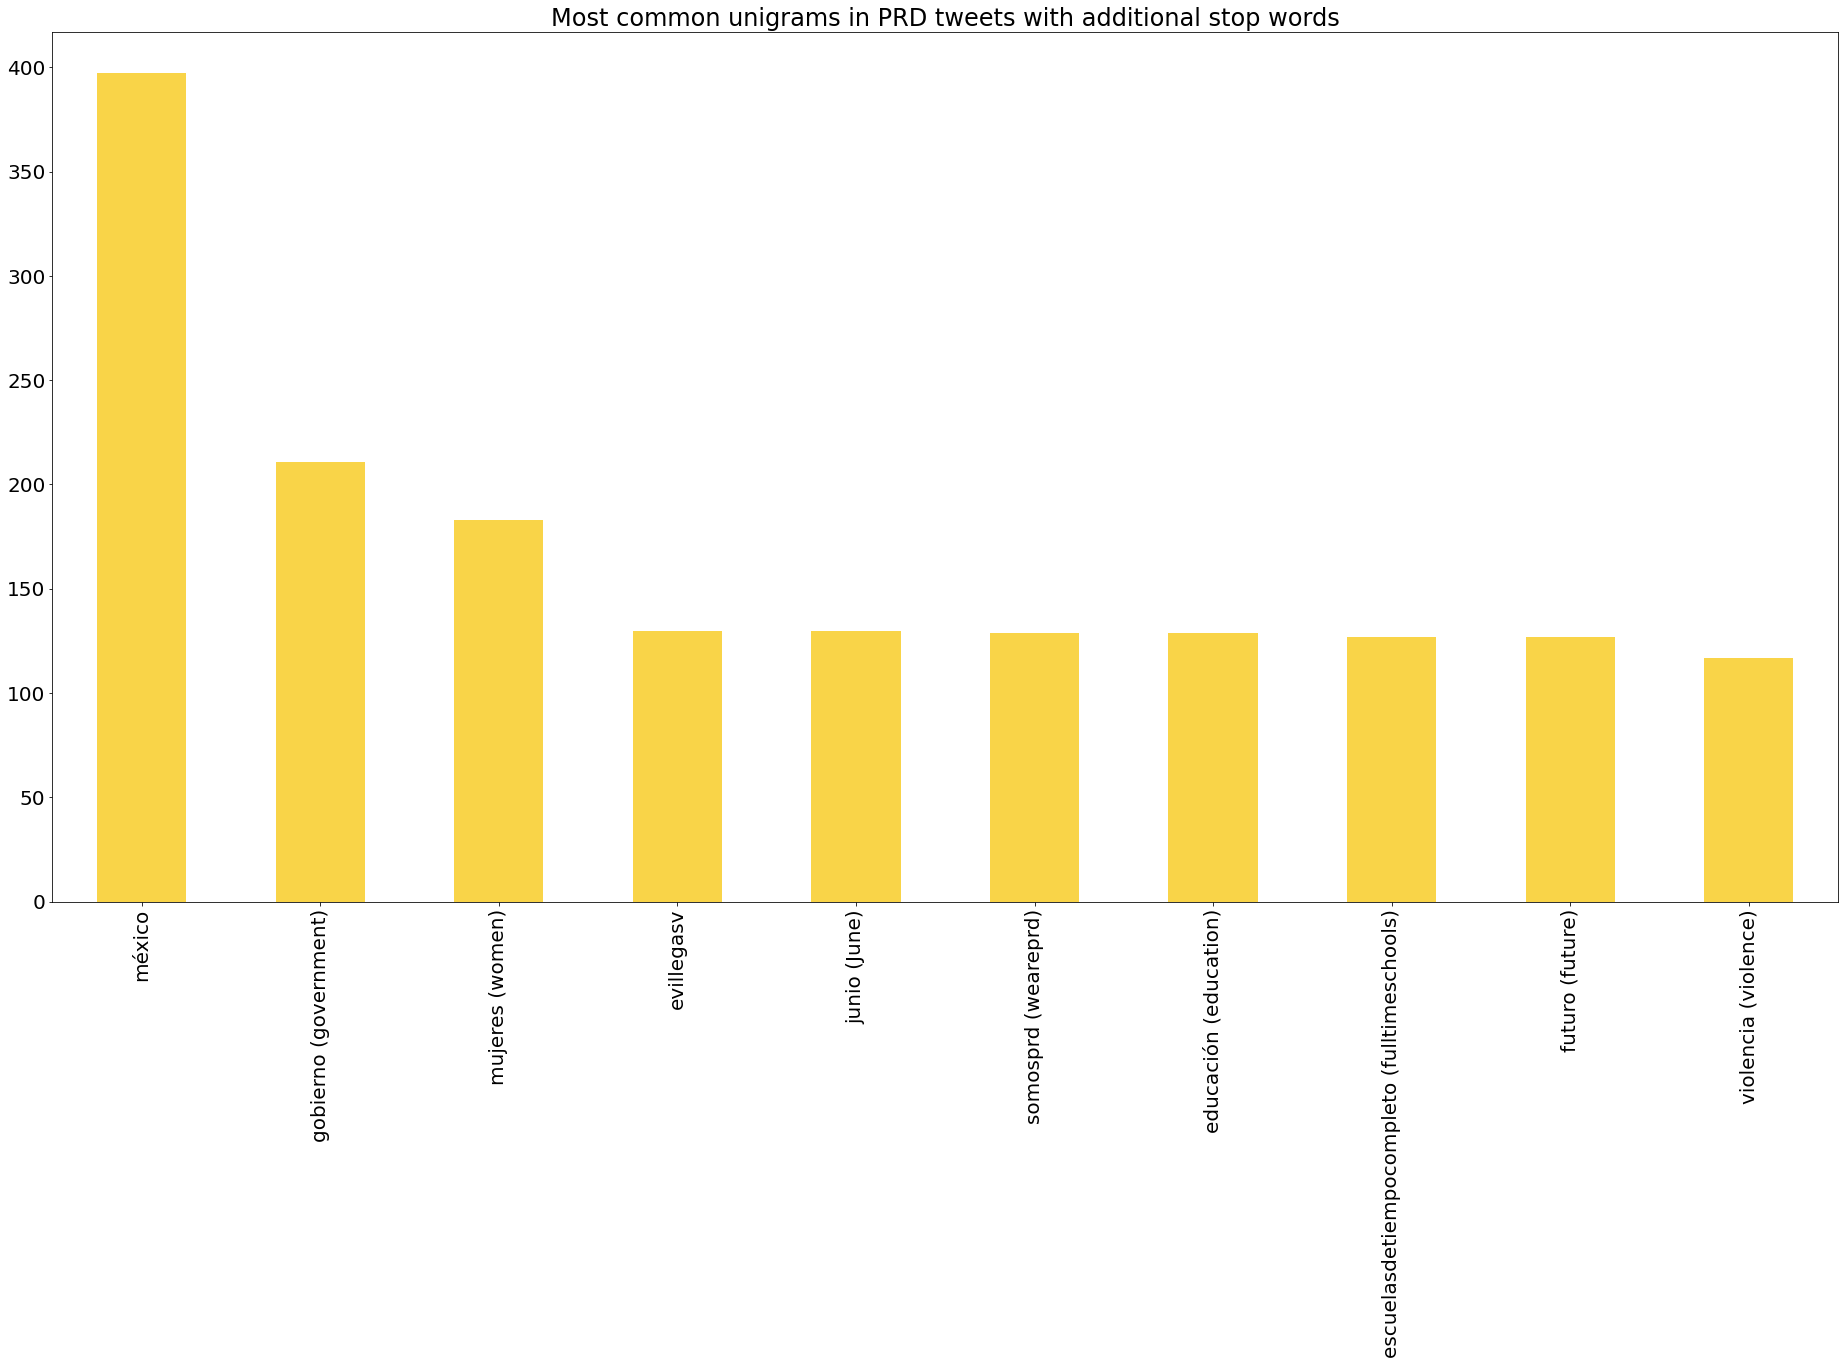

In [135]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PRD tweets with additional stop words")
prd_unigram_plot_sw.plot.bar(color = '#F9D448');

In [136]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common unigrams.

pv_uni_tweets = cvec_uni.fit_transform(pv_df['tweet'])

pv_uni_tweets_df = pd.DataFrame(data=pv_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pv_most_common_unigrams = pv_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_unigrams

país              311
méxico            259
ambiente          245
salud             182
méxicoverde       168
méxicounido       155
covid19           140
mexicanos         129
vida              117
verdesenadomex    114
dtype: int64

In [137]:
pv_unigram_plot_sw = pv_most_common_unigrams.copy()
pv_unigram_plot_sw.index = [
    'país (country)', 
    'méxico',
    'ambiente (environment)',
    'salud (health)', 
    'méxicoverde (greenmexico)', 
    'méxicounido (unitedmexico)', 
    'covid19',
    'mexicanos (Mexicans)', 
    'vida (life)', 
    'verdesenadomex (greensenatemex)'
]

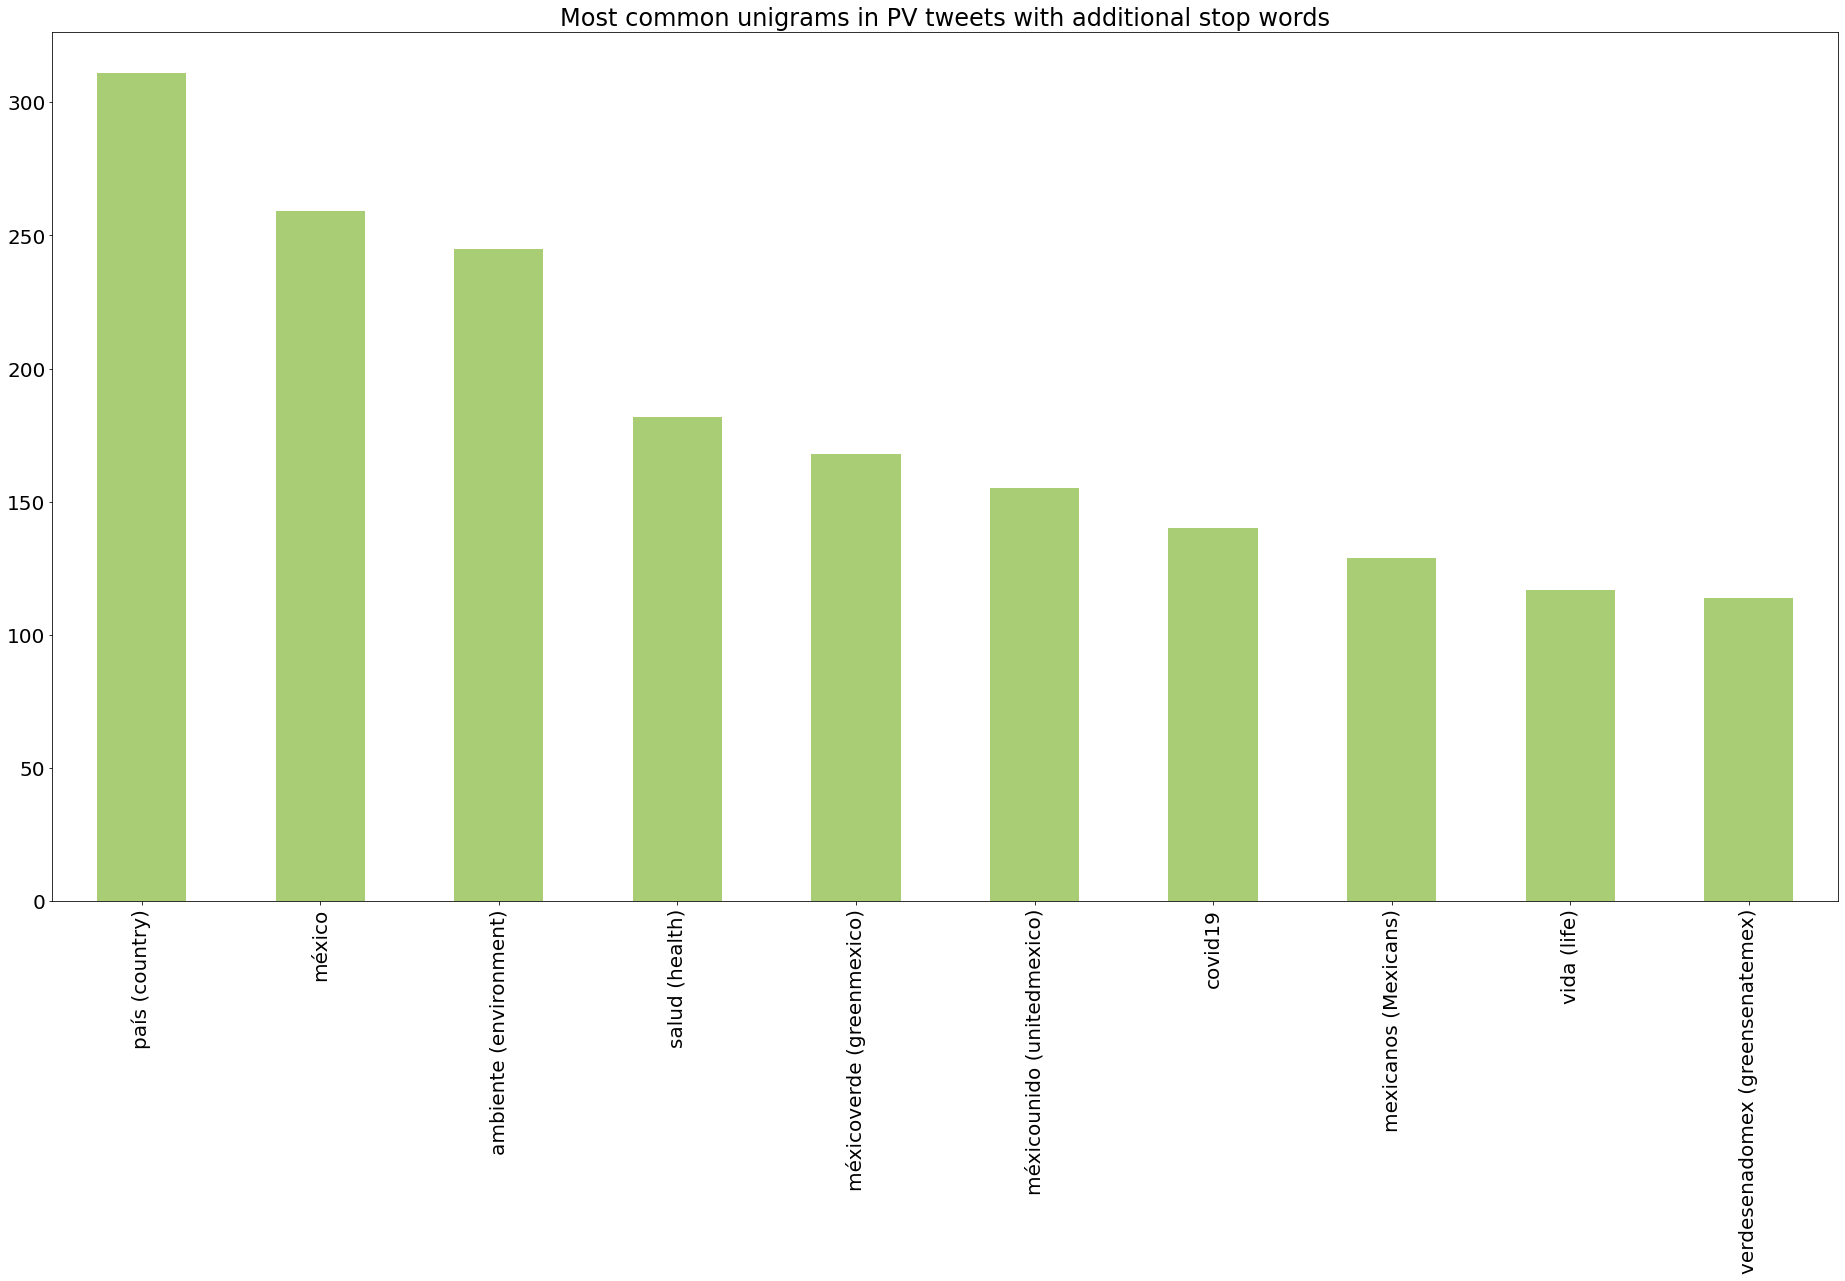

In [138]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in PV tweets with additional stop words")
pv_unigram_plot_sw.plot.bar(color = '#A9CD74');

In [139]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common unigrams.

mc_uni_tweets = cvec_uni.fit_transform(mc_df['tweet'])

mc_uni_tweets_df = pd.DataFrame(data=mc_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mc_most_common_unigrams = mc_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_unigrams

futuro                  307
gobierno                227
méxico                  215
delríopresopolítico     175
mujeres                 159
palabrasenmovimiento    155
país                    144
ambiente                131
derechos                121
personas                118
dtype: int64

In [140]:
mc_unigram_plot_sw = mc_most_common_unigrams.copy()
mc_unigram_plot_sw.index = [
    'futuro (future)', 
    'gobierno (government)',
    'méxico',
    'delríopresopolítico (delriopoliticalprisoner)', 
    'mujeres (women)', 
    'palabrasenmovimiento (wordsinaction)', 
    'país (country)',
    'ambiente (environment)', 
    'derechos (rights)', 
    'personas (persons)'
]

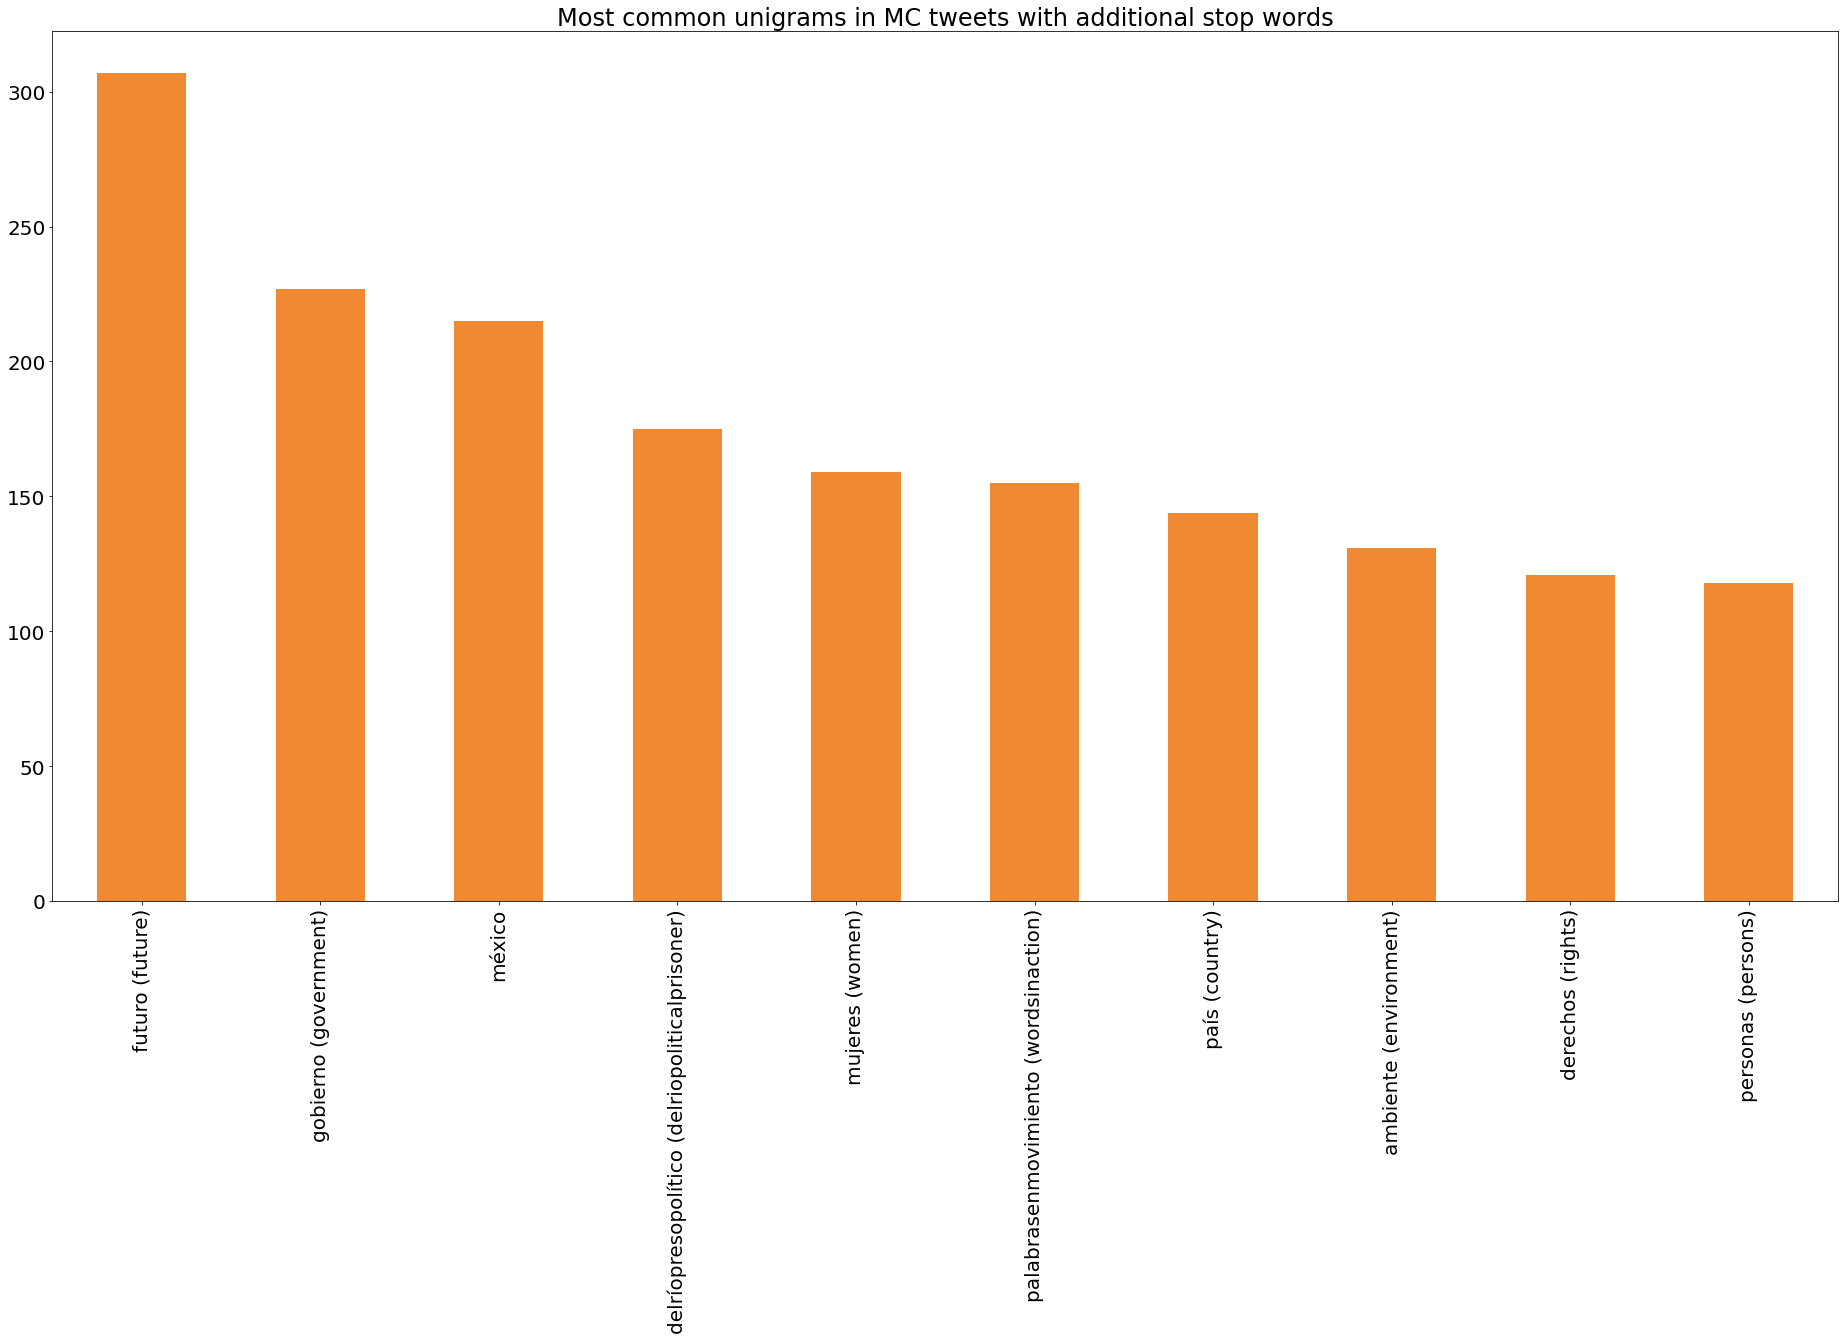

In [141]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in MC tweets with additional stop words")
mc_unigram_plot_sw.plot.bar(color = '#EF8A33');

In [142]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common unigrams.

mrn_uni_tweets = cvec_uni.fit_transform(mrn_df['tweet'])

mrn_uni_tweets_df = pd.DataFrame(data=mrn_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mrn_most_common_unigrams = mrn_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_unigrams

pueblo            749
méxico            748
4t                411
transformación    267
democracia        240
país              218
francamente       197
gobierno          185
esperanza         167
compartimos       162
dtype: int64

In [143]:
mrn_unigram_plot_sw = mrn_most_common_unigrams.copy()
mrn_unigram_plot_sw.index = [
    'pueblo (people)', 
    'méxico',
    '4t (4thtransformation)',
    'transformación (transformation)', 
    'democracia (democracy)', 
    'país (country)', 
    'francamente (frankly)',
    'gobierno (government)', 
    'esperanza (hope)', 
    'compartimos (we share)'
]

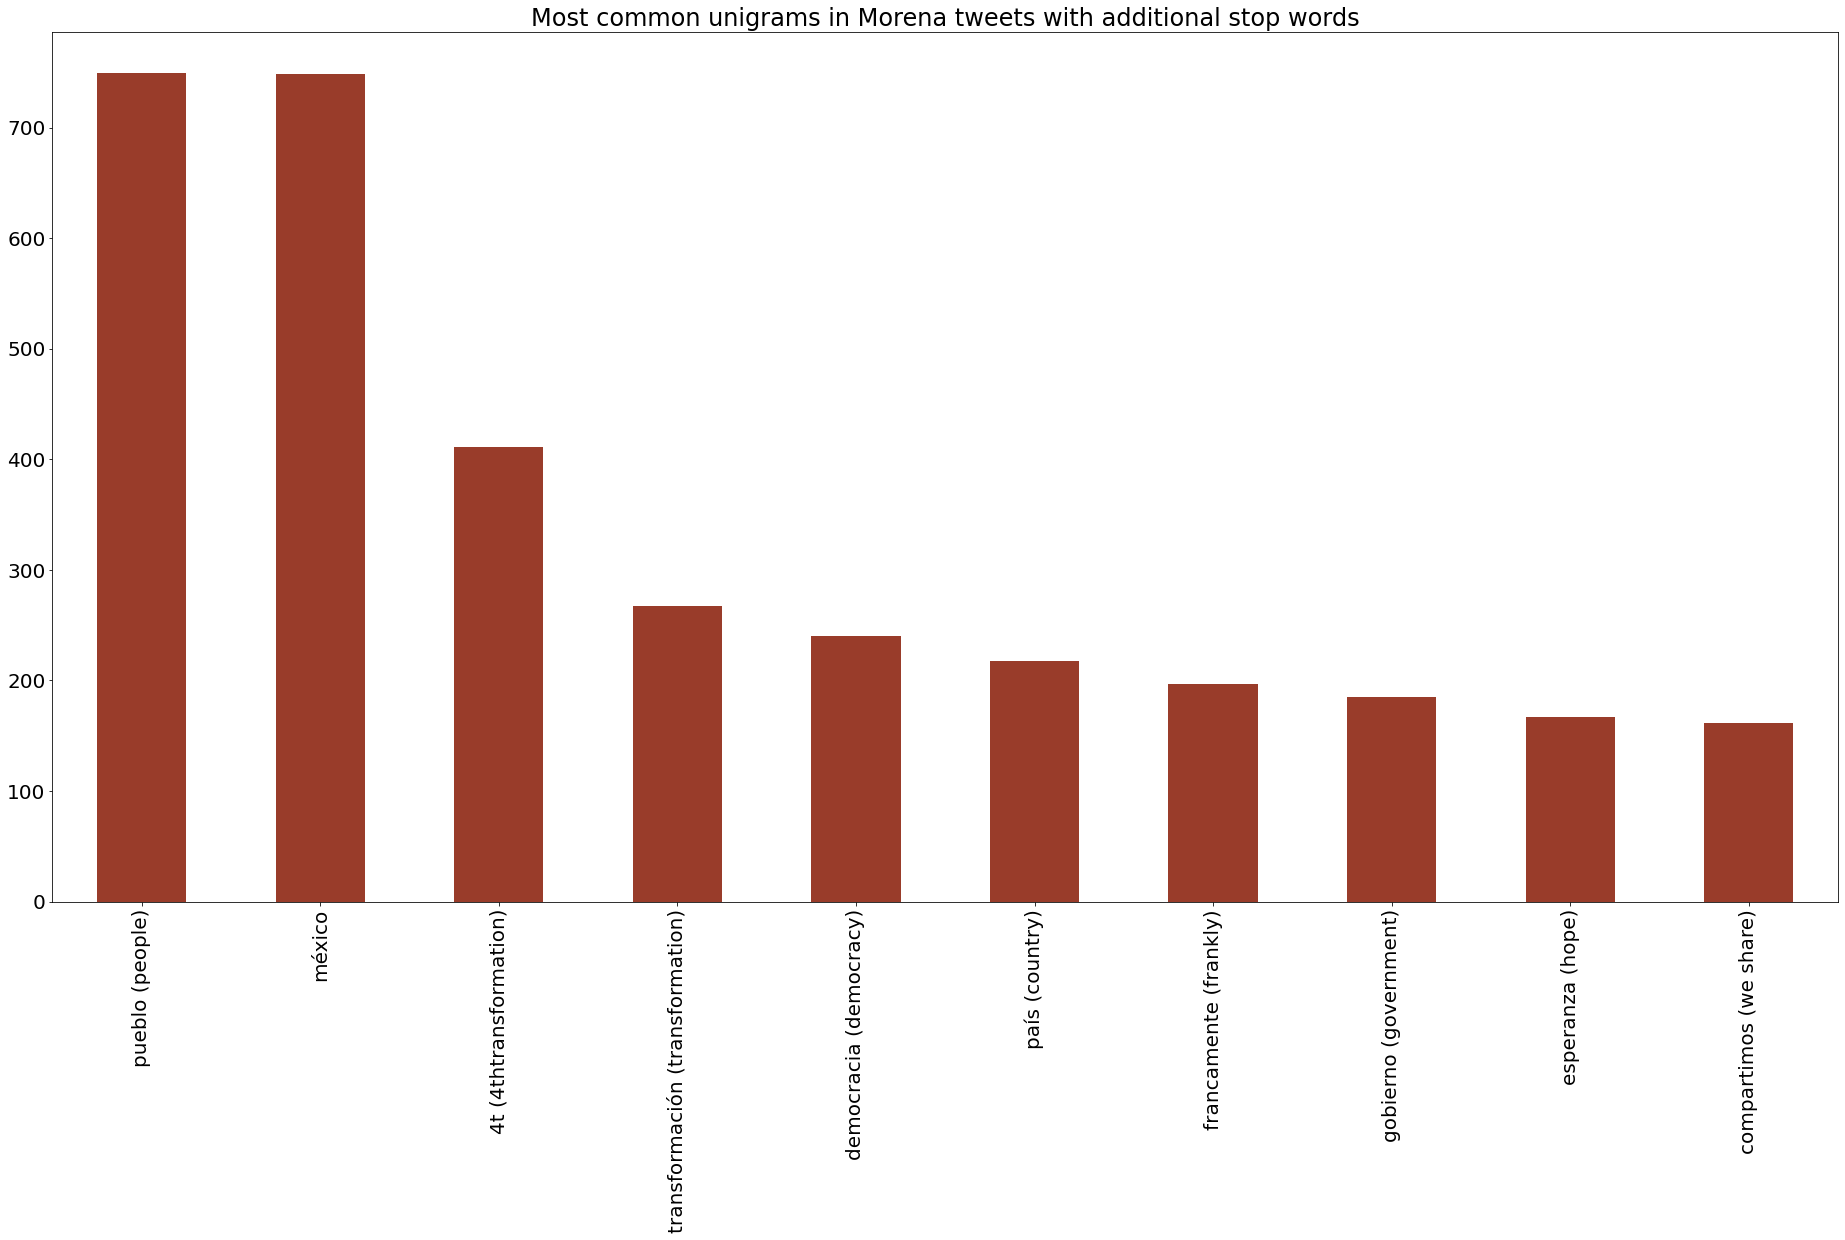

In [144]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common unigrams in Morena tweets with additional stop words")
mrn_unigram_plot_sw.plot.bar(color = '#993C2A');

### 10 Most Common Bigrams Without Party and Politician Names

In [145]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into bigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common bigrams.
cvec_bi = CountVectorizer(ngram_range=(2, 2), stop_words=frozenset(spanish_politics), lowercase=True)

pan_bi_tweets = cvec_bi.fit_transform(pan_df['tweet'])

pan_bi_tweets_df = pd.DataFrame(data=pan_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pan_most_common_bigrams = pan_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_bigrams

gobierno federal      82
familias mexicanas    72
energías limpias      70
descanse paz          53
cambiar rumbo         43
seres queridos        42
cámara diputados      42
rumbo méxico          40
méxico necesita       39
rumbo país            37
dtype: int64

In [146]:
pan_bigram_plot_sw = pan_most_common_bigrams.copy()
pan_bigram_plot_sw.index = [
    'gobierno federal (federal government)',
    'familias mexicanas (mexican families)',
    'energías limpias (mexican families)',
    'descanse paz  (rest peace)',
    'cambiar rumbo (change course)',
    'seres queridos (loved ones)',
    'cámara diputados (representatives chamber)',
    'rumbo méxico (Mexico course)',
    'méxico necesita (Mexico needs)',
    'rumbo país (country course)'
]

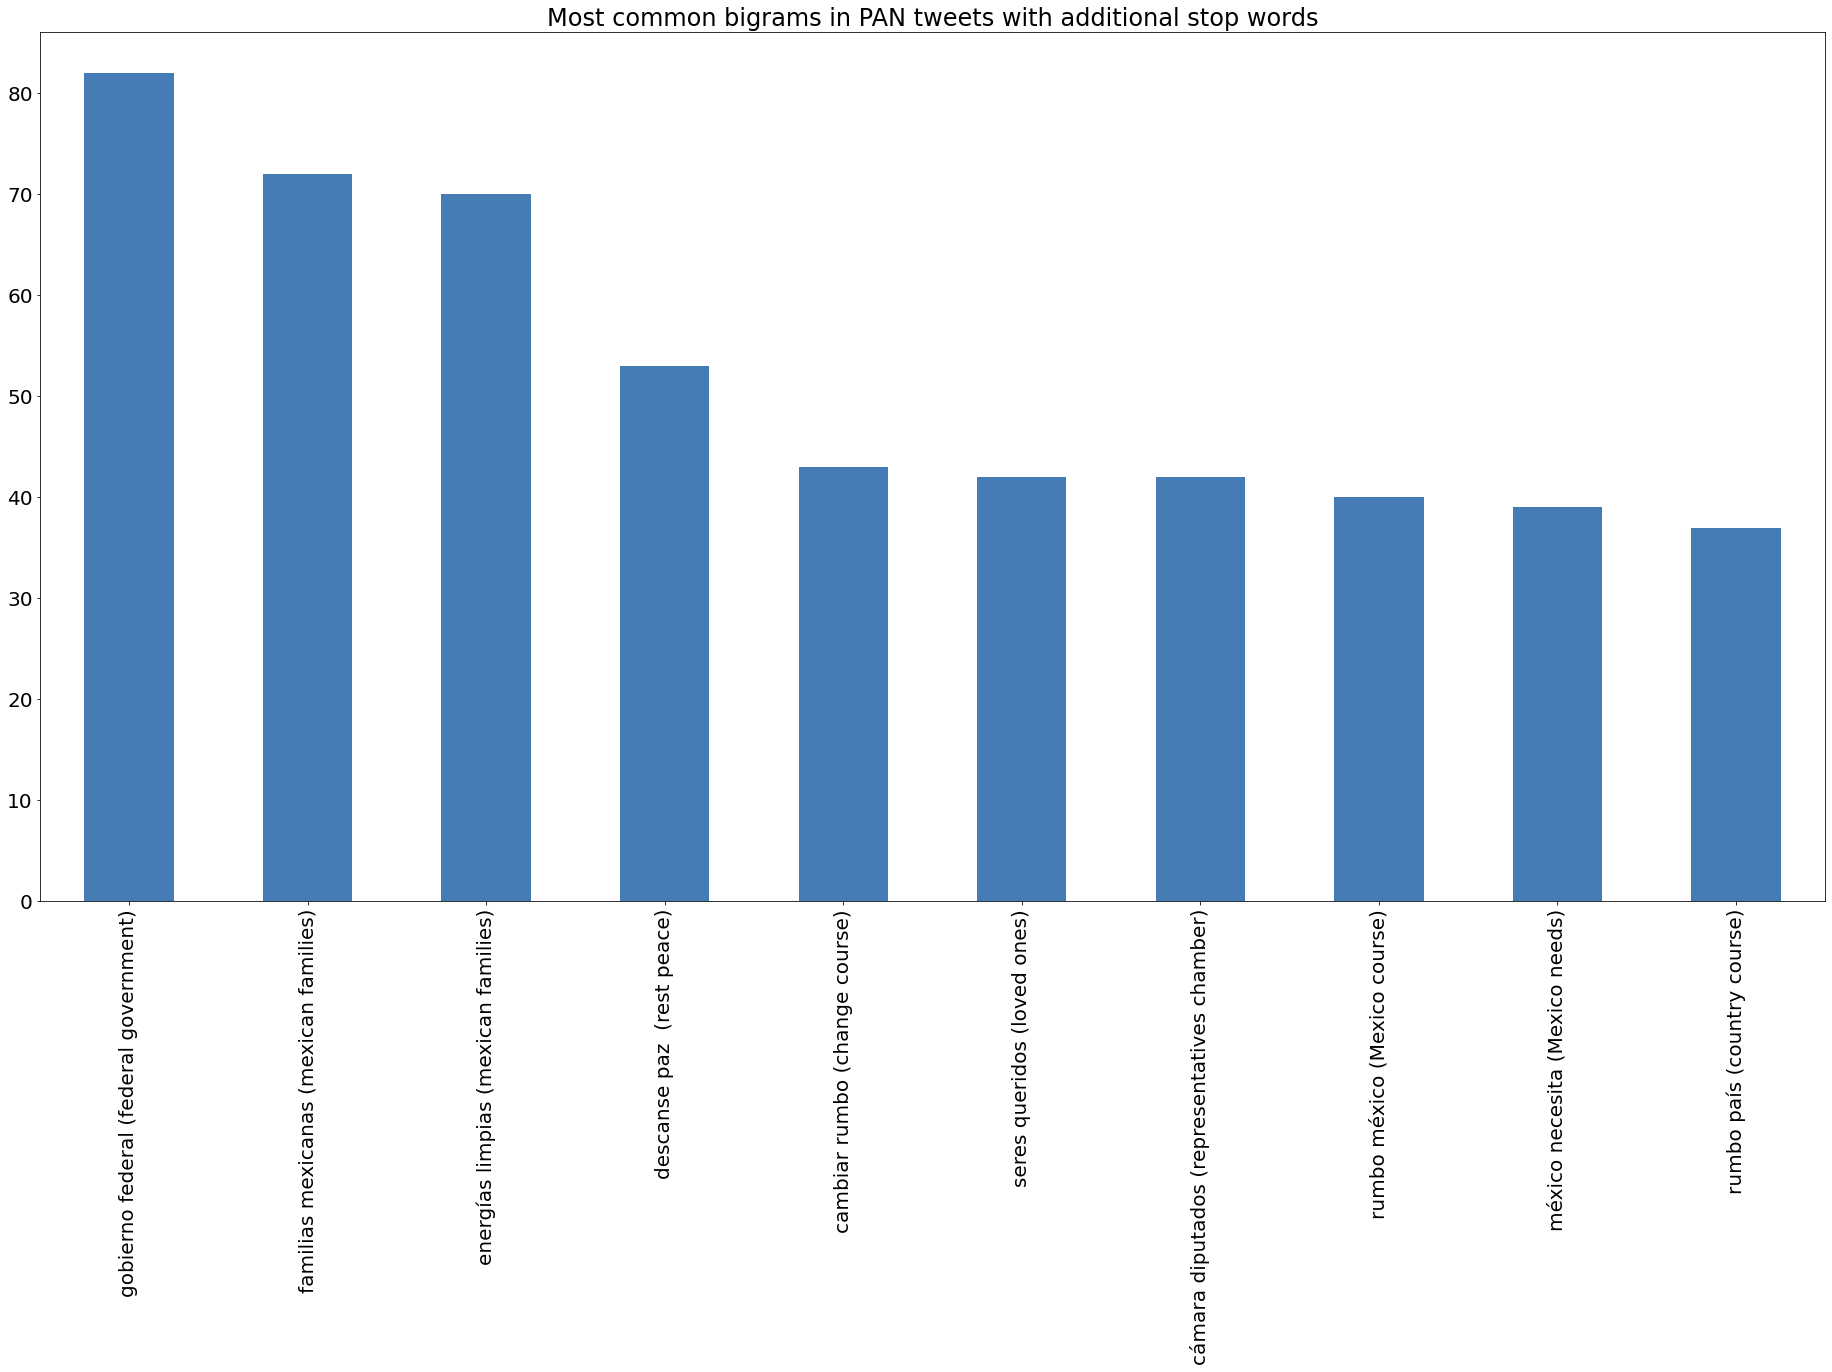

In [147]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PAN tweets with additional stop words")
pan_bigram_plot_sw.plot.bar(color='#467CB6');

In [148]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common bigrams.

pri_bi_tweets = cvec_bi.fit_transform(pri_df['tweet'])

pri_bi_tweets_df = pd.DataFrame(data=pri_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pri_most_common_bigrams = pri_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_bigrams

cámara diputados         59
diputados federales      55
mujeres hombres          52
candidatas candidatos    51
familias mexicanas       51
ganar junio              48
invitamos seguir         39
diputadas diputados      39
junio vota               37
gobierno federal         36
dtype: int64

In [149]:
pri_bigram_plot_sw = pri_most_common_bigrams.copy()
pri_bigram_plot_sw.index = [
    'cámara diputados (representatives chamber)',
    'diputados federales (federal representatives)',
    'mujeres hombres (women men)',
    'candidatas candidatos (female and male candidates)',
    'familias mexicanas (Mexican families)',
    'ganar junio (win june)',
    'invitamos seguir (we invite follow)',
    'diputadas diputados (female and male representatives)',
    'junio vota (june vote)',
    'gobierno federal (federal government)'
]

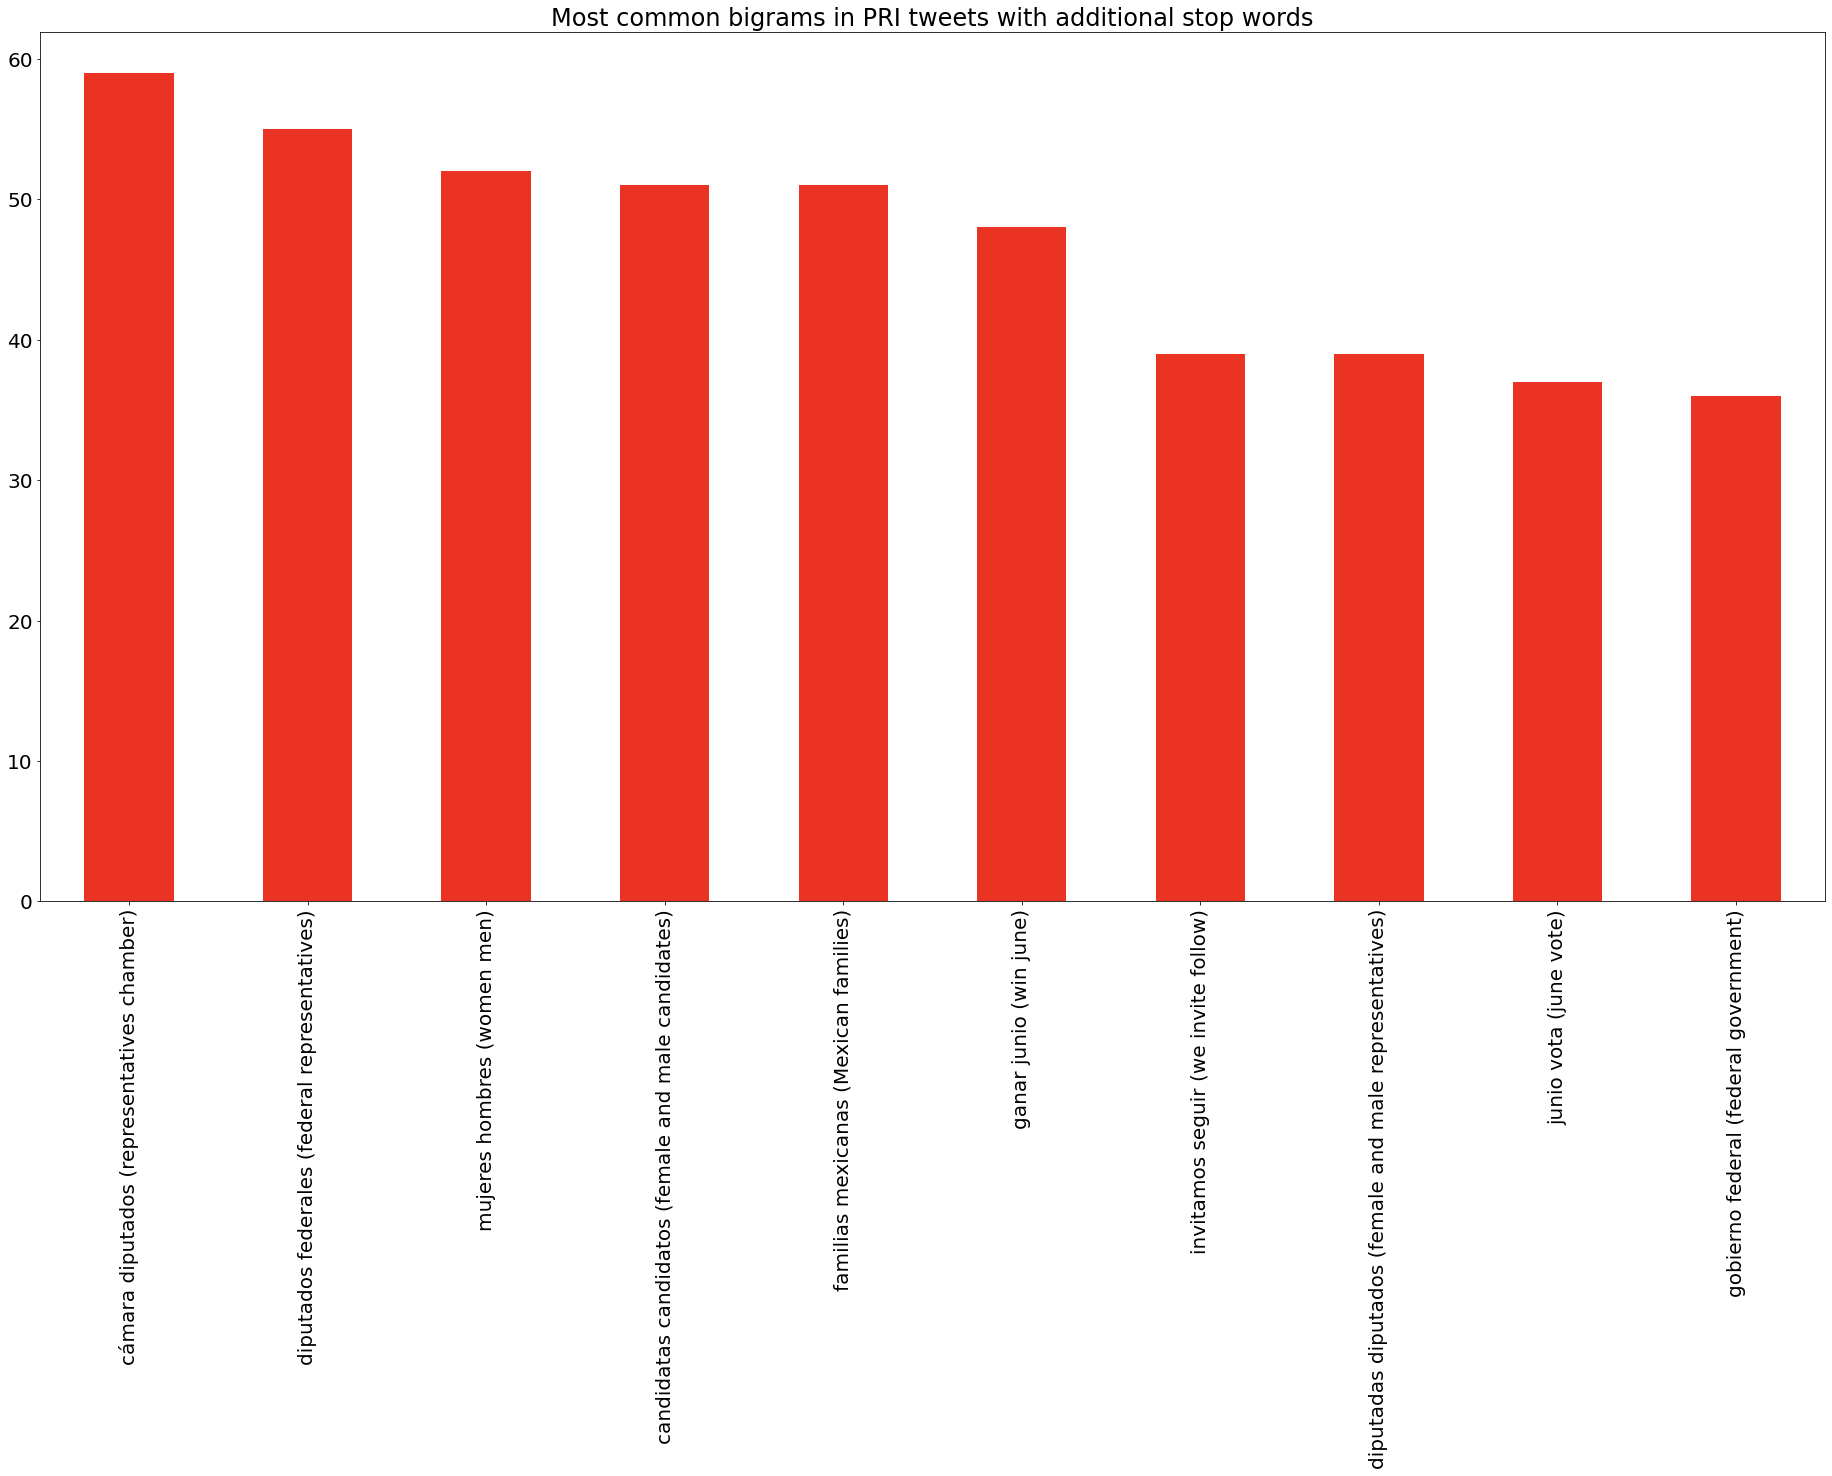

In [150]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PRI tweets with additional stop words")
pri_bigram_plot_sw.plot.bar(color='#EA3323');

In [151]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common bigrams.

prd_bi_tweets = cvec_bi.fit_transform(prd_df['tweet'])

prd_bi_tweets_df = pd.DataFrame(data=prd_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

prd_most_common_bigrams = prd_bi_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_bigrams

gobierno federal                     75
link boletín                         60
niñas niños                          53
delfina gómez                        52
juntas juntos                        42
33 años                              37
niega educación                      34
millones estudiantes                 34
programa escuelasdetiempocompleto    33
gómez dé                             33
dtype: int64

In [152]:
prd_bigram_plot_sw = prd_most_common_bigrams.copy()
prd_bigram_plot_sw.index = [
    'gobierno federal (federal government)',
    'link boletín (bulletin link)',
    'niñas niños (girls boys)',
    'delfina gómez (Public Education Minister)',
    'juntas juntos (together)',
    '33 años (33 years)',
    'niega educación (deny education)',
    'millones estudiantes (millions students)',
    'programa escuelasdetiempocompleto (fulltimeschools program)',
    'gómez dé (Public Education Minister give)'
]

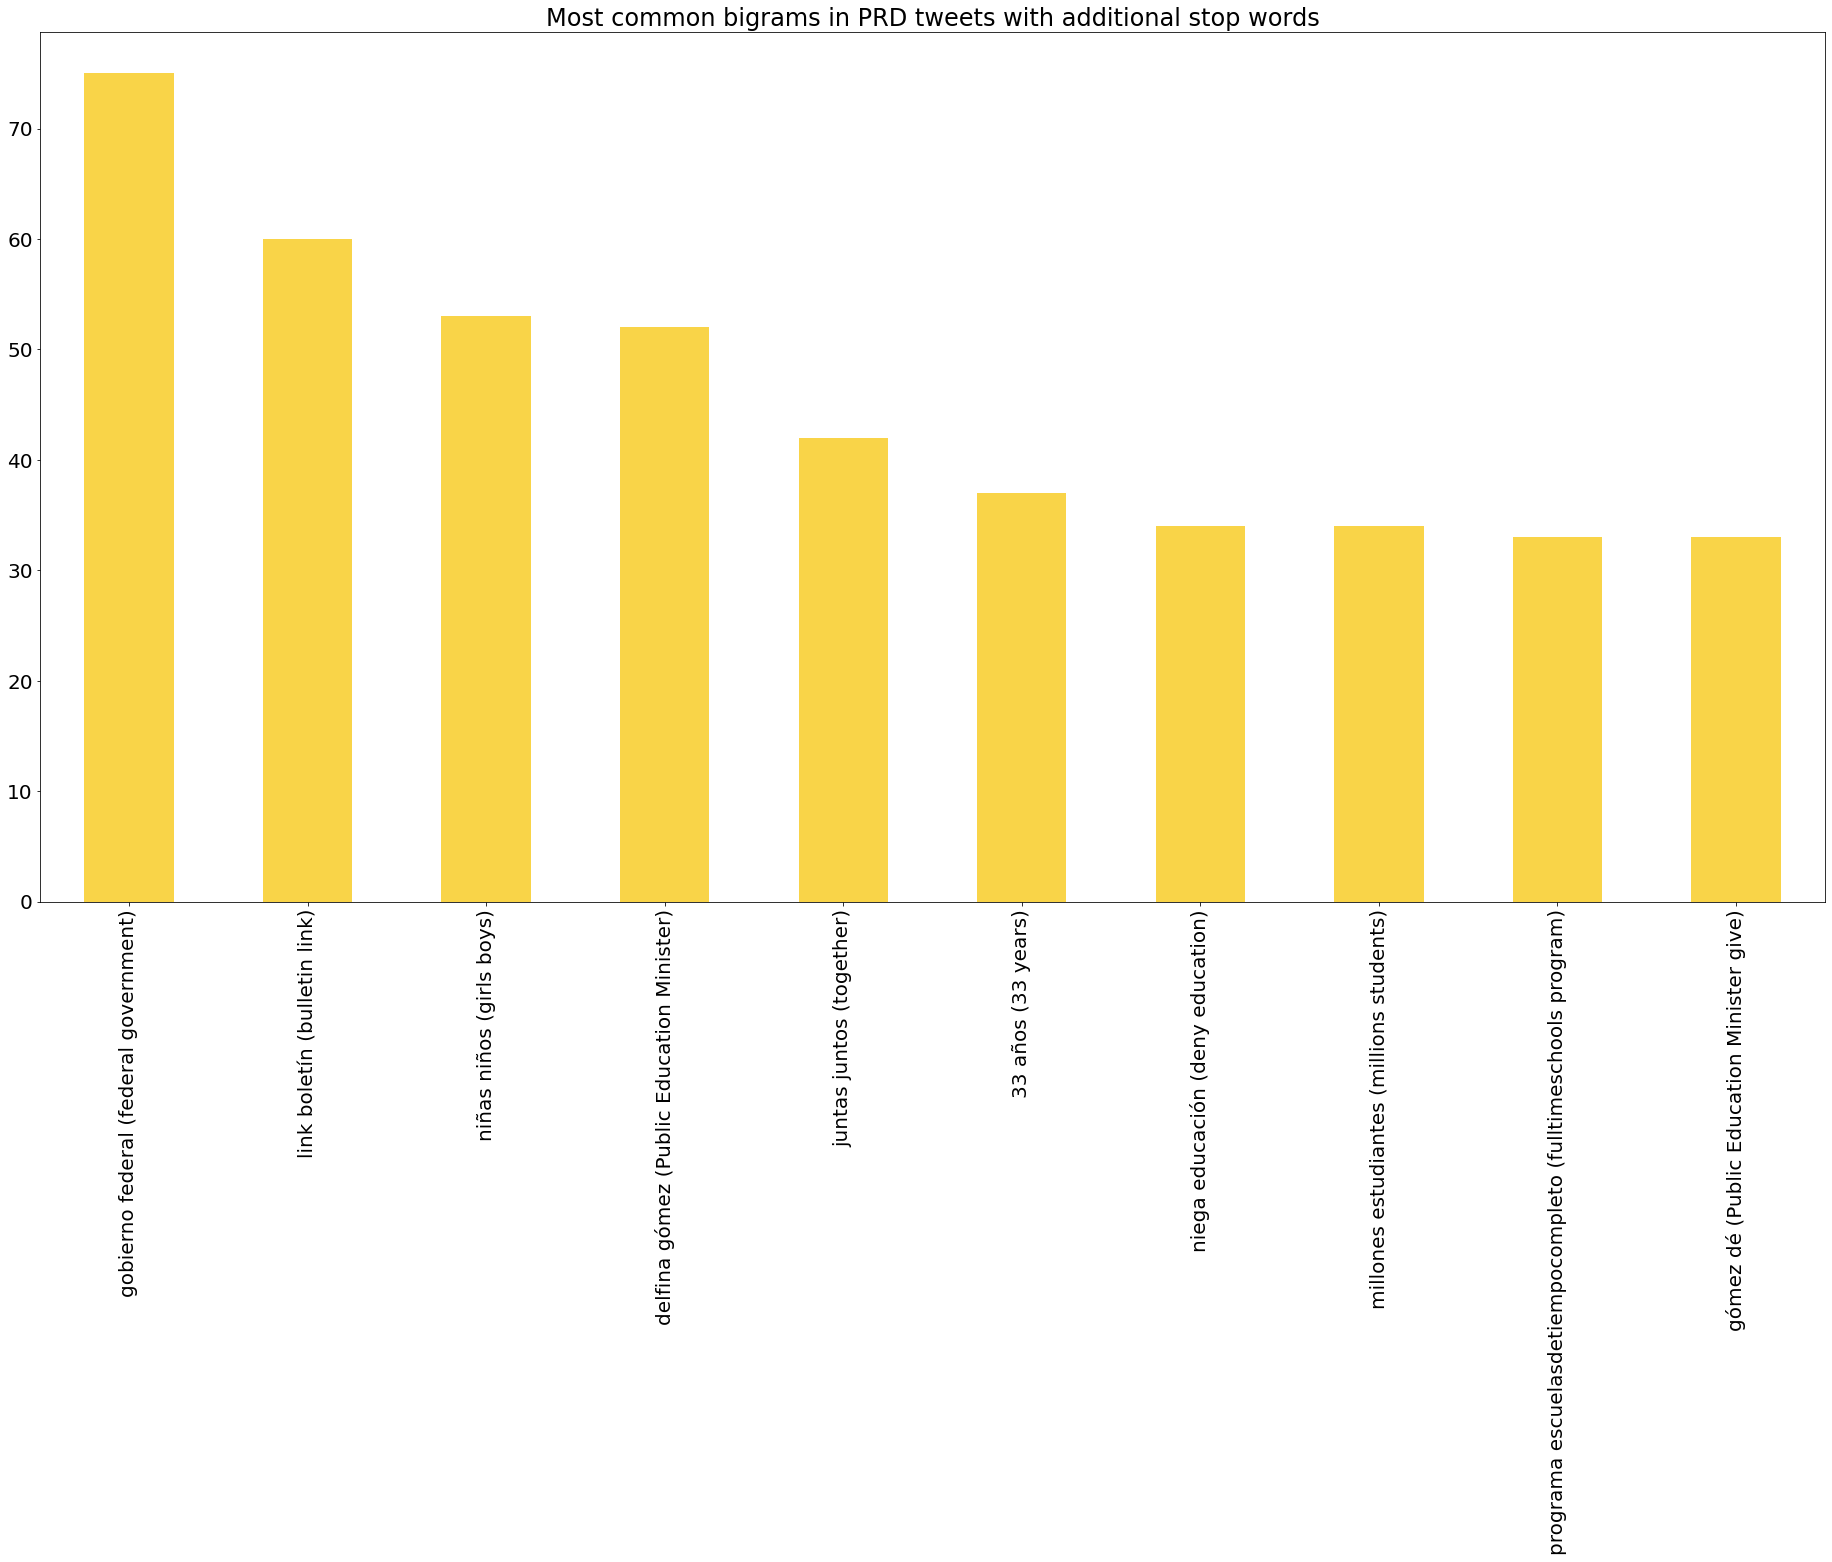

In [153]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PRD tweets with additional stop words")
prd_bigram_plot_sw.plot.bar(color='#F9D448');

In [154]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common bigrams.

pv_bi_tweets = cvec_bi.fit_transform(pv_df['tweet'])

pv_bi_tweets_df = pd.DataFrame(data=pv_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pv_most_common_bigrams = pv_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_bigrams

covid 19                 75
enviamos felicitación    43
motivo cumpleaños        42
pequeñas acciones        36
cumpleaños sigamos       35
san luis                 34
contagios covid19        34
fuerte abrazo            33
luis potosí              33
sigamos trabajando       33
dtype: int64

In [156]:
pv_bigram_plot_sw = pv_most_common_bigrams.copy()
pv_bigram_plot_sw.index = [
    'covid 19',
    'enviamos felicitación (we send congratulation)',
    'motivo cumpleaños (birthday motive)',
    'pequeñas acciones (small actions)',
    'cumpleaños sigamos (birthday let\'s continue)',
    'san luis',
    'contagios covid19 (covid19 infections)',
    'fuerte abrazo (strong hug)',
    'luis potosí',
    'sigamos trabajando (let\'s keep working)'
]

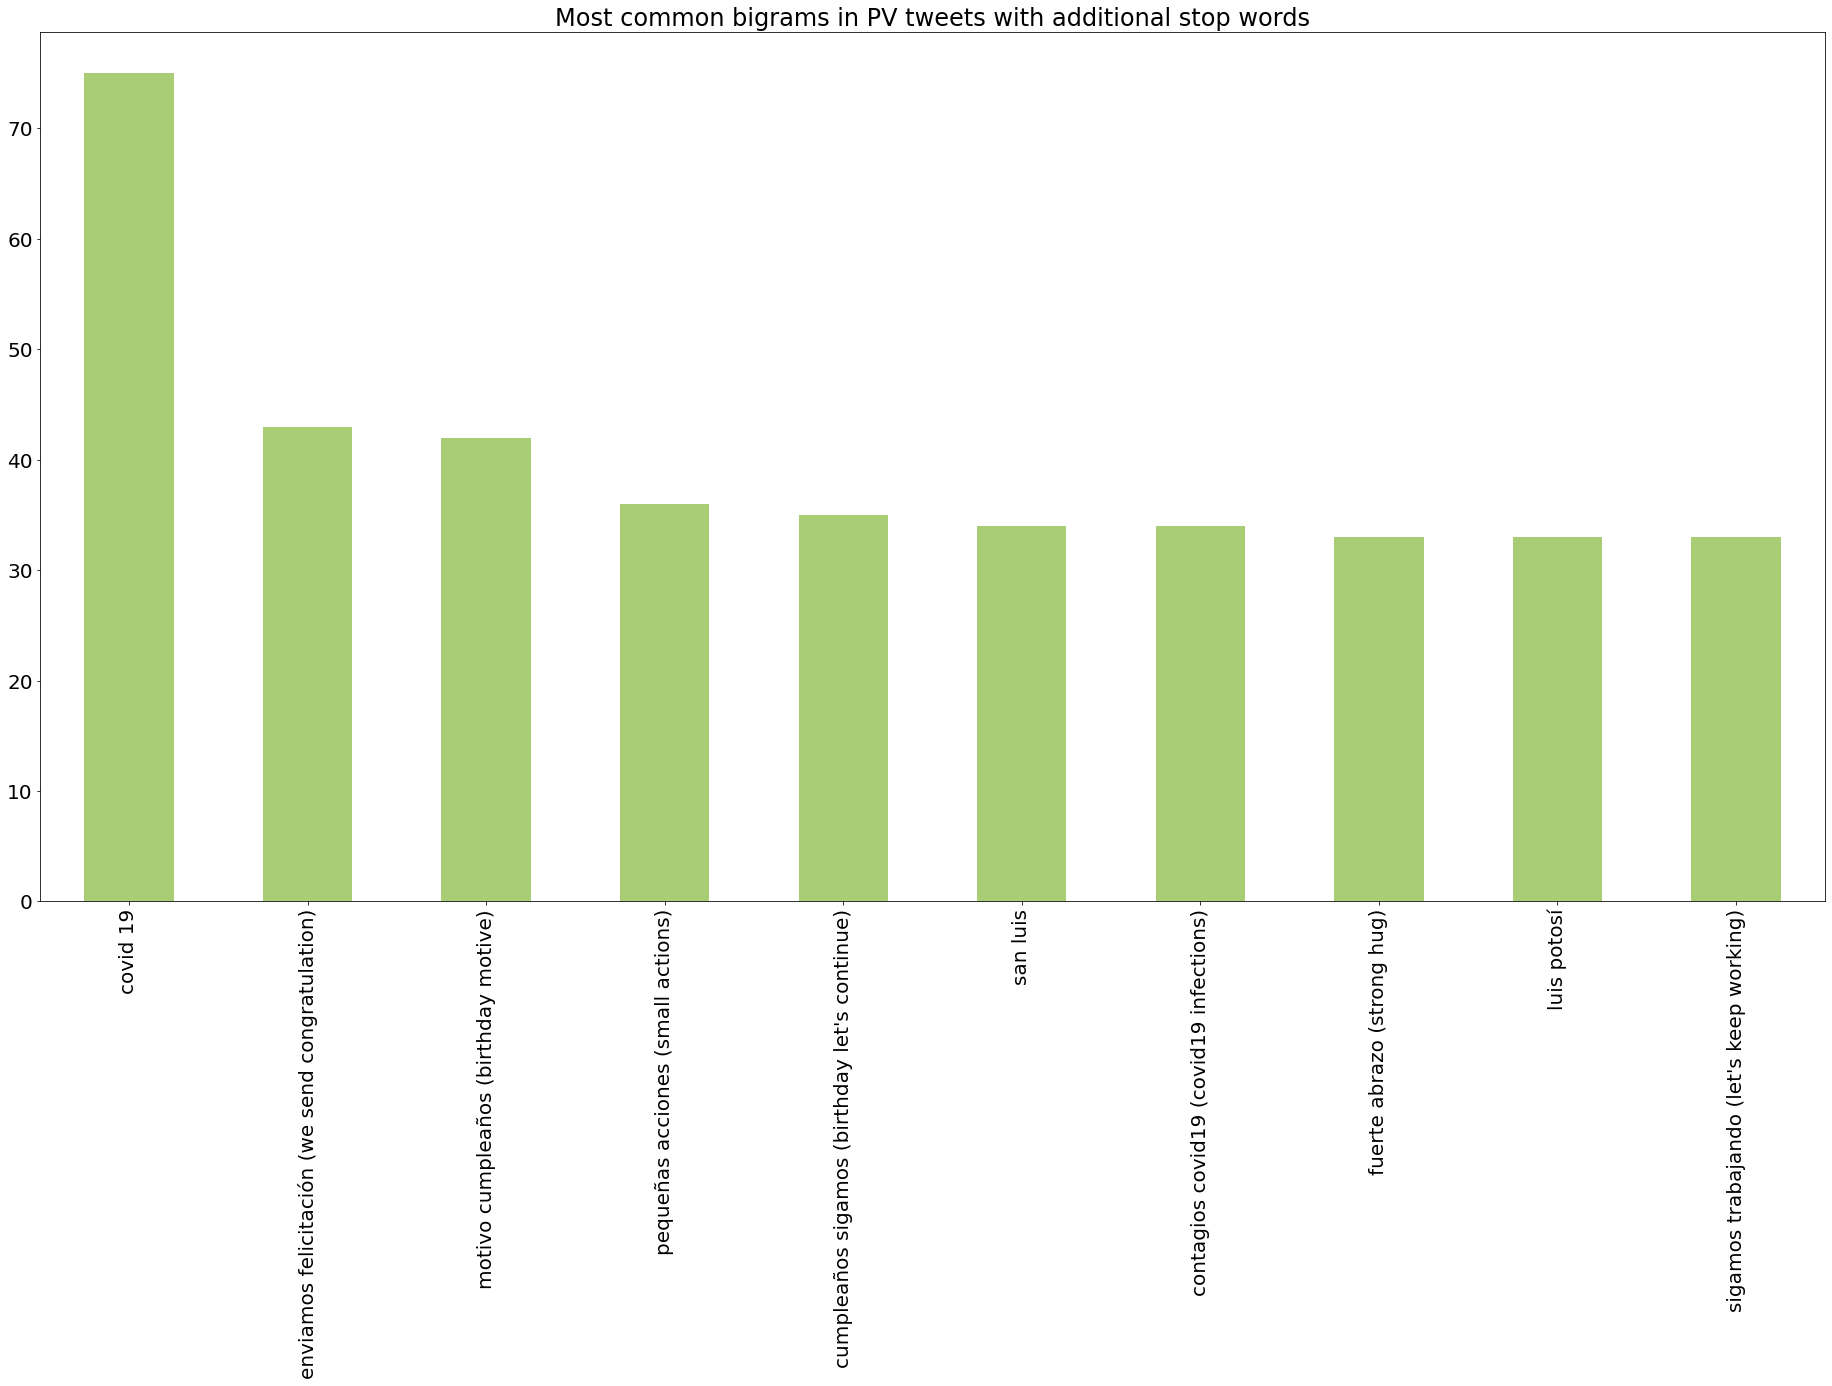

In [157]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in PV tweets with additional stop words")
pv_bigram_plot_sw.plot.bar(color='#A9CD74');

In [158]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common bigrams.

mc_bi_tweets = cvec_bi.fit_transform(mc_df['tweet'])

mc_bi_tweets_df = pd.DataFrame(data=mc_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mc_most_common_bigrams = mc_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_bigrams

plataforma favorita           80
energías limpias              78
niñas niños                   65
escúchanos plataforma         63
favorita spotify              55
gobierno federal              52
reformaeléctrica tóxica       49
trato ambiente                46
andamosbienpuestxs regular    38
comisión permanente           32
dtype: int64

In [159]:
mc_bigram_plot_sw = mc_most_common_bigrams.copy()
mc_bigram_plot_sw.index = [
    'plataforma favorita (favorite platform)',
    'energías limpias (clean energies)',
    'niñas niños (girls boys)',
    'escúchanos plataforma (listen to us platform)',
    'favorita spotify (favorite spotify)',
    'gobierno federal (federal government)',
    'reformaeléctrica tóxica (toxic electricityreform)',
    'trato ambiente (behavior towards environment)',
    'andamosbienpuestxs regular (WeAreWellSet regulate)',
    'comisión permanente (permanent assignment)'
]

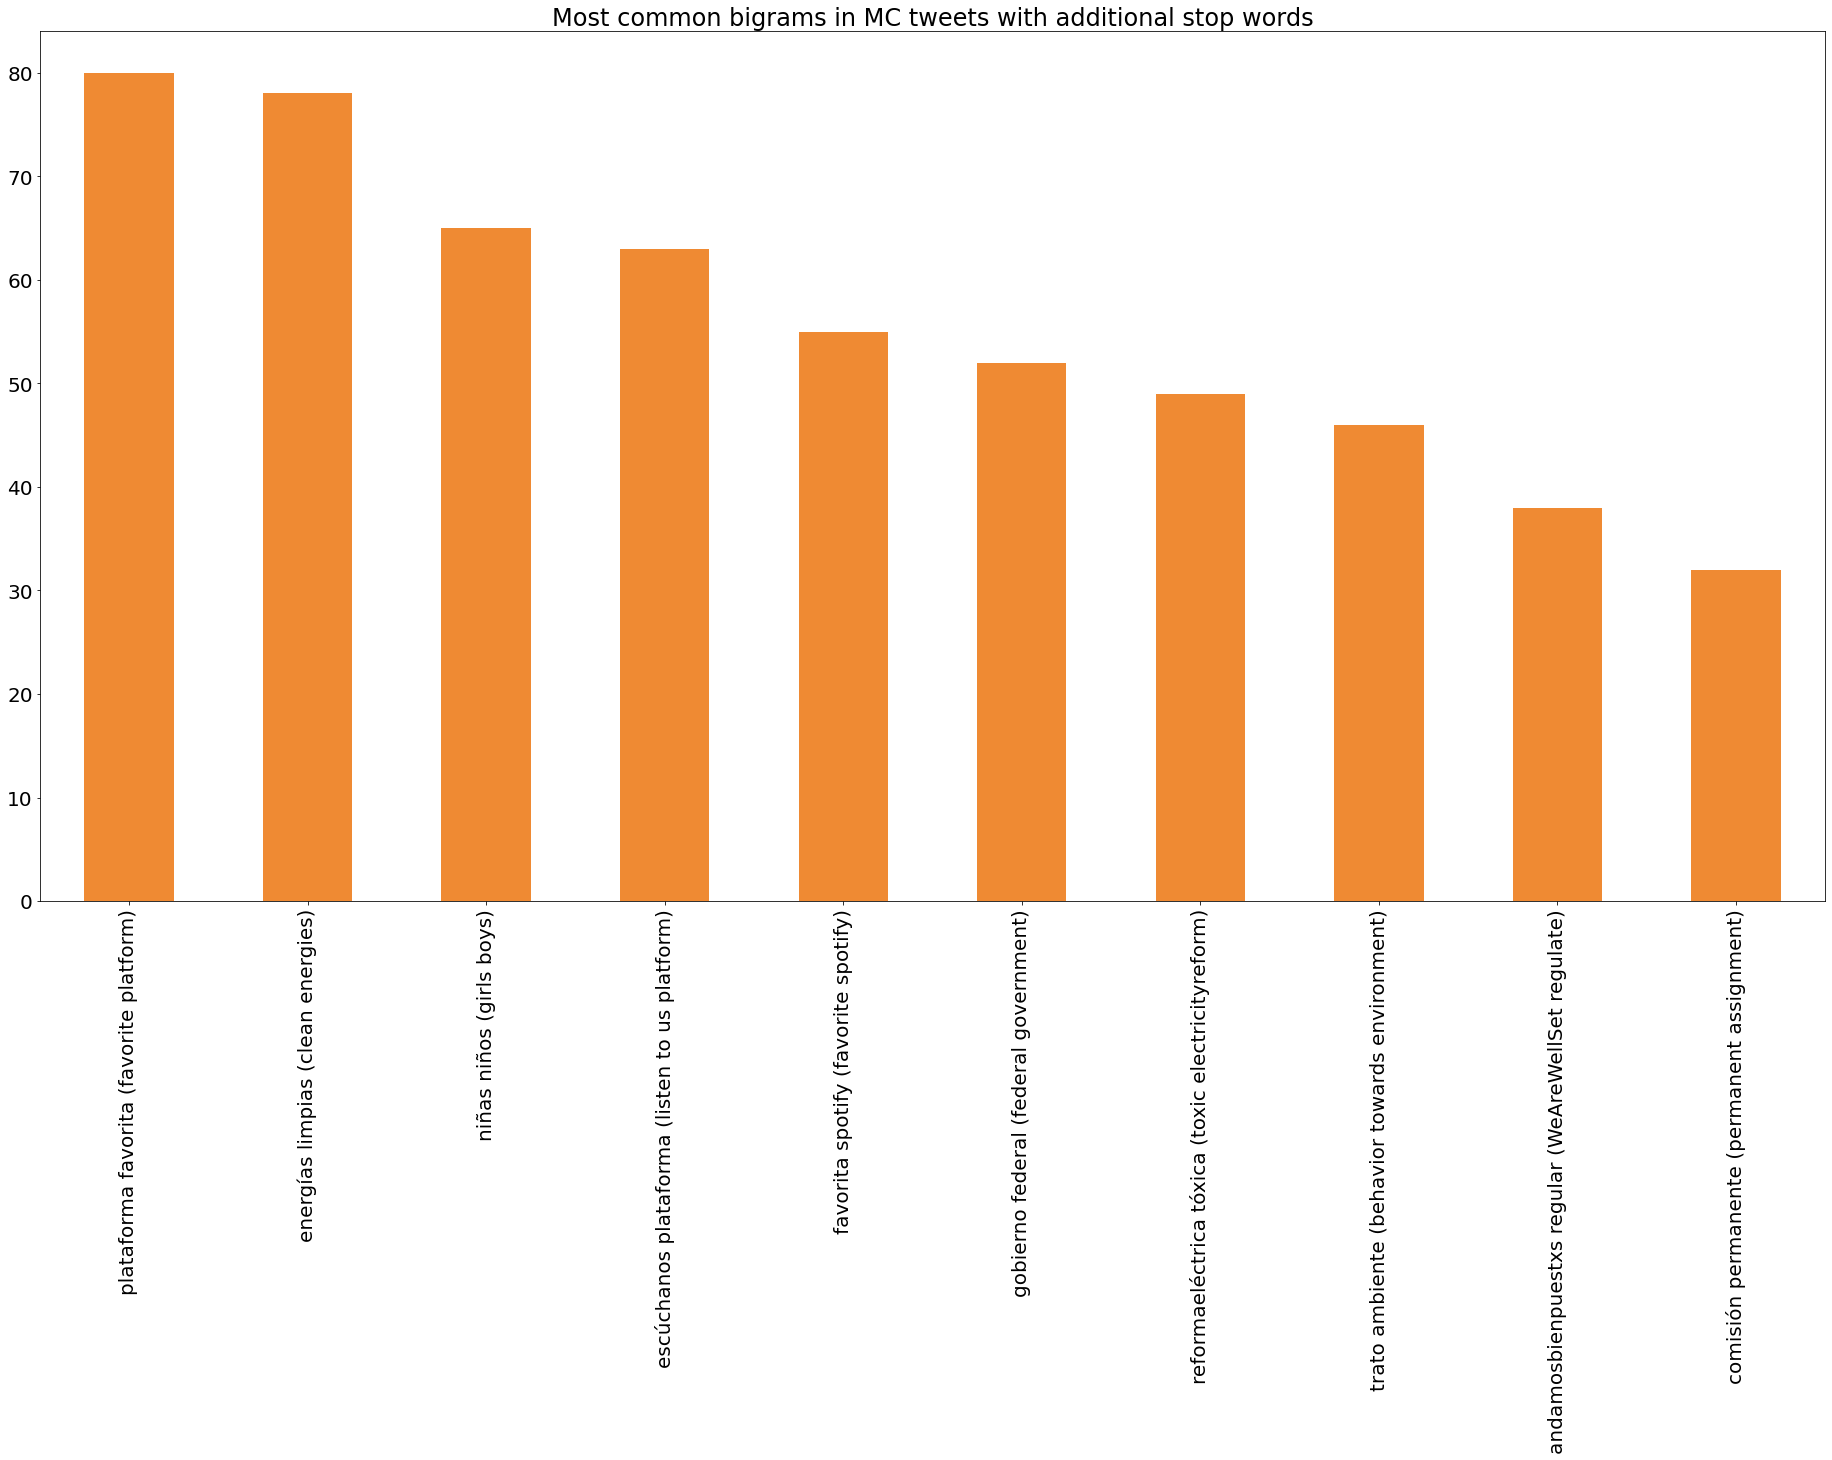

In [160]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in MC tweets with additional stop words")
mc_bigram_plot_sw.plot.bar(color='#EF8A33');

In [161]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common bigrams.

mrn_bi_tweets = cvec_bi.fit_transform(mrn_df['tweet'])

mrn_bi_tweets_df = pd.DataFrame(data=mrn_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mrn_most_common_bigrams = mrn_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_bigrams

pueblo democracia           117
compartimos resumen         116
información pueblo          116
4t información              115
democracia transparencia    114
resumen 4t                  106
pueblo méxico               104
imagen circulaenredes       104
12 21                        83
lópez obrador                79
dtype: int64

In [162]:
mrn_bigram_plot_sw = mrn_most_common_bigrams.copy()
mrn_bigram_plot_sw.index = [
    'pueblo democracia (people democracy)',
    'compartimos resumen (we share summary)',
    'información pueblo (people information)',
    '4t información (4thtransformation information)',
    'democracia transparencia (democracy transparency)',
    'resumen 4t (4thtransformation summary)',
    'pueblo méxico (people mexico)',
    'imagen circulaenredes (image circulating on social media)',
    '12 21',
    'lópez obrador'
]

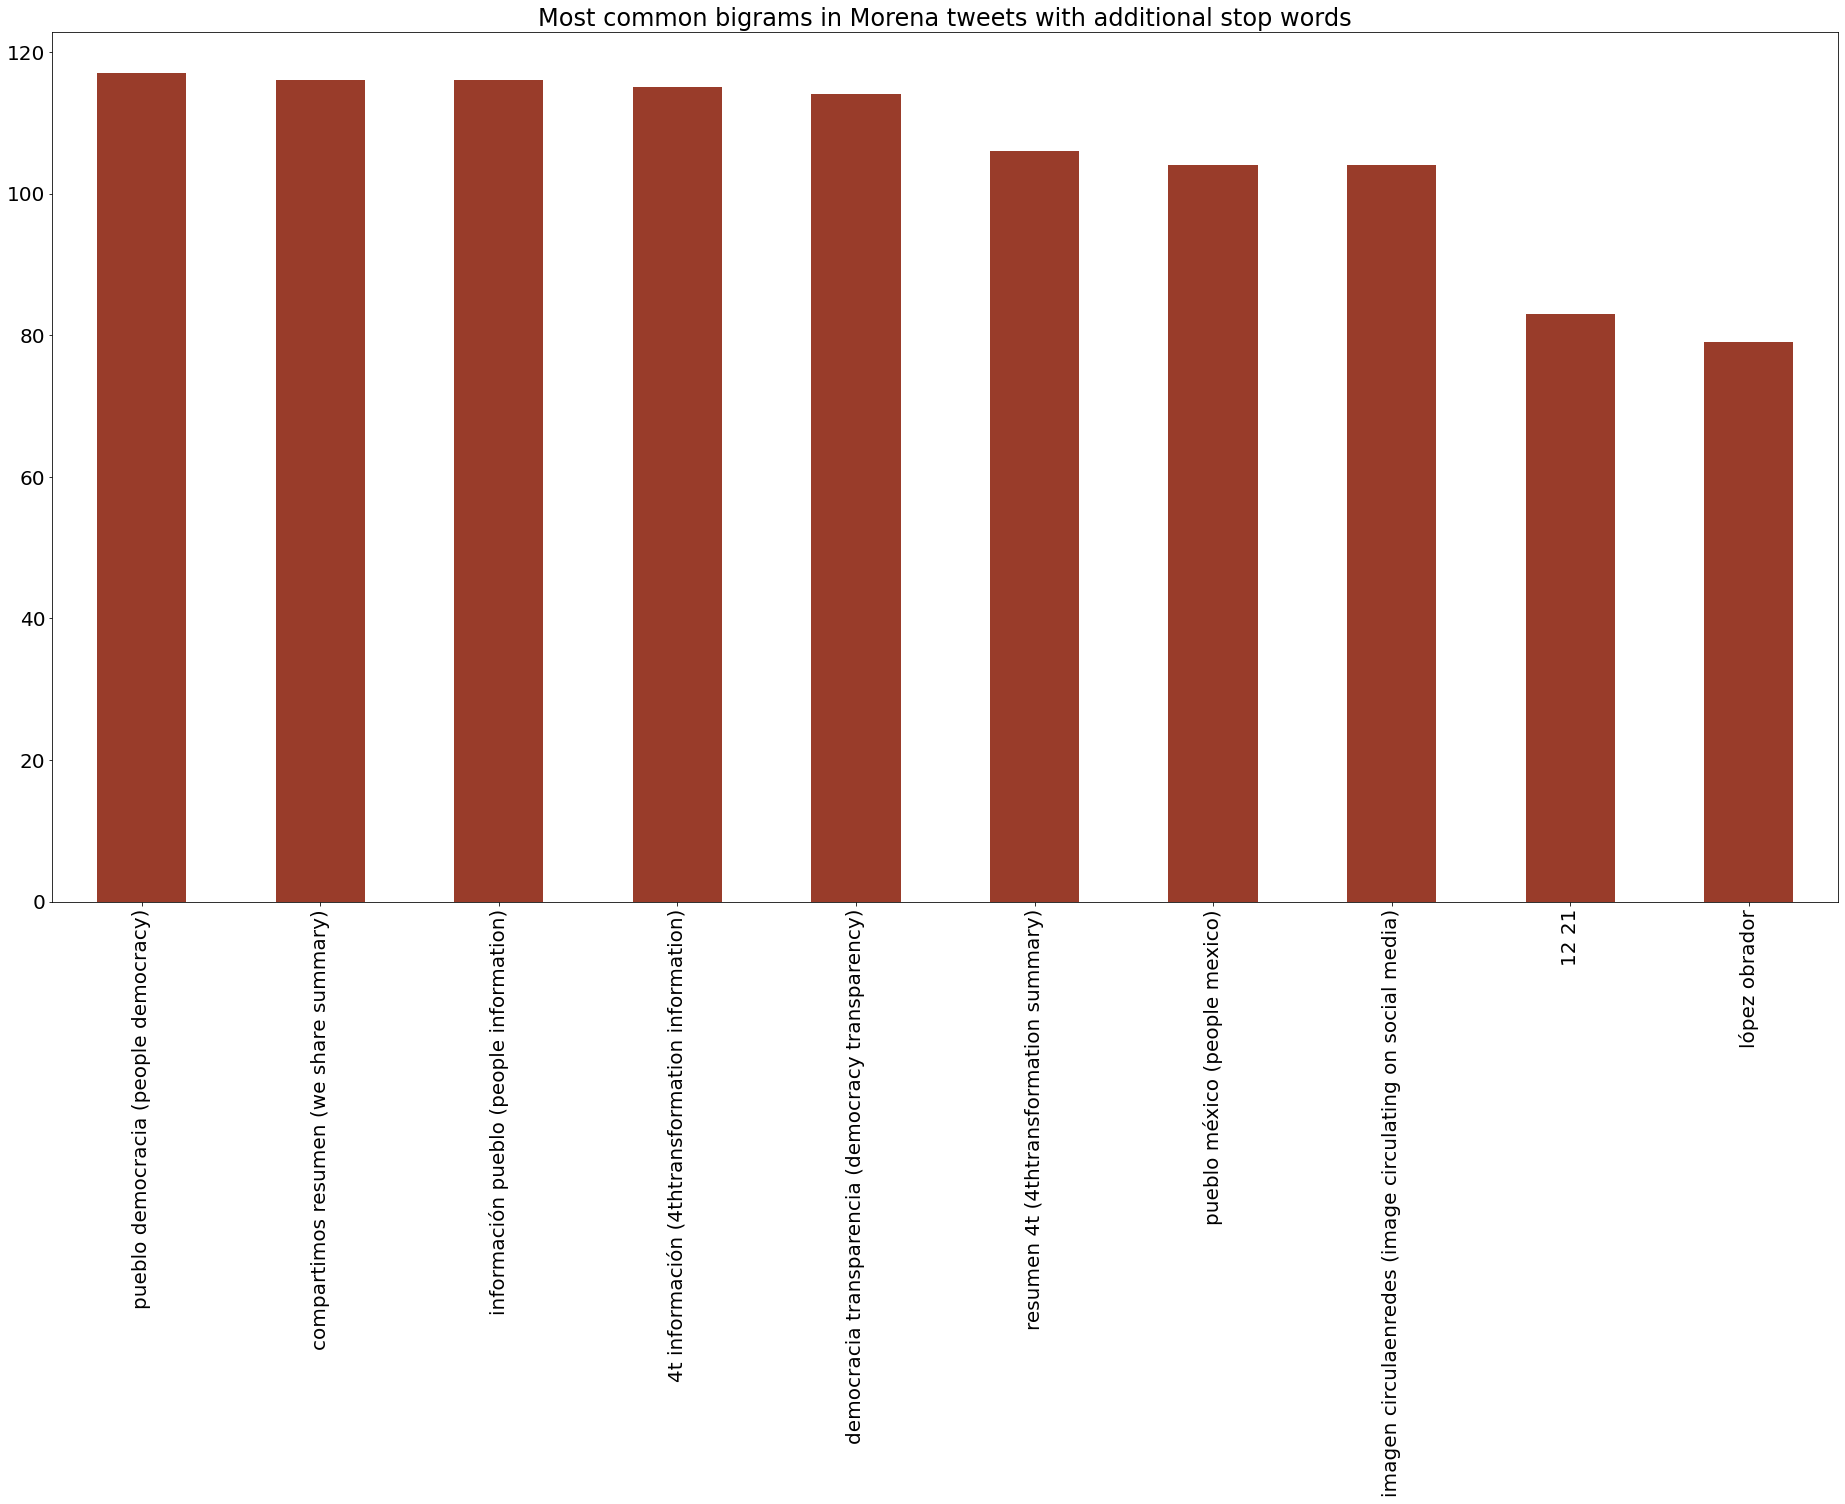

In [163]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common bigrams in Morena tweets with additional stop words")
mrn_bigram_plot_sw.plot.bar(color='#993C2A');

### 10 Most Common Trigrams Without Party and Politican Names

In [164]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into trigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common trigrams.
cvec_tri = CountVectorizer(ngram_range=(3, 3), stop_words=frozenset(spanish_politics), lowercase=True)

pan_tri_tweets = cvec_tri.fit_transform(pan_df['tweet'])

pan_tri_tweets_df = pd.DataFrame(data=pan_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pan_most_common_trigrams = pan_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_trigrams

familiares seres queridos                 33
seres queridos descanse                   25
queridos descanse paz                     25
lamentamos profundamente fallecimiento    25
san luis potosí                           22
energías limpias renovables               22
cambiar rumbo méxico                      18
sentido pésame familiares                 17
pésame familiares seres                   16
cambiar rumbo país                        16
dtype: int64

In [165]:
pan_trigram_plot_sw = pan_most_common_trigrams.copy()
pan_trigram_plot_sw.index = [
    'familiares seres queridos (family members loved ones)',
    'seres queridos descanse  (loved ones rest)',
    'queridos descanse paz (loved ones RIP)',
    'lamentamos profundamente fallecimiento (we deeply regret passing)',
    'san luis potosí',
    'energías limpias renovables (renewable clean energies)',
    'cambiar rumbo méxico (change Mexico course)',
    'sentido pésame familiares (deepest sympathy family members)',
    'pésame familiares seres (sympathy family members beings)', 
    'cambiar rumbo país (change course country)'
]

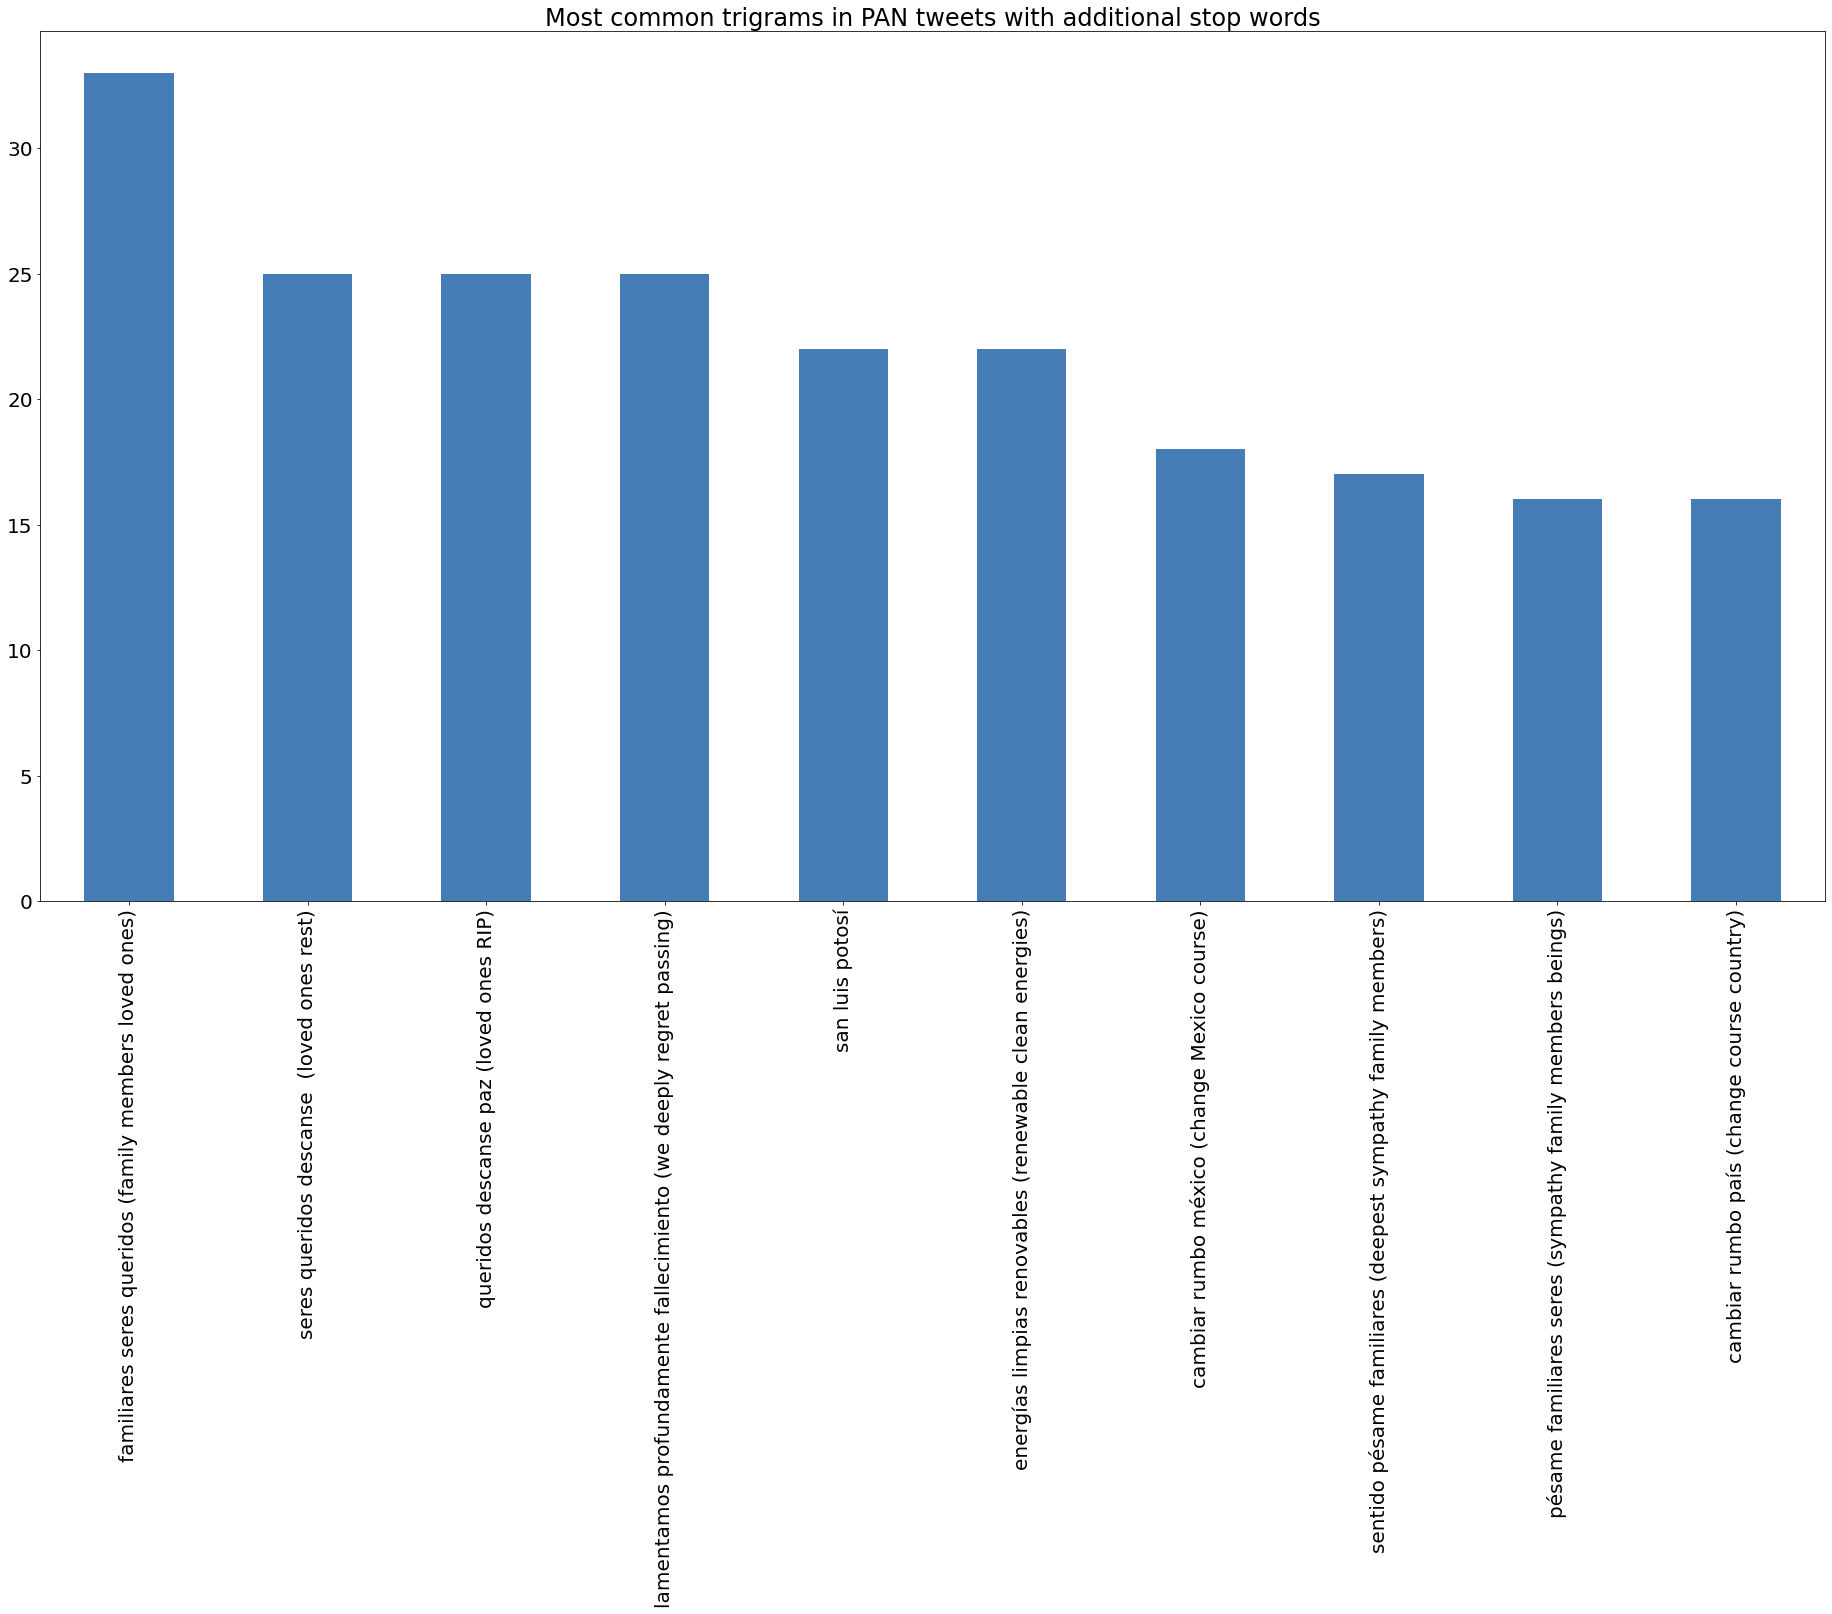

In [166]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PAN tweets with additional stop words")
pan_trigram_plot_sw.plot.bar(color='#467CB6');

In [167]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common trigrams.

pri_tri_tweets = cvec_tri.fit_transform(pri_df['tweet'])

pri_tri_tweets_df = pd.DataFrame(data=pri_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pri_most_common_trigrams = pri_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_trigrams

san luis potosí                     16
recuperar rumbo país                15
candidato presidencia municipal     15
mujeres hombres comprometidos       13
diputados locales electos           13
diputadas diputados locales         13
acceso universal medicamentos       12
universal medicamentos gratuitos    12
diputadas diputados federales       12
ley acceso universal                12
dtype: int64

In [170]:
pri_trigram_plot_sw = pri_most_common_trigrams.copy()
pri_trigram_plot_sw.index = [
    'san luis potosí',
    'recuperar rumbo país (recover country course)',
    'candidato presidencia municipal (municipal presidency candidate)',
    'mujeres hombres comprometidos (women men committed)',
    'diputados locales electos (elected local representatitves)',
    'diputadas diputados locales  (local female & male representatives)',
    'acceso universal medicamentos (universal medications access)',
    'universal medicamentos gratuitos (universal free medications)',
    'diputadas diputados federales (federal female & male representatives)', 
    'ley acceso universal (universal access law)'
]

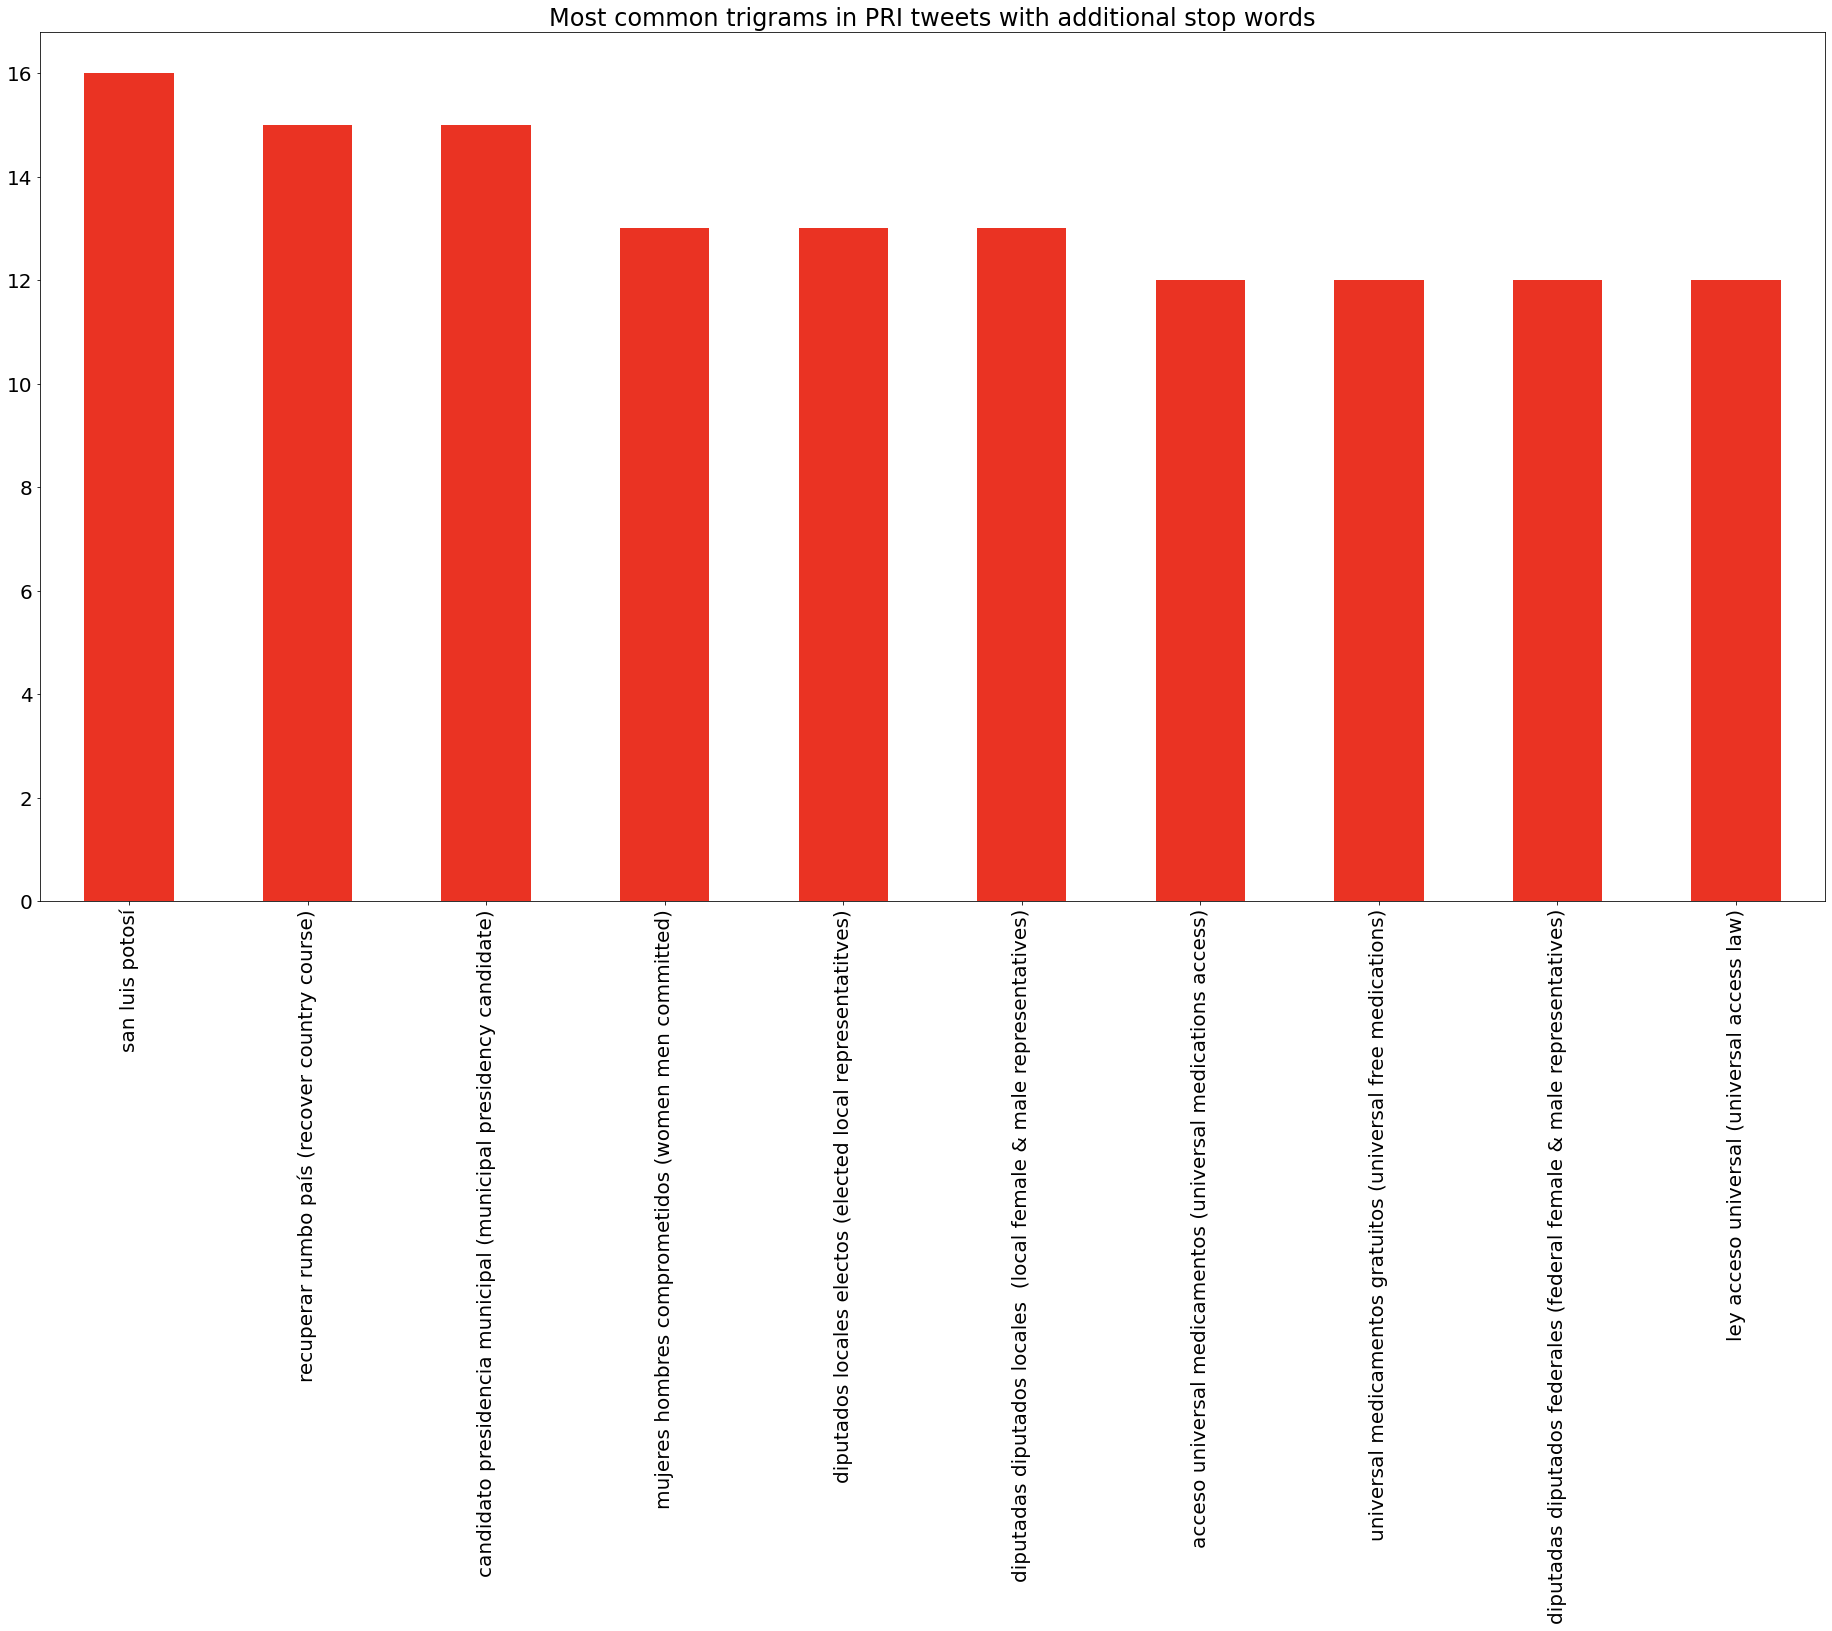

In [171]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PRI tweets with additional stop words")
pri_trigram_plot_sw.plot.bar(color='#EA3323');

In [172]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common trigrams.

prd_tri_tweets = cvec_tri.fit_transform(prd_df['tweet'])

prd_tri_tweets_df = pd.DataFrame(data=prd_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

prd_most_common_trigrams = prd_tri_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_trigrams

dé cara millones                                33
estudiantes niega educación                     33
cara millones estudiantes                       33
gómez dé cara                                   33
millones estudiantes niega                      33
delfina gómez dé                                33
niega educación completo                        20
completo alimentación evitar                    19
alimentación evitar comparezca                  19
evitar comparezca escuelasdetiempocompletosí    19
dtype: int64

In [174]:
prd_trigram_plot_sw = prd_most_common_trigrams.copy()
prd_trigram_plot_sw.index = [
    'dé cara millones (face millions)',
    'estudiantes niega educación (students deny education)',
    'cara millones estudiantes (face millions students)',
    'gómez dé cara (Public Education Minister face)',
    'millones estudiantes niega (millions students deny)',
    'delfina gómez dé (Public Education Minister give)',
    'niega educación completo (deny complete education)',
    'completo alimentación evitar (avoid complete nutrition)', 
    'alimentación evitar comparezca (nutrition avoid appearing)',
    'evitar comparezca escuelasdetiempocompletosí (avoid appear fulltimeschoolsyes)'
]

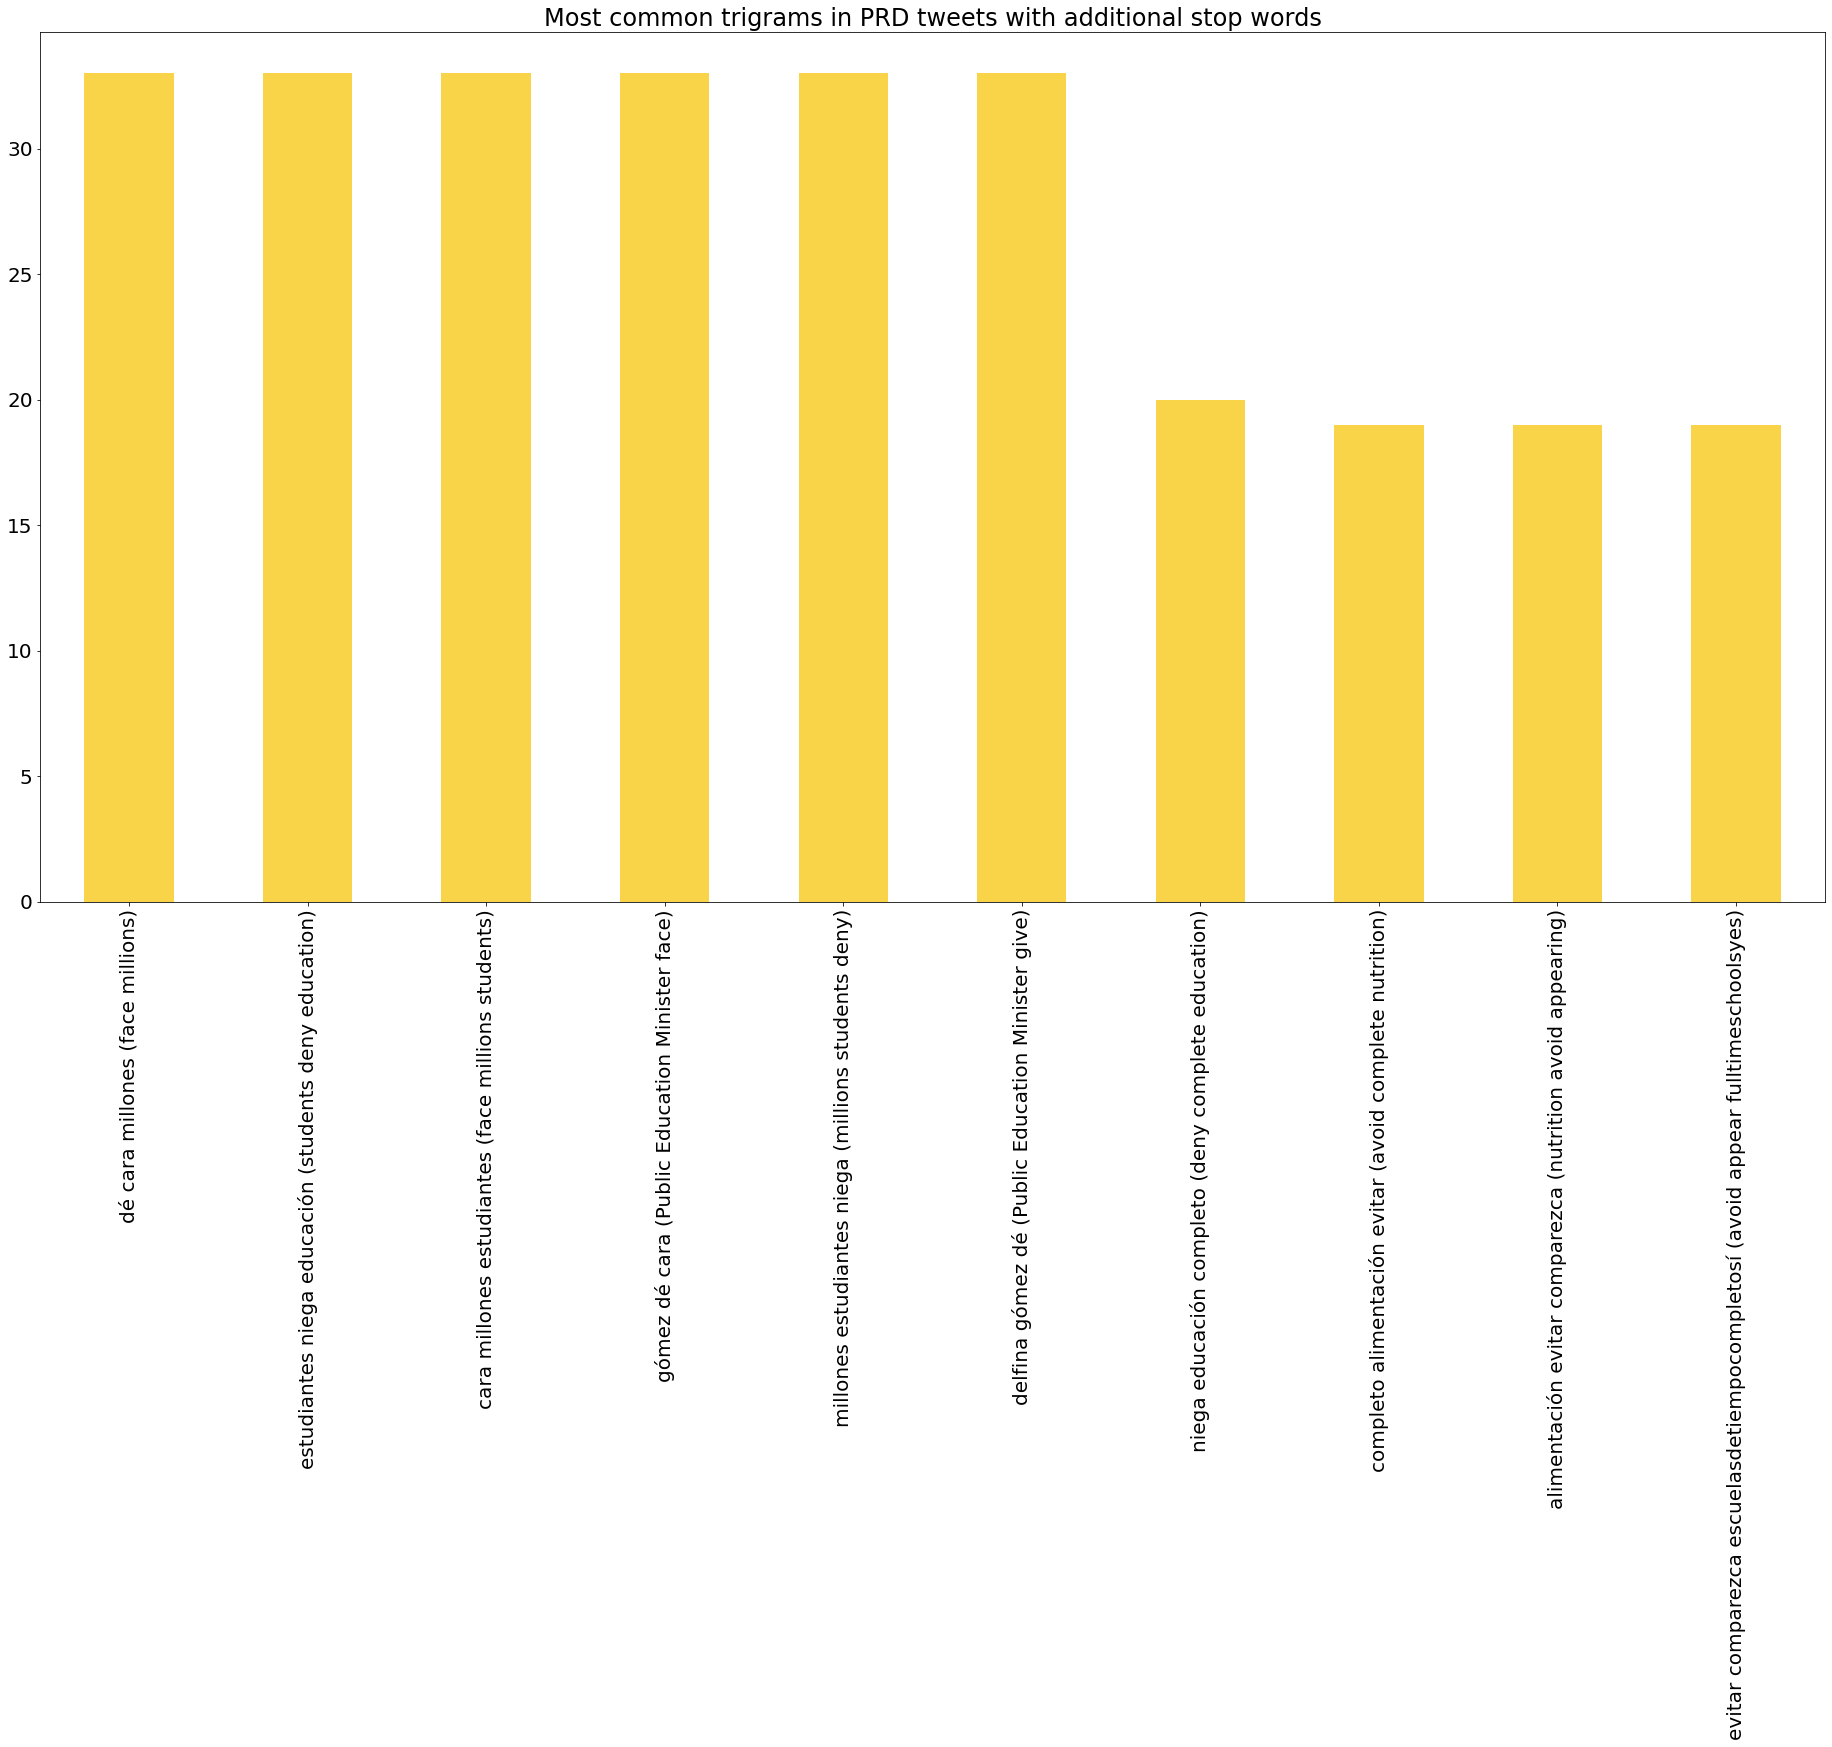

In [175]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PRD tweets with additional stop words")
prd_trigram_plot_sw.plot.bar(color='#F9D448');

In [176]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common trigrams.

pv_tri_tweets = cvec_tri.fit_transform(pv_df['tweet'])

pv_tri_tweets_df = pd.DataFrame(data=pv_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pv_most_common_trigrams = pv_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_trigrams

motivo cumpleaños sigamos             35
san luis potosí                       33
cumpleaños sigamos trabajando         32
felicitación fuerte abrazo            32
enviamos felicitación fuerte          32
sigamos trabajando méxicoverde        29
trabajando méxicoverde enhorabuena    27
abrazo amigo compañero                21
fuerte abrazo amigo                   21
3delverde cámara diputados            18
dtype: int64

In [177]:
pv_trigram_plot_sw = pv_most_common_trigrams.copy()
pv_trigram_plot_sw.index = [
    'motivo cumpleaños sigamos (birthday reasons let\'s continue)',
    'san luis potosí',
    'cumpleaños sigamos trabajando (birthday let\'s keep working)',
    'felicitación fuerte abrazo (congratulation big hug)',
    'enviamos felicitación fuerte (we send big congratulation)',
    'sigamos trabajando méxicoverde (let\'s keep working greenmexico)',
    'trabajando méxicoverde enhorabuena (working greenmexico congratulations)',
    'abrazo amigo compañero (hug friend companion)',
    'fuerte abrazo amigo (big hug friend)', 
    '3delverde cámara diputados (3ofgreen representatives chamber)'
]

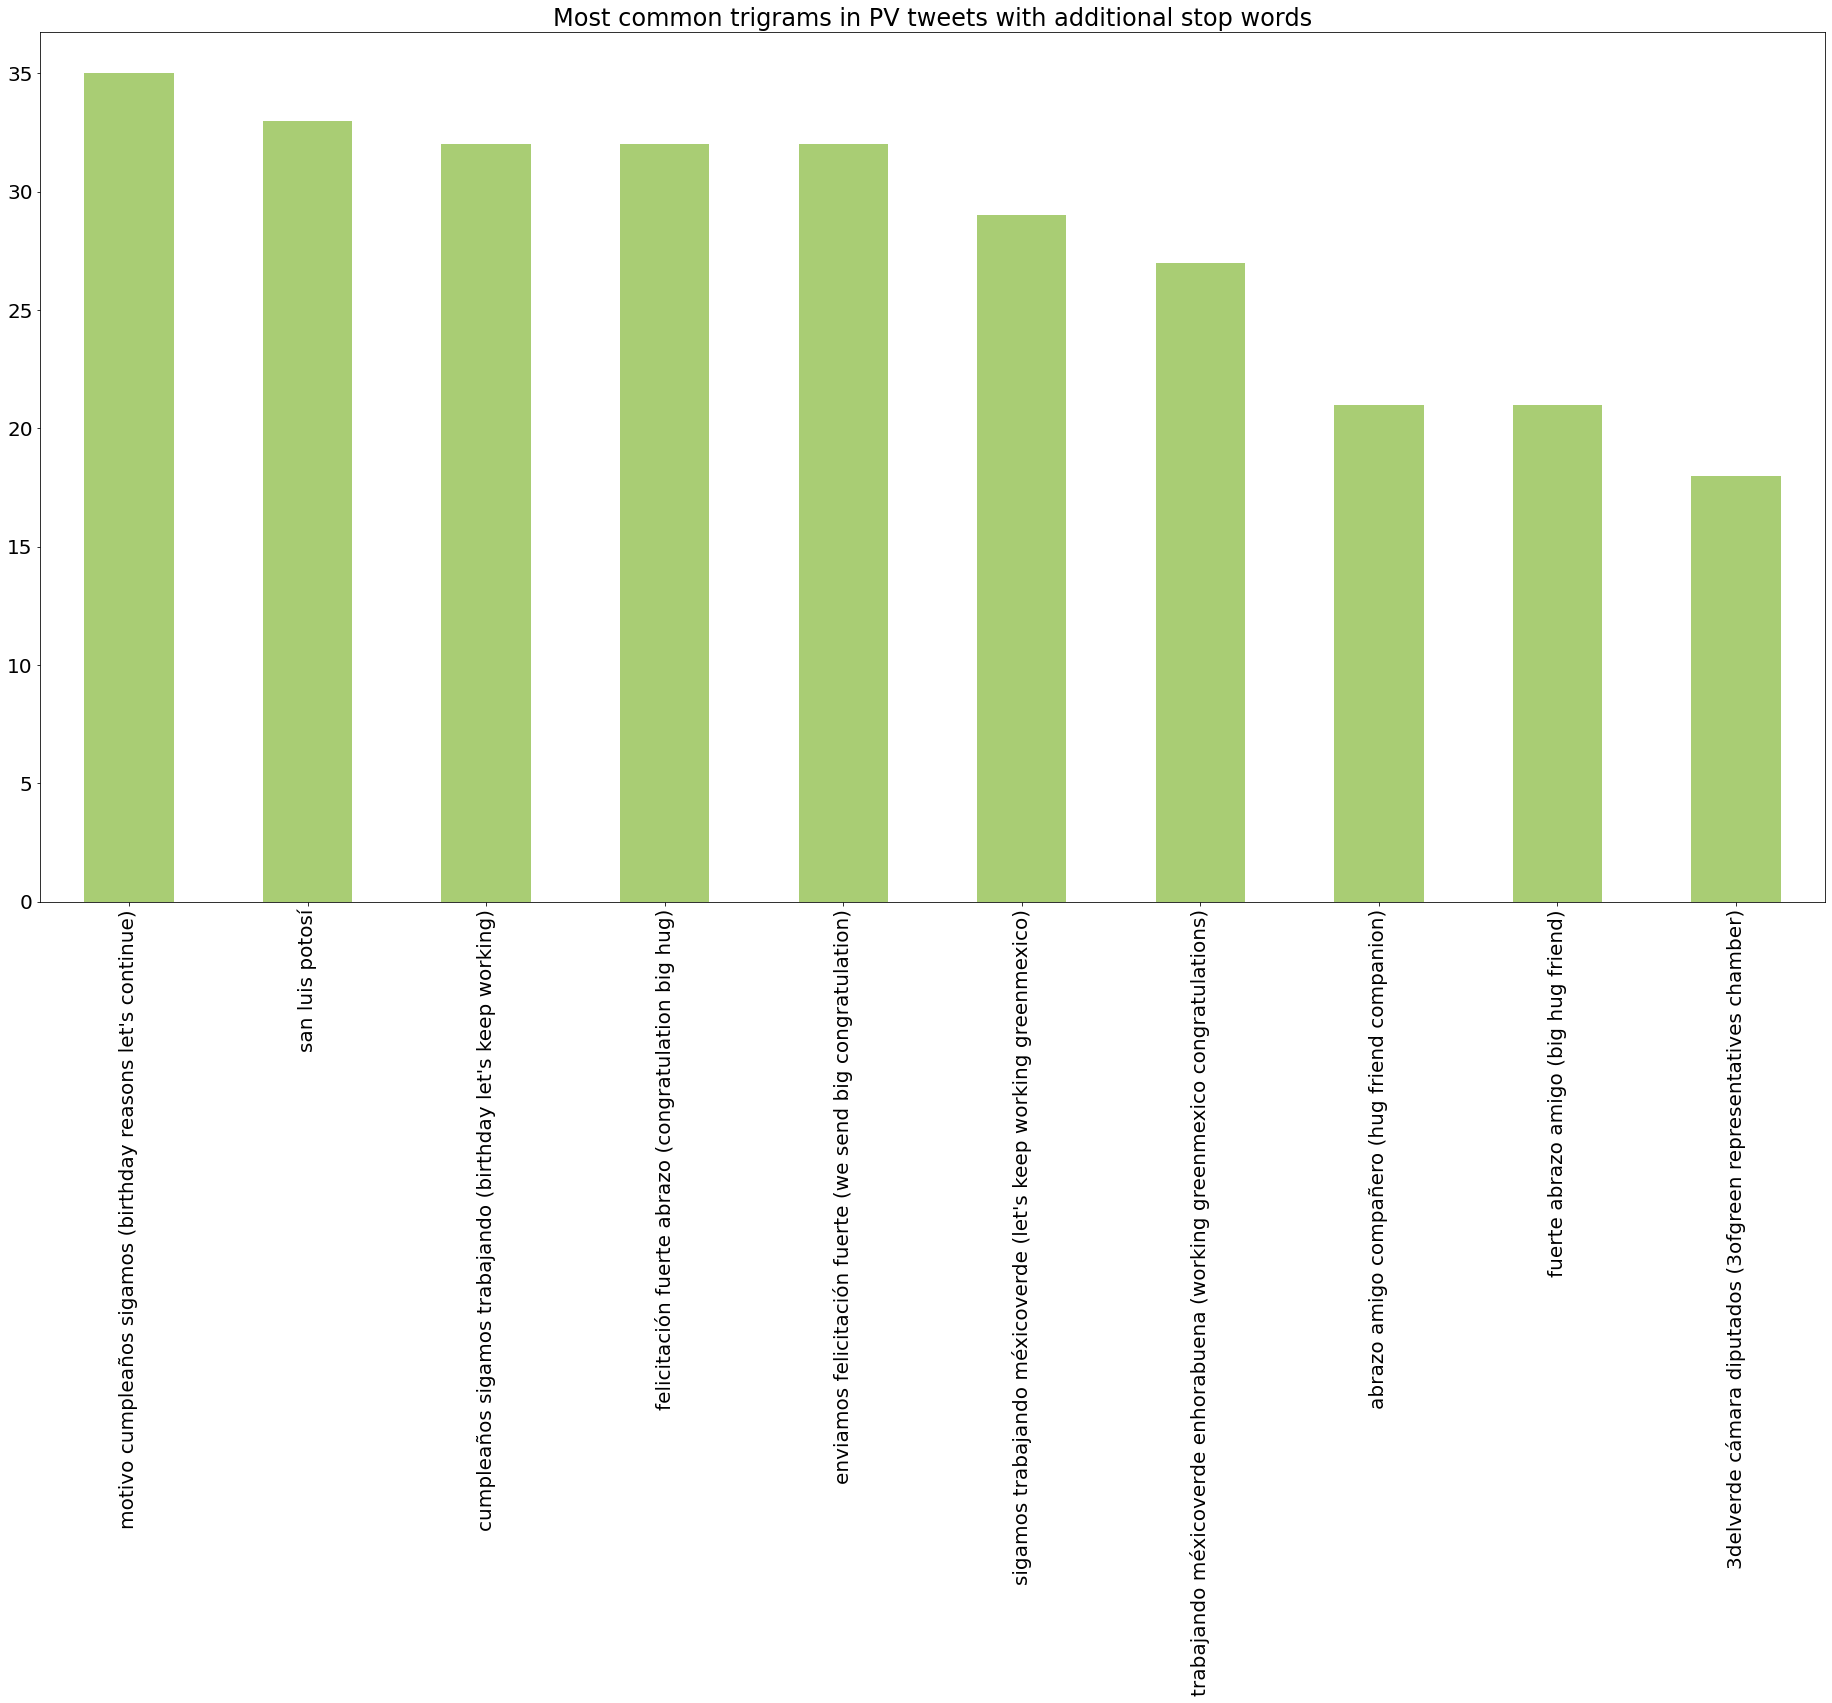

In [178]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in PV tweets with additional stop words")
pv_trigram_plot_sw.plot.bar(color='#A9CD74');

In [179]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common trigrams.

mc_tri_tweets = cvec_tri.fit_transform(mc_df['tweet'])

mc_tri_tweets_df = pd.DataFrame(data=mc_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mc_most_common_trigrams = mc_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_trigrams

escúchanos plataforma favorita       63
plataforma favorita spotify          55
energías limpias baratas             26
na na na                             22
darle trato ambiente                 17
centro causas frente                 17
personas centro causas               16
foro evoluciónmexicana nuevotrato    15
luis rodríguez zapatero              14
transitar energías limpias           14
dtype: int64

In [180]:
mc_trigram_plot_sw = mc_most_common_trigrams.copy()
mc_trigram_plot_sw.index = [
    'escúchanos plataforma favorita (listen to us favorite platform)',
    'plataforma favorita spotify (spotify favorite platform)',
    'energías limpias baratas (cheap clean energies)',
    'na na na',
    'darle trato ambiente (give behavior towards green)',
    'centro causas frente (center causes front)',
    'personas centro causas (persons center causes',
    'foro evoluciónmexicana nuevotrato (mexicanevolution forum newbehaviortowards)', 
    'luis rodríguez zapatero (Former President of Spain)',    
    'transitar energías limpias (circulate clean energies)'
]

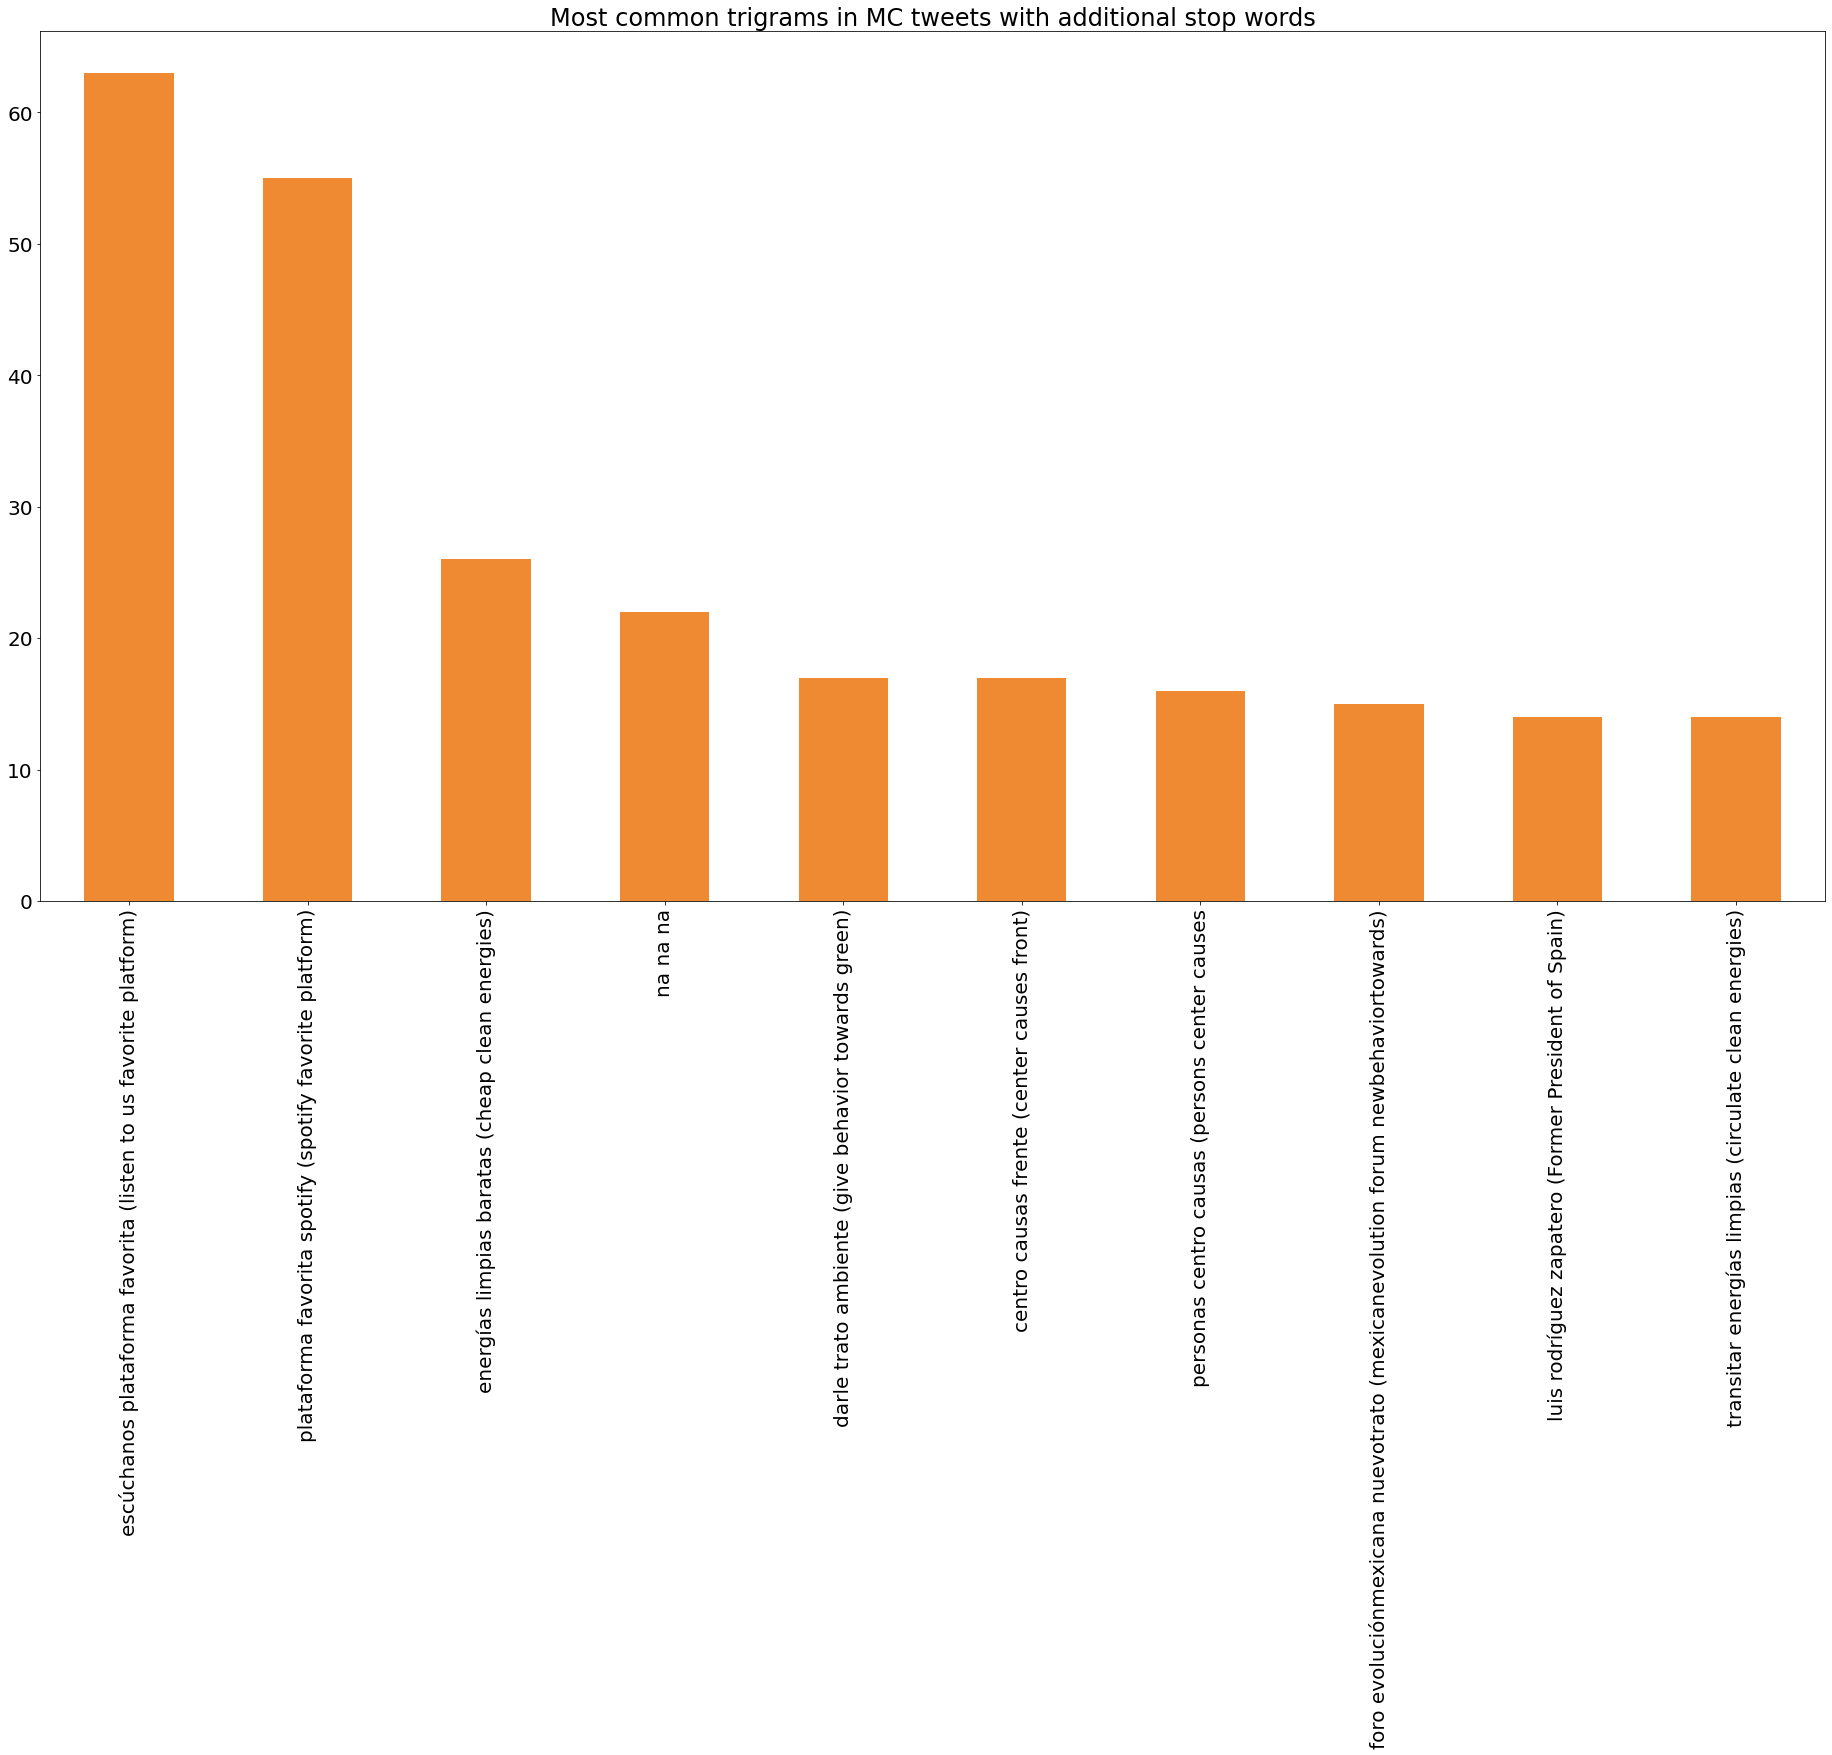

In [181]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in MC tweets with additional stop words")
mc_trigram_plot_sw.plot.bar(color='#EF8A33');

In [182]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common trigrams.

mrn_tri_tweets = cvec_tri.fit_transform(mrn_df['tweet'])

mrn_tri_tweets_df = pd.DataFrame(data=mrn_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mrn_most_common_trigrams = mrn_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_trigrams

4t información pueblo                        115
información pueblo democracia                113
pueblo democracia transparencia              113
compartimos resumen 4t                       106
resumen 4t información                       106
amor amor paga                                34
conferencia prensa matutina                   24
soberanía energética lareformaeléctricava     22
01 12 21                                      21
comparte difunde voz                          20
dtype: int64

In [183]:
mrn_trigram_plot_sw = mrn_most_common_trigrams.copy()
mrn_trigram_plot_sw.index = [
    '4t información pueblo (4thtransformation information people)',
    'información pueblo democracia (information people democracy)',
    'pueblo democracia transparencia (people democracy transparency)',
    'compartimos resumen 4t (we share summary 4thtransformation)',
    'resumen 4t información (summary 4thtransformation information)',
    'amor amor paga (love love pay)', 
    'conferencia prensa matutina (morning press conference)', 
    'soberanía energética lareformaeléctricava (energy sovereignty theelectricityreformisgoing)', 
    '01 12 21', 
    'comparte difunde voz (share spread voice)'
]

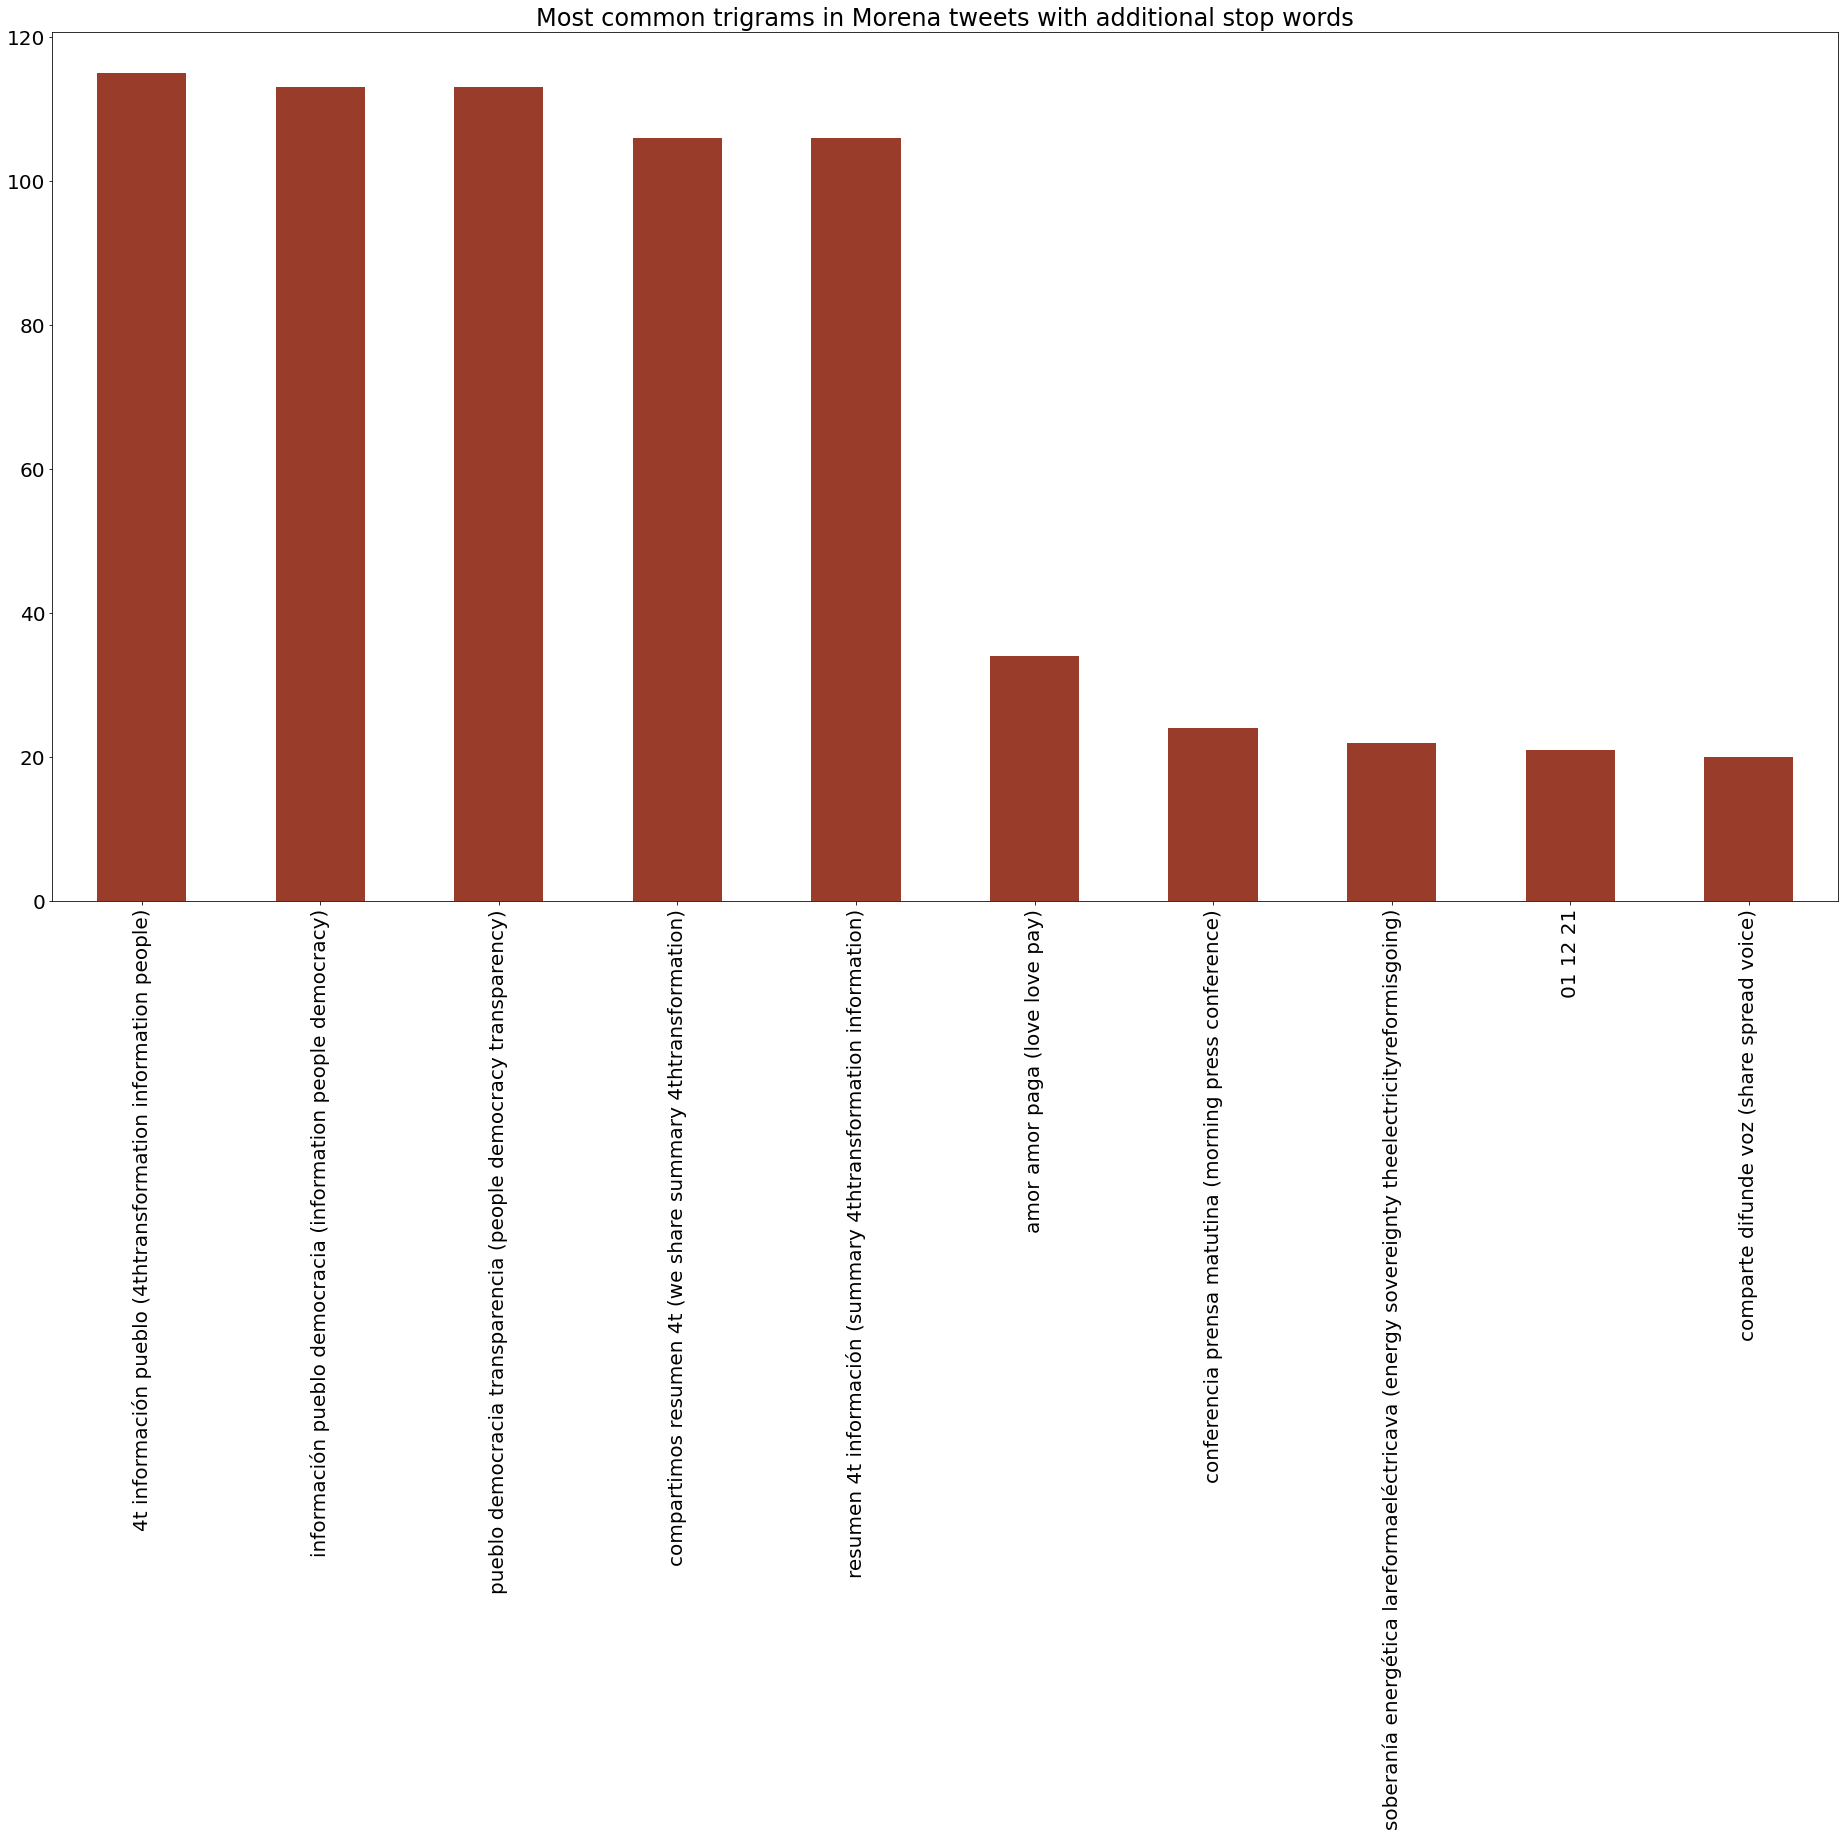

In [186]:
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
plt.title("Most common trigrams in Morena tweets with additional stop words")
mrn_trigram_plot_sw.plot.bar(color='#993C2A');